In [ ]:
import pandas as pd

In [ ]:
import sklearn
import imblearn
print("scikit-learn version:", sklearn.__version__)
print("imblearn version:", imblearn.__version__)

scikit-learn version: 1.5.2
imblearn version: 0.12.4


### Loading dataset

In [ ]:
# Load the uploaded dataset
file_path = 'tuberculosis-data-06-16.csv'
data = pd.read_csv(file_path)

# Display basic information and preview of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103846 entries, 0 to 103845
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          103846 non-null  int64  
 1   racaCor             89811 non-null   object 
 2   faixaEtaria         103846 non-null  object 
 3   sexo                103846 non-null  object 
 4   gestante            34483 non-null   object 
 5   ESCOLARID           83686 non-null   object 
 6   TIPOCUP             91755 non-null   object 
 7   codTratAnt          100217 non-null  float64
 8   tratouha            103846 non-null  float64
 9   sitAtual            103846 non-null  object 
 10  tipoCaso            103846 non-null  object 
 11  FORMACLIN1          103838 non-null  object 
 12  FORMACLIN2          3802 non-null    object 
 13  FORMACLIN3          231 non-null     object 
 14  classif             103845 non-null  object 
 15  descoberta          102239 non-nul

(None,
    Unnamed: 0 racaCor faixaEtaria sexo gestante      ESCOLARID       TIPOCUP  \
 0           2   Pardo       20_29    M      NaN  De 1 a 3 anos         Outra   
 1           4   Pardo       30_39    M      NaN  De 4 a 7 anos         Outra   
 2           7     NaN       20_29    M      NaN  De 4 a 7 anos         Outra   
 3          15     NaN       30_39    F      NaN            NaN  Dona de Casa   
 4          45  Branco       40_49    M      NaN  De 4 a 7 anos         Outra   
 
    codTratAnt  tratouha  sitAtual  ... esqAtual motMudEsquema  \
 0         1.0       0.0  Abandono  ...      NaN           NaN   
 1         1.0       0.0      Cura  ...      NaN           NaN   
 2         NaN       0.0  Abandono  ...      NaN           NaN   
 3         1.0       0.0      Cura  ...      NaN           NaN   
 4         1.0       0.0      Cura  ...      NaN           NaN   
 
             tipoTrat nDosesPri nDosesSeg idade HISTOPATOL OUTRAIMUNO  \
 0  Auto-Administrado       0.0   

The key terms in the dataset from Portuguese to English:

- **`racaCor`**: Race/Color
- **`faixaEtaria`**: Age Group
- **`sexo`**: Gender
- **`gestante`**: Pregnant
- **`ESCOLARID`**: Education Level
- **`TIPOCUP`**: Occupation Type
- **`codTratAnt`**: Previous Treatment Code
- **`tratouha`**: Treated Previously (binary indicator)
- **`sitAtual`**: Current Status
- **`tipoCaso`**: Case Type
- **`FORMACLIN1`, `FORMACLIN2`, `FORMACLIN3`**: Clinical Form 1, 2, 3
- **`classif`**: Classification
- **`descoberta`**: Discovery Method
- **`bac`**: Bacilloscopy
- **`BACOUTRO`**: Other Bacilloscopy Result
- **`cultEsc`**: Culture Examination
- **`CULTOUTRO`**: Other Culture Examination Result
- **`RX`**: X-ray
- **`RXOUTRO`**: Other X-ray Result
- **`NECROP`**: Necropsy
- **`hiv`**: HIV Status
- **`testesensibilidade`**: Sensitivity Test
- **`aids`**: AIDS
- **`DIABETES`**: Diabetes
- **`ALCOOLISMO`**: Alcoholism
- **`MENTAL`**: Mental Health Condition
- **`DROGADICAO`**: Drug Addiction
- **`TABAGISMO`**: Smoking Habit
- **`TOTCOMUNIC`**: Total Communications
- **`COMUNICEXA`**: Exposed Communication
- **`COMUNICDOE`**: Communicated Disease
- **`instTrat`**: Treatment Institution
- **`esqIni`**: Initial Treatment Scheme
- **`mdEsquema`**: Current Scheme
- **`esqAtual`**: Current Treatment Scheme
- **`motMudEsquema`**: Reason for Treatment Change
- **`tipoTrat`**: Treatment Type
- **`nDosesPri`**: Number of Primary Doses
- **`nDosesSeg`**: Number of Secondary Doses
- **`idade`**: Age
- **`HISTOPATOL`**: Histopathological Examination
- **`OUTRAIMUNO`**: Other Immunological Test
- **`resistencia`**: Resistance
- **`mtvInter1`**: Reason for Intervention 1

In [ ]:
# Calculate the number of missing values for each column in the dataset
missing_values = data.isnull().sum()

# Display the columns with their respective missing value counts
missing_values_sorted = missing_values.sort_values(ascending=False)
missing_values_sorted

FORMACLIN3            103615
motMudEsquema         102723
esqAtual              102444
FORMACLIN2            100044
testesensibilidade     90892
resistencia            90539
mtvInter1              79928
gestante               69363
NECROP                 31340
RXOUTRO                22935
CULTOUTRO              20961
BACOUTRO               20390
ESCOLARID              20160
HISTOPATOL             19814
racaCor                14035
TIPOCUP                12091
cultEsc                 8125
tipoTrat                6921
RX                      5036
instTrat                4289
codTratAnt              3629
hiv                     1696
descoberta              1607
bac                      947
esqIni                    66
FORMACLIN1                 8
classif                    1
DIABETES                   0
tipoCaso                   0
faixaEtaria                0
OUTRAIMUNO                 0
sexo                       0
idade                      0
nDosesSeg                  0
nDosesPri                  0
tratouha                   0
sitAtual                   0
mdEsquema                  0
ALCOOLISMO                 0
aids                       0
COMUNICDOE                 0
COMUNICEXA                 0
TOTCOMUNIC                 0
TABAGISMO                  0
DROGADICAO                 0
MENTAL                     0
Unnamed: 0                 0
dtype: int64

In [ ]:
# Number of missing values in the 'sitAtual' column
missing_sitAtual = missing_values['sitAtual']

missing_sitAtual, missing_values_sorted[missing_values_sorted > 0]

(0,
 FORMACLIN3            103615
 motMudEsquema         102723
 esqAtual              102444
 FORMACLIN2            100044
 testesensibilidade     90892
 resistencia            90539
 mtvInter1              79928
 gestante               69363
 NECROP                 31340
 RXOUTRO                22935
 CULTOUTRO              20961
 BACOUTRO               20390
 ESCOLARID              20160
 HISTOPATOL             19814
 racaCor                14035
 TIPOCUP                12091
 cultEsc                 8125
 tipoTrat                6921
 RX                      5036
 instTrat                4289
 codTratAnt              3629
 hiv                     1696
 descoberta              1607
 bac                      947
 esqIni                    66
 FORMACLIN1                 8
 classif                    1
 dtype: int64)

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Sort and display the percentage of missing values for each column
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_sorted

FORMACLIN3            99.777555
motMudEsquema         98.918591
esqAtual              98.649924
FORMACLIN2            96.338809
testesensibilidade    87.525759
resistencia           87.185833
mtvInter1             76.967818
gestante              66.794099
NECROP                30.179304
RXOUTRO               22.085588
CULTOUTRO             20.184697
BACOUTRO              19.634844
ESCOLARID             19.413362
HISTOPATOL            19.080176
racaCor               13.515205
TIPOCUP               11.643202
cultEsc                7.824086
tipoTrat               6.664677
RX                     4.849489
instTrat               4.130154
codTratAnt             3.494598
hiv                    1.633188
descoberta             1.547484
bac                    0.911927
esqIni                 0.063556
FORMACLIN1             0.007704
classif                0.000963
DIABETES               0.000000
tipoCaso               0.000000
faixaEtaria            0.000000
OUTRAIMUNO             0.000000
sexo                   0.000000
idade                  0.000000
nDosesSeg              0.000000
nDosesPri              0.000000
tratouha               0.000000
sitAtual               0.000000
mdEsquema              0.000000
ALCOOLISMO             0.000000
aids                   0.000000
COMUNICDOE             0.000000
COMUNICEXA             0.000000
TOTCOMUNIC             0.000000
TABAGISMO              0.000000
DROGADICAO             0.000000
MENTAL                 0.000000
Unnamed: 0             0.000000
dtype: float64

In [ ]:
data = data.drop(columns=['Unnamed: 0'])
data

racaCor faixaEtaria sexo gestante        ESCOLARID       TIPOCUP  \
0        Pardo       20_29    M      NaN    De 1 a 3 anos         Outra   
1        Pardo       30_39    M      NaN    De 4 a 7 anos         Outra   
2          NaN       20_29    M      NaN    De 4 a 7 anos         Outra   
3          NaN       30_39    F      NaN              NaN  Dona de Casa   
4       Branco       40_49    M      NaN    De 4 a 7 anos         Outra   
...        ...         ...  ...      ...              ...           ...   
103841   Preto       20_29    F        N    De 4 a 7 anos  Desempregado   
103842  Branco       30_39    M      NaN    De 1 a 3 anos         Outra   
103843   Preto       30_39    F        N   De 8 a 11 anos         Outra   
103844   Pardo       60_69    F        N  De 12 a 14 anos    Aposentado   
103845   Pardo       30_39    F        N    De 4 a 7 anos  Dona de Casa   

        codTratAnt  tratouha  sitAtual    tipoCaso  ... esqAtual  \
0              1.0       0.0  Abandono        Novo  ...      NaN   
1              1.0       0.0      Cura        Novo  ...      NaN   
2              NaN       0.0  Abandono  Retr Aband  ...      NaN   
3              1.0       0.0      Cura        Novo  ...      NaN   
4              1.0       0.0      Cura        Novo  ...      NaN   
...            ...       ...       ...         ...  ...      ...   
103841         1.0       0.0      Cura        Novo  ...      NaN   
103842         1.0       0.0      Cura        Novo  ...      NaN   
103843         1.0       0.0  Abandono        Novo  ...      NaN   
103844         1.0       0.0      Cura        Novo  ...      NaN   
103845         1.0       0.0  Abandono        Novo  ...      NaN   

       motMudEsquema           tipoTrat nDosesPri nDosesSeg idade HISTOPATOL  \
0                NaN  Auto-Administrado       0.0       0.0  26.0   N/realiz   
1                NaN     Supervisionado       0.0       0.0  38.0   N/realiz   
2                NaN     Supervisionado       0.0       0.0  24.0   N/realiz   
3                NaN  Auto-Administrado       0.0       0.0  35.0   N/realiz   
4                NaN                NaN       0.0       0.0  41.0   N/realiz   
...              ...                ...       ...       ...   ...        ...   
103841           NaN     Supervisionado      32.0      61.0  28.0   N/realiz   
103842           NaN     Supervisionado      60.0      54.0  36.0   N/realiz   
103843           NaN     Supervisionado      31.0       0.0  31.0        NaN   
103844           NaN     Supervisionado      40.0      82.0  66.0   N/realiz   
103845           NaN     Supervisionado      24.0      18.0  33.0        NaN   

       OUTRAIMUNO resistencia                         mtvInter1  
0               N         NaN            Elucidacao Diagnostica  
1               N         NaN  Insuficiencia Respiratoria Aguda  
2               N        SENS                               NaN  
3               N        SENS                          Abscesso  
4               N         NaN            Elucidacao Diagnostica  
...           ...         ...                               ...  
103841          N         NaN                               NaN  
103842          N         NaN                               NaN  
103843          N         NaN                               NaN  
103844          S         NaN                               NaN  
103845          N        SENS                               NaN  

[103846 rows x 46 columns]

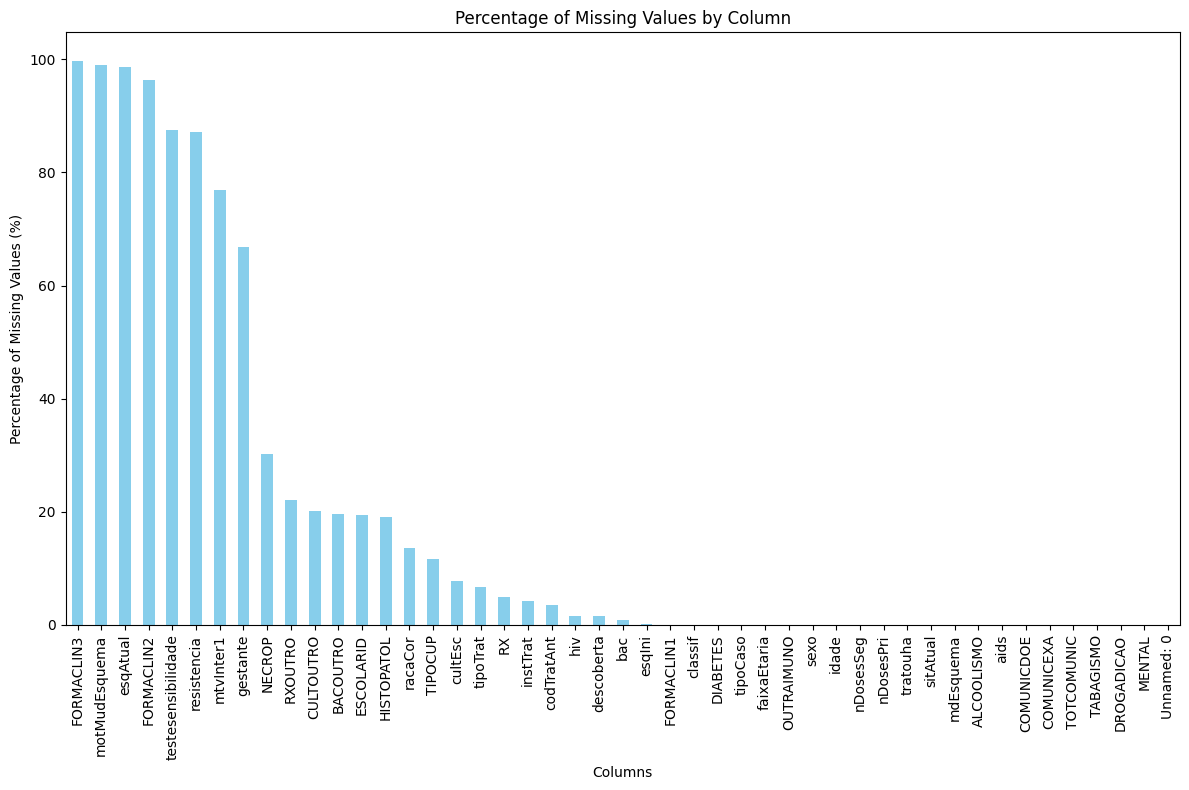

In [ ]:
import matplotlib.pyplot as plt

# Plot the percentage of missing values
plt.figure(figsize=(12, 8))
missing_percentage_sorted.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Identify numerical columns in the dataset
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Display numerical columns
numerical_columns, data[numerical_columns].head()


(Index(['codTratAnt', 'tratouha', 'TOTCOMUNIC', 'COMUNICEXA', 'COMUNICDOE',
        'nDosesPri', 'nDosesSeg', 'idade'],
       dtype='object'),
    codTratAnt  tratouha  TOTCOMUNIC  COMUNICEXA  COMUNICDOE  nDosesPri  \
 0         1.0       0.0         0.0         0.0         0.0        0.0   
 1         1.0       0.0         0.0         0.0         0.0        0.0   
 2         NaN       0.0        20.0         0.0         0.0        0.0   
 3         1.0       0.0         0.0         0.0         0.0        0.0   
 4         1.0       0.0         3.0         3.0         1.0        0.0   
 
    nDosesSeg  idade  
 0        0.0   26.0  
 1        0.0   38.0  
 2        0.0   24.0  
 3        0.0   35.0  
 4        0.0   41.0  )

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Sort and display the percentage of missing values for each column
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_sorted

FORMACLIN3            99.777555
motMudEsquema         98.918591
esqAtual              98.649924
FORMACLIN2            96.338809
testesensibilidade    87.525759
resistencia           87.185833
mtvInter1             76.967818
gestante              66.794099
NECROP                30.179304
RXOUTRO               22.085588
CULTOUTRO             20.184697
BACOUTRO              19.634844
ESCOLARID             19.413362
HISTOPATOL            19.080176
racaCor               13.515205
TIPOCUP               11.643202
cultEsc                7.824086
tipoTrat               6.664677
RX                     4.849489
instTrat               4.130154
codTratAnt             3.494598
hiv                    1.633188
descoberta             1.547484
bac                    0.911927
esqIni                 0.063556
FORMACLIN1             0.007704
classif                0.000963
DIABETES               0.000000
tipoCaso               0.000000
faixaEtaria            0.000000
OUTRAIMUNO             0.000000
sexo                   0.000000
idade                  0.000000
nDosesSeg              0.000000
nDosesPri              0.000000
tratouha               0.000000
sitAtual               0.000000
mdEsquema              0.000000
ALCOOLISMO             0.000000
aids                   0.000000
COMUNICDOE             0.000000
COMUNICEXA             0.000000
TOTCOMUNIC             0.000000
TABAGISMO              0.000000
DROGADICAO             0.000000
MENTAL                 0.000000
Unnamed: 0             0.000000
dtype: float64

In [ ]:
# Rename the columns to English for clarity
data_english = data.rename(columns={
    'racaCor': 'race_color',
    'faixaEtaria': 'age_group',
    'sexo': 'gender',
    'gestante': 'pregnant',
    'ESCOLARID': 'education_level',
    'TIPOCUP': 'occupation_type',
    'codTratAnt': 'previous_treatment_code',
    'tratouha': 'treated_previously',
    'sitAtual': 'current_status',
    'tipoCaso': 'case_type',
    'FORMACLIN1': 'clinical_form1',
    'FORMACLIN2': 'clinical_form2',
    'FORMACLIN3': 'clinical_form3',
    'classif': 'classification',
    'descoberta': 'discovery_method',
    'bac': 'bacilloscopy',
    'BACOUTRO': 'other_bacilloscopy',
    'cultEsc': 'culture_exam',
    'CULTOUTRO': 'other_culture_exam',
    'RX': 'x_ray',
    'RXOUTRO': 'other_x_ray',
    'NECROP': 'necropsy',
    'hiv': 'hiv_status',
    'testesensibilidade': 'sensitivity_test',
    'aids': 'aids',
    'DIABETES': 'diabetes',
    'ALCOOLISMO': 'alcoholism',
    'MENTAL': 'mental_condition',
    'DROGADICAO': 'drug_addiction',
    'TABAGISMO': 'smoking_habit',
    'TOTCOMUNIC': 'total_communications',
    'COMUNICEXA': 'exposed_communication',
    'COMUNICDOE': 'communicated_disease',
    'instTrat': 'treatment_institution',
    'esqIni': 'initial_treatment_scheme',
    'mdEsquema': 'current_scheme',
    'esqAtual': 'current_treatment_scheme',
    'motMudEsquema': 'reason_for_treatment_change',
    'tipoTrat': 'treatment_type',
    'nDosesPri': 'number_primary_doses',
    'nDosesSeg': 'number_secondary_doses',
    'idade': 'age',
    'HISTOPATOL': 'histopathological_exam',
    'OUTRAIMUNO': 'other_immunological_test',
    'resistencia': 'resistance',
    'mtvInter1': 'reason_for_intervention1'
})

# Display the first few rows of the renamed dataset
data_english.head()

race_color age_group gender pregnant education_level occupation_type  \
0      Pardo     20_29      M      NaN   De 1 a 3 anos           Outra   
1      Pardo     30_39      M      NaN   De 4 a 7 anos           Outra   
2        NaN     20_29      M      NaN   De 4 a 7 anos           Outra   
3        NaN     30_39      F      NaN             NaN    Dona de Casa   
4     Branco     40_49      M      NaN   De 4 a 7 anos           Outra   

   previous_treatment_code  treated_previously current_status   case_type  \
0                      1.0                 0.0       Abandono        Novo   
1                      1.0                 0.0           Cura        Novo   
2                      NaN                 0.0       Abandono  Retr Aband   
3                      1.0                 0.0           Cura        Novo   
4                      1.0                 0.0           Cura        Novo   

   ... current_treatment_scheme reason_for_treatment_change  \
0  ...                      NaN                         NaN   
1  ...                      NaN                         NaN   
2  ...                      NaN                         NaN   
3  ...                      NaN                         NaN   
4  ...                      NaN                         NaN   

      treatment_type number_primary_doses number_secondary_doses   age  \
0  Auto-Administrado                  0.0                    0.0  26.0   
1     Supervisionado                  0.0                    0.0  38.0   
2     Supervisionado                  0.0                    0.0  24.0   
3  Auto-Administrado                  0.0                    0.0  35.0   
4                NaN                  0.0                    0.0  41.0   

  histopathological_exam other_immunological_test resistance  \
0               N/realiz                        N        NaN   
1               N/realiz                        N        NaN   
2               N/realiz                        N       SENS   
3               N/realiz                        N       SENS   
4               N/realiz                        N        NaN   

           reason_for_intervention1  
0            Elucidacao Diagnostica  
1  Insuficiencia Respiratoria Aguda  
2                               NaN  
3                          Abscesso  
4            Elucidacao Diagnostica  

[5 rows x 46 columns]

In [ ]:
missing_values = data_english.isnull().sum()

# Display the columns with their respective missing value counts
missing_values_sorted = missing_values.sort_values(ascending=False)
missing_values_sorted

clinical_form3                 103615
reason_for_treatment_change    102723
current_treatment_scheme       102444
clinical_form2                 100044
sensitivity_test                90892
resistance                      90539
reason_for_intervention1        79928
pregnant                        69363
necropsy                        31340
other_x_ray                     22935
other_culture_exam              20961
other_bacilloscopy              20390
education_level                 20160
histopathological_exam          19814
race_color                      14035
occupation_type                 12091
culture_exam                     8125
treatment_type                   6921
x_ray                            5036
treatment_institution            4289
previous_treatment_code          3629
hiv_status                       1696
discovery_method                 1607
bacilloscopy                      947
initial_treatment_scheme           66
clinical_form1                      8
classification                      1
other_immunological_test            0
age                                 0
number_secondary_doses              0
number_primary_doses                0
gender                              0
current_scheme                      0
treated_previously                  0
communicated_disease                0
exposed_communication               0
total_communications                0
smoking_habit                       0
drug_addiction                      0
mental_condition                    0
current_status                      0
diabetes                            0
aids                                0
age_group                           0
case_type                           0
alcoholism                          0
dtype: int64

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Sort and display the percentage of missing values for each column
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
missing_percentage_sorted

clinical_form3                 99.777555
reason_for_treatment_change    98.918591
current_treatment_scheme       98.649924
clinical_form2                 96.338809
sensitivity_test               87.525759
resistance                     87.185833
reason_for_intervention1       76.967818
pregnant                       66.794099
necropsy                       30.179304
other_x_ray                    22.085588
other_culture_exam             20.184697
other_bacilloscopy             19.634844
education_level                19.413362
histopathological_exam         19.080176
race_color                     13.515205
occupation_type                11.643202
culture_exam                    7.824086
treatment_type                  6.664677
x_ray                           4.849489
treatment_institution           4.130154
previous_treatment_code         3.494598
hiv_status                      1.633188
discovery_method                1.547484
bacilloscopy                    0.911927
initial_treatment_scheme        0.063556
clinical_form1                  0.007704
classification                  0.000963
other_immunological_test        0.000000
age                             0.000000
number_secondary_doses          0.000000
number_primary_doses            0.000000
gender                          0.000000
current_scheme                  0.000000
treated_previously              0.000000
communicated_disease            0.000000
exposed_communication           0.000000
total_communications            0.000000
smoking_habit                   0.000000
drug_addiction                  0.000000
mental_condition                0.000000
current_status                  0.000000
diabetes                        0.000000
aids                            0.000000
age_group                       0.000000
case_type                       0.000000
alcoholism                      0.000000
dtype: float64

In [ ]:
# Convert all values to strings and sort, excluding NaN values
unique_resistance_values = data_english['resistance'].dropna().astype(str).unique()
sorted_resistance_values = sorted(unique_resistance_values)

sorted_resistance_values

['AND', 'SENS', 'TB MR', 'TB R']

In [ ]:
# Calculate the mode value for the 'resistance' column
mode_resistance = data_english['resistance'].mode().iloc[0]

mode_resistance

'SENS'

In [ ]:
# Calculate the frequency of unique values in the 'resistance' column
resistance_frequency = data_english['resistance'].value_counts()

resistance_frequency

resistance
SENS     10955
AND       1383
TB R       789
TB MR      180
Name: count, dtype: int64

The frequency of unique values in the `resistance` column is as follows:

- **SENS**: 10,955 cases – Indicates TB strains that are sensitive to first-line drugs, suggesting a good response to standard treatment.
- **AND**: 1,383 cases – May represent a mixed or unclear resistance status (possibly unique to the dataset).
- **TB R (Drug-Resistant TB)**: 789 cases – Refers to TB strains resistant to one or more drugs, but not necessarily classified as multi-drug-resistant.
- **TB MR (Multi-Drug-Resistant TB)**: 180 cases – Represents TB strains that are resistant to both isoniazid and rifampicin, indicating a more severe resistance profile.

This distribution shows that most TB cases are drug-sensitive (SENS), while a smaller number exhibit drug resistance or multi-drug resistance.

In [ ]:
related_columns = ['clinical_form1', 'treated_previously']
for col in related_columns:
    print(f"\nRelationship between '{col}' and 'resistance':")
    print(pd.crosstab(data_english[col], data_english['resistance'], margins=True))


Relationship between 'clinical_form1' and 'resistance':
resistance              AND   SENS  TB MR  TB R    All
clinical_form1                                        
Ganglionar Periferica    27    142      0     4    173
Genital                   0      2      0     0      2
Intestinal                8      8      0     0     16
Laringea                  2      0      0     0      2
Meningea                  8     44      0     1     53
Miliar                    5     51      0     1     57
Multiplos Orgaos          6     32      0     2     40
Oftalmica                 9      1      0     0     10
Ossea                     8     30      1     4     43
Outras                    6     26      0     3     35
Pele                      0      8      0     3     11
Pleural                  68    162      2     8    240
Pul                    1233  10415    177   761  12586
Vias Urinarias            3     34      0     2     39
All                    1383  10955    180   789  13307

Relatio

In [ ]:
# Drop columns with more than 80% missing values
threshold = 80
columns_to_drop = missing_percentage_sorted[missing_percentage_sorted > threshold].index

# Drop the columns from the dataset
data_cleaned = data_english.drop(columns=columns_to_drop)

# Display the updated dataset
data_cleaned.head(), data_cleaned.columns

(  race_color age_group gender pregnant education_level occupation_type  \
 0      Pardo     20_29      M      NaN   De 1 a 3 anos           Outra   
 1      Pardo     30_39      M      NaN   De 4 a 7 anos           Outra   
 2        NaN     20_29      M      NaN   De 4 a 7 anos           Outra   
 3        NaN     30_39      F      NaN             NaN    Dona de Casa   
 4     Branco     40_49      M      NaN   De 4 a 7 anos           Outra   
 
    previous_treatment_code  treated_previously current_status   case_type  \
 0                      1.0                 0.0       Abandono        Novo   
 1                      1.0                 0.0           Cura        Novo   
 2                      NaN                 0.0       Abandono  Retr Aband   
 3                      1.0                 0.0           Cura        Novo   
 4                      1.0                 0.0           Cura        Novo   
 
    ... treatment_institution initial_treatment_scheme current_scheme  \
 0  .

check remaining missing values

In [ ]:
# Calculate the number of missing values in the updated dataset
missing_values_cleaned = data_cleaned.isnull().sum()

# Display the number of missing values as a percentage of the total data for each column
missing_values_cleaned_percentage = (missing_values_cleaned / len(data_cleaned)) * 100
missing_values_cleaned_percentage_sorted = missing_values_cleaned_percentage.sort_values(ascending=False)

missing_values_cleaned_percentage_sorted

reason_for_intervention1    76.967818
pregnant                    66.794099
necropsy                    30.179304
other_x_ray                 22.085588
other_culture_exam          20.184697
other_bacilloscopy          19.634844
education_level             19.413362
histopathological_exam      19.080176
race_color                  13.515205
occupation_type             11.643202
culture_exam                 7.824086
treatment_type               6.664677
x_ray                        4.849489
treatment_institution        4.130154
previous_treatment_code      3.494598
hiv_status                   1.633188
discovery_method             1.547484
bacilloscopy                 0.911927
initial_treatment_scheme     0.063556
clinical_form1               0.007704
classification               0.000963
other_immunological_test     0.000000
gender                       0.000000
communicated_disease         0.000000
age                          0.000000
number_secondary_doses       0.000000
number_primary_doses         0.000000
current_scheme               0.000000
case_type                    0.000000
exposed_communication        0.000000
total_communications         0.000000
smoking_habit                0.000000
drug_addiction               0.000000
alcoholism                   0.000000
diabetes                     0.000000
aids                         0.000000
age_group                    0.000000
treated_previously           0.000000
current_status               0.000000
mental_condition             0.000000
dtype: float64

unique values are in the pregnant  

In [ ]:
# Display unique values in the 'pregnant' column
unique_pregnant_values = data_cleaned['pregnant'].unique()
unique_pregnant_values

array([nan, 'N', 'S'], dtype=object)

In [ ]:
# Count the number of NaN values in 'pregnant' where 'gender' is male ('M')
num_nan_pregnant_male = data_cleaned[(data_cleaned['pregnant'].isnull()) & (data_cleaned['gender'] == 'M')].shape[0]
num_nan_pregnant_male

67311

In [ ]:
# Count the number of NaN values in 'pregnant' where 'gender' is female ('F')
num_nan_pregnant_female = data_cleaned[(data_cleaned['pregnant'].isnull()) & (data_cleaned['gender'] == 'F')].shape[0]
num_nan_pregnant_female

2052

Fill NaNs in the 'pregnant' column with 'N' for both male and female

In [ ]:
# Fill NaNs in the 'pregnant' column with 'N' for both male and female
data_cleaned['pregnant'].fillna('N', inplace=True)

# Count the number of remaining missing values in the 'pregnant' column
remaining_nan_pregnant = data_cleaned['pregnant'].isnull().sum()
remaining_nan_pregnant


<ipython-input-23-261a97ddbe30>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['pregnant'].fillna('N', inplace=True)


0

### Change focus to using final treatment status as target

In [ ]:
# Count the number of unique values in the 'current_status' column (TB treatment outcomes)
tb_treatment_outcomes = data_cleaned['current_status'].value_counts()

# Display the count of treatment outcomes
tb_treatment_outcomes

current_status
Cura        91823
Abandono    12023
Name: count, dtype: int64

<ipython-input-25-abffb56d87ab>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tb_treatment_outcomes.index, y=tb_treatment_outcomes.values, palette='Set2')


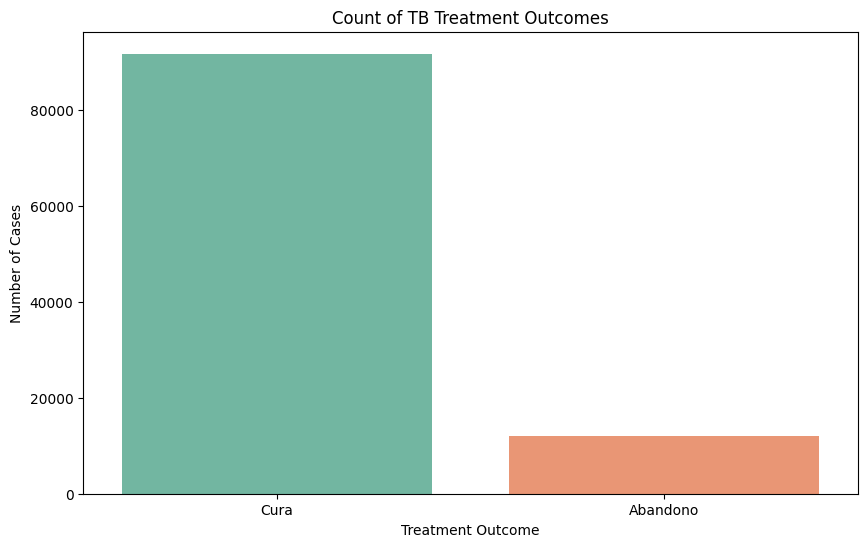

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a graph for the count of unique values in the 'current_status' column (TB treatment outcomes)
tb_treatment_outcomes = data_cleaned['current_status'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=tb_treatment_outcomes.index, y=tb_treatment_outcomes.values, palette='Set2')
plt.title('Count of TB Treatment Outcomes')
plt.xlabel('Treatment Outcome')
plt.ylabel('Number of Cases')
plt.show()

<ipython-input-26-7f556b672944>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='current_status', y='age', data=data_cleaned, palette='Set2')


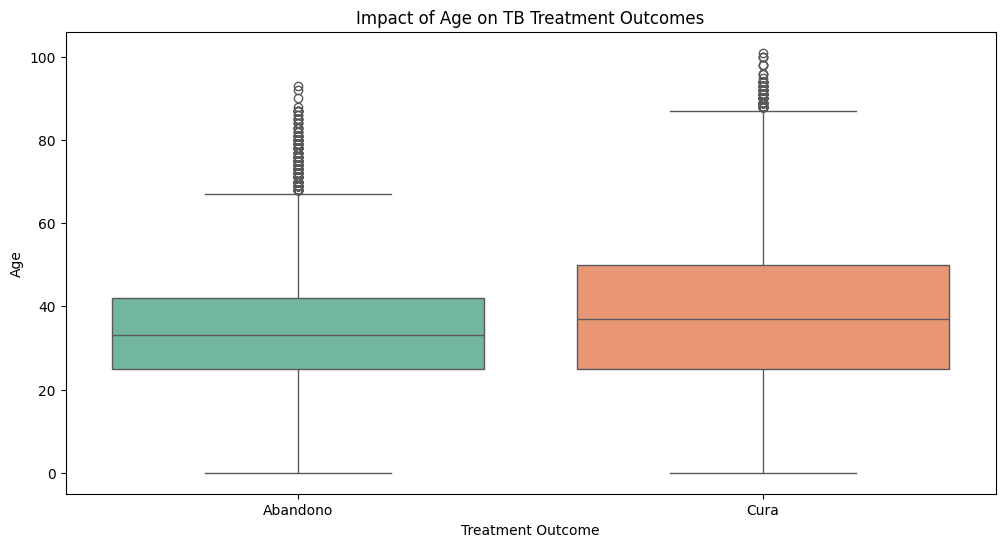

count       mean        std  min   25%   50%   75%    max
current_status                                                             
Abandono        12023.0  34.739416  12.963505  0.0  25.0  33.0  42.0   93.0
Cura            91823.0  38.366629  16.659729  0.0  25.0  37.0  50.0  101.0

In [ ]:
# Create a boxplot to visualize the age distribution for each treatment outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='current_status', y='age', data=data_cleaned, palette='Set2')
plt.title('Impact of Age on TB Treatment Outcomes')
plt.xlabel('Treatment Outcome')
plt.ylabel('Age')
plt.show()

# Calculate descriptive statistics for age based on treatment outcomes
age_treatment_stats = data_cleaned.groupby('current_status')['age'].describe()
age_treatment_stats

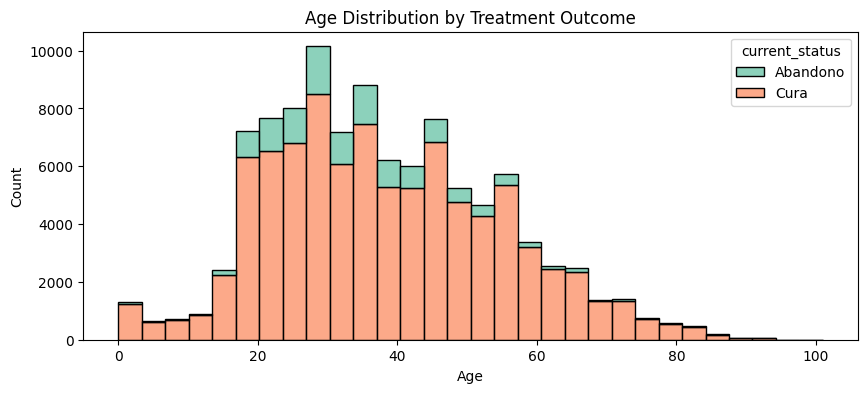

In [ ]:
# Create histograms for age distribution by treatment outcome
plt.figure(figsize=(10, 4))
sns.histplot(data=data_cleaned, x='age', hue='current_status', multiple='stack', bins=30, palette='Set2')
plt.title('Age Distribution by Treatment Outcome')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-28-bf8676ab3fd9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='gender', palette='Set2')


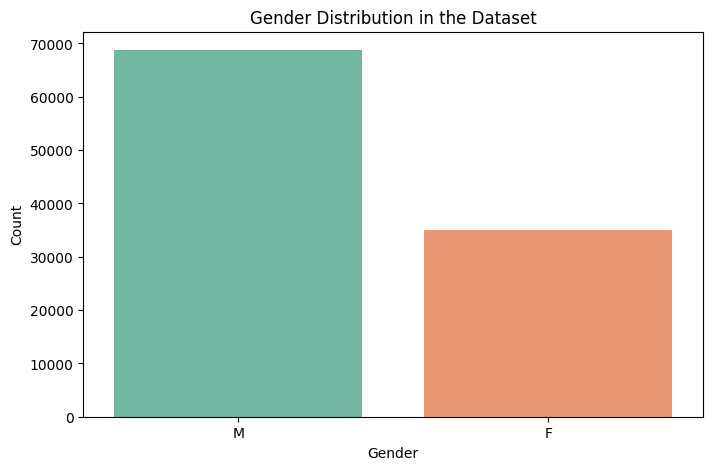

gender
M    68755
F    35091
Name: count, dtype: int64

In [ ]:
# Create a count plot to visualize gender distribution in the dataset
plt.figure(figsize=(8, 5))
sns.countplot(data=data_cleaned, x='gender', palette='Set2')
plt.title('Gender Distribution in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Display the count for each gender
gender_counts = data_cleaned['gender'].value_counts()
gender_counts

Gender Distribution by Treatment Outcome

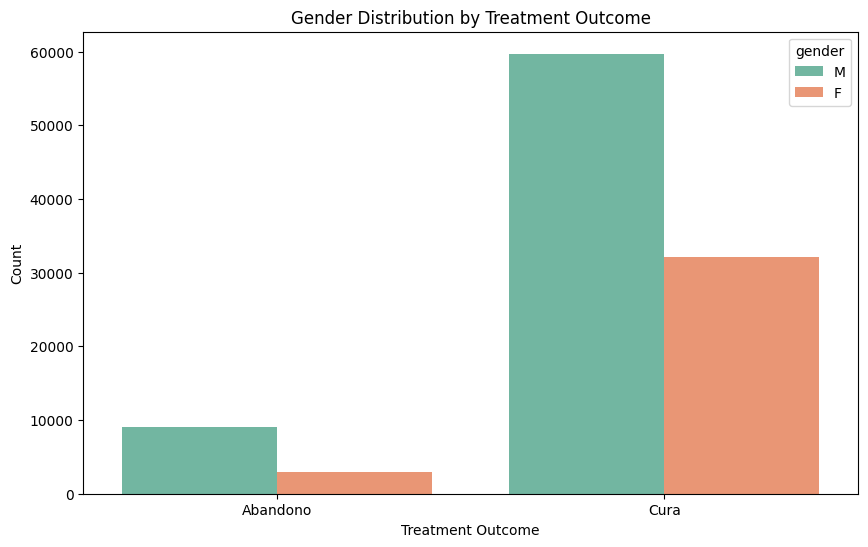

gender              F      M
current_status              
Abandono         2984   9039
Cura            32107  59716

In [ ]:
# Create a count plot to visualize gender distribution by treatment outcome
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='current_status', hue='gender', palette='Set2')
plt.title('Gender Distribution by Treatment Outcome')
plt.xlabel('Treatment Outcome')
plt.ylabel('Count')
plt.show()

# Display count for each gender against treatment outcome
gender_treatment_counts = data_cleaned.groupby(['current_status', 'gender']).size().unstack()
gender_treatment_counts

In [ ]:
# Display unique values and count of missing values in the 'classification' column
classification_counts = data_cleaned['classification'].value_counts(dropna=False)
num_missing_classification = data_cleaned['classification'].isnull().sum()

classification_counts, num_missing_classification

(classification
 Pul       82972
 Ext       17214
 P+E        3383
 Dissem      276
 NaN           1
 Name: count, dtype: int64,
 1)

In [ ]:
# Remove the row with a missing value in the 'classification' column
data_cleaned = data_cleaned[data_cleaned['classification'].notnull()]

# Verify that the row has been deleted by checking for remaining missing values
num_missing_classification_after = data_cleaned['classification'].isnull().sum()

num_missing_classification_after

0

In [ ]:
# Impute missing values based on the suggested strategies
data_cleaned['necropsy'].fillna('Not Performed', inplace=True)
data_cleaned['other_x_ray'].fillna('Not Available', inplace=True)
data_cleaned['other_culture_exam'].fillna('Not Performed', inplace=True)
data_cleaned['other_bacilloscopy'].fillna('Not Performed', inplace=True)

# Verify that the missing values have been handled
remaining_missing_values_check = data_cleaned[['necropsy', 'other_x_ray', 'other_culture_exam', 'other_bacilloscopy']].isnull().sum()

remaining_missing_values_check

<ipython-input-32-bf4e0b8b92a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['necropsy'].fillna('Not Performed', inplace=True)
<ipython-input-32-bf4e0b8b92a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['necropsy'].fillna('Not Performed', inplace=True)
<ipython-input-32-bf4e0b8b92a9>:3: FutureWarning: A value

necropsy              0
other_x_ray           0
other_culture_exam    0
other_bacilloscopy    0
dtype: int64

In [ ]:
# Display unique values in each of the specified columns
unique_values_necropsy = data_cleaned['necropsy'].unique()
unique_values_other_x_ray = data_cleaned['other_x_ray'].unique()
unique_values_other_culture_exam = data_cleaned['other_culture_exam'].unique()
unique_values_other_bacilloscopy = data_cleaned['other_bacilloscopy'].unique()

unique_values_info = {
    'necropsy': unique_values_necropsy,
    'other_x_ray': unique_values_other_x_ray,
    'other_culture_exam': unique_values_other_culture_exam,
    'other_bacilloscopy': unique_values_other_bacilloscopy
}

unique_values_info

{'necropsy': array(['N/realiz', 'Not Performed', 'BAAR pos', 'Sugestivo TB'],
       dtype=object),
 'other_x_ray': array(['N/realiz', 'Not Available', 'Susp TB', 'Outra Patologia',
        'Normal', 'Susp c/cavid'], dtype=object),
 'other_culture_exam': array(['Neg', 'N/realiz', 'Pos', 'Not Performed', 'And'], dtype=object),
 'other_bacilloscopy': array(['Neg', 'N/realiz', 'Pos', 'Not Performed', 'And'], dtype=object)}

In [ ]:
# Replace imputed placeholders with 'N/realiz' where applicable
data_cleaned['necropsy'].replace('Not Performed', 'N/realiz', inplace=True)
data_cleaned['other_x_ray'].replace('Not Available', 'N/realiz', inplace=True)
data_cleaned['other_culture_exam'].replace('Not Performed', 'N/realiz', inplace=True)
data_cleaned['other_bacilloscopy'].replace('Not Performed', 'N/realiz', inplace=True)

# Verify the replacements
unique_values_after_replacement = {
    'necropsy': data_cleaned['necropsy'].unique(),
    'other_x_ray': data_cleaned['other_x_ray'].unique(),
    'other_culture_exam': data_cleaned['other_culture_exam'].unique(),
    'other_bacilloscopy': data_cleaned['other_bacilloscopy'].unique()
}

unique_values_after_replacement

{'necropsy': array(['N/realiz', 'BAAR pos', 'Sugestivo TB'], dtype=object),
 'other_x_ray': array(['N/realiz', 'Susp TB', 'Outra Patologia', 'Normal', 'Susp c/cavid'],
       dtype=object),
 'other_culture_exam': array(['Neg', 'N/realiz', 'Pos', 'And'], dtype=object),
 'other_bacilloscopy': array(['Neg', 'N/realiz', 'Pos', 'And'], dtype=object)}

In [ ]:
# Verify that the missing values have been handled
remaining_missing_values_check = data_cleaned.isnull().sum()

remaining_missing_values_check

race_color                  14034
age_group                       0
gender                          0
pregnant                        0
education_level             20159
occupation_type             12091
previous_treatment_code      3629
treated_previously              0
current_status                  0
case_type                       0
clinical_form1                  7
classification                  0
discovery_method             1606
bacilloscopy                  946
other_bacilloscopy              0
culture_exam                 8124
other_culture_exam              0
x_ray                        5035
other_x_ray                     0
necropsy                        0
hiv_status                   1695
aids                            0
diabetes                        0
alcoholism                      0
mental_condition                0
drug_addiction                  0
smoking_habit                   0
total_communications            0
exposed_communication           0
communicated_disease            0
treatment_institution        4289
initial_treatment_scheme       65
current_scheme                  0
treatment_type               6920
number_primary_doses            0
number_secondary_doses          0
age                             0
histopathological_exam      19813
other_immunological_test        0
reason_for_intervention1    79927
dtype: int64

In [ ]:
# Display unique values and counts for the specified columns
education_level_counts = data_cleaned['education_level'].value_counts(dropna=False)
histopathological_exam_counts = data_cleaned['histopathological_exam'].value_counts(dropna=False)
race_color_counts = data_cleaned['race_color'].value_counts(dropna=False)
occupation_type_counts = data_cleaned['occupation_type'].value_counts(dropna=False)

education_level_counts, histopathological_exam_counts, race_color_counts, occupation_type_counts

(education_level
 De 8 a 11 anos     31925
 De 4 a 7 anos      28893
 NaN                20159
 De 1 a 3 anos       9365
 De 12 a 14 anos     6466
 Nenhuma             3982
 15 anos e mais      3055
 Name: count, dtype: int64,
 histopathological_exam
 N/realiz        74874
 NaN             19813
 Sugestivo TB     6846
 BAAR pos         2312
 Name: count, dtype: int64,
 race_color
 Branco      45817
 Pardo       31869
 NaN         14034
 Preto       10553
 Amarelo       954
 Indigena      618
 Name: count, dtype: int64,
 occupation_type
 Outra                    61168
 Desempregado             13933
 NaN                      12091
 Dona de Casa              8540
 Aposentado                6547
 Profissional de Saude     1566
 Name: count, dtype: int64)

<ipython-input-37-f7cc210c72c1>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(education_level_counts.index, rotation=45)
<ipython-input-37-f7cc210c72c1>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(histopathological_exam_counts.index, rotation=45)
<ipython-input-37-f7cc210c72c1>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(race_color_counts.index, rotation=45)
<ipython-input-37-f7cc210c72c1>:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(occupation_type_counts.index, rotation=45)


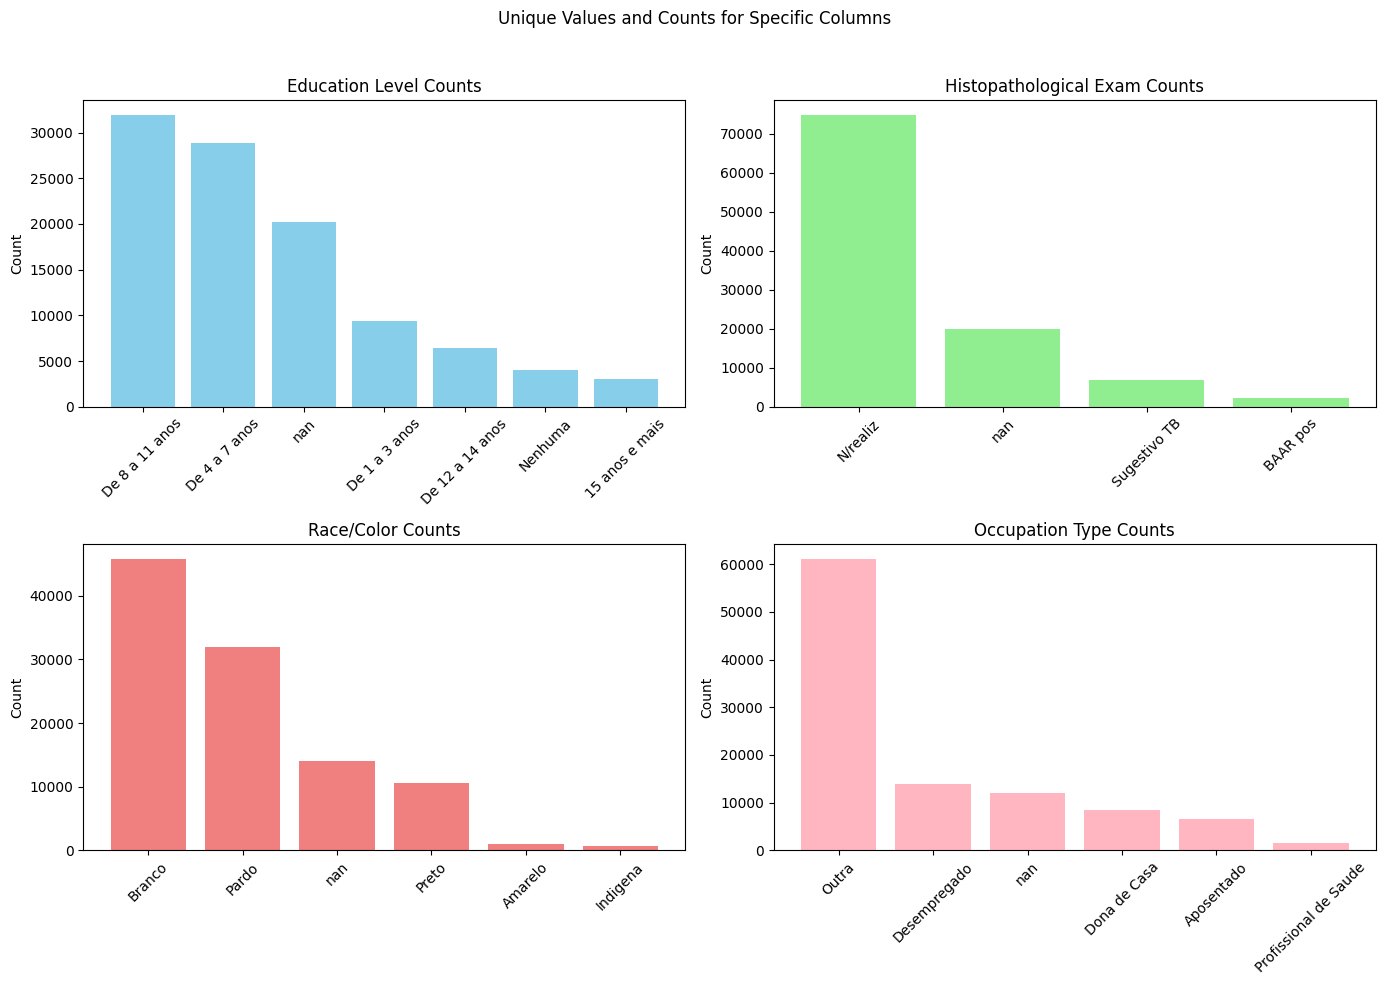

In [ ]:
# Convert indices to strings
education_level_counts.index = education_level_counts.index.astype(str)
histopathological_exam_counts.index = histopathological_exam_counts.index.astype(str)
race_color_counts.index = race_color_counts.index.astype(str)
occupation_type_counts.index = occupation_type_counts.index.astype(str)


# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Unique Values and Counts for Specific Columns')

# Education Level
axes[0, 0].bar(education_level_counts.index, education_level_counts.values, color='skyblue')
axes[0, 0].set_title('Education Level Counts')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(education_level_counts.index, rotation=45)

# Histopathological Exam
axes[0, 1].bar(histopathological_exam_counts.index, histopathological_exam_counts.values, color='lightgreen')
axes[0, 1].set_title('Histopathological Exam Counts')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(histopathological_exam_counts.index, rotation=45)

# Race/Color
axes[1, 0].bar(race_color_counts.index, race_color_counts.values, color='lightcoral')
axes[1, 0].set_title('Race/Color Counts')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(race_color_counts.index, rotation=45)

# Occupation Type
axes[1, 1].bar(occupation_type_counts.index, occupation_type_counts.values, color='lightpink')
axes[1, 1].set_title('Occupation Type Counts')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(occupation_type_counts.index, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

1. **`education_level` (19.41% missing)**: Represents the level of education attained by the patient.
2. **`histopathological_exam` (19.08% missing)**: Indicates whether a histopathological examination was performed or its result.
3. **`race_color` (13.52% missing)**: Represents the racial or ethnic background of the patient.
4. **`occupation_type` (11.64% missing)**: Refers to the type of occupation held by the patient.

Here's an overview of the unique values and their counts for the specified columns:

1. **`education_level`**:
   - **De 8 a 11 anos (8 to 11 years of education)**: 31,925 cases
   - **De 4 a 7 anos (4 to 7 years of education)**: 28,893 cases
   - **NaN (Missing)**: 20,160 cases
   - **De 1 a 3 anos (1 to 3 years of education)**: 9,365 cases
   - **De 12 a 14 anos (12 to 14 years of education)**: 6,466 cases
   - **Nenhuma (None)**: 3,982 cases
   - **15 anos e mais (15 years or more)**: 3,055 cases

2. **`histopathological_exam`**:
   - **N/realiz (Not performed)**: 74,874 cases
   - **NaN (Missing)**: 19,814 cases
   - **Sugestivo TB (Suggestive of TB)**: 6,846 cases
   - **BAAR pos (Positive BAAR)**: 2,312 cases

3. **`race_color`**:
   - **Branco (White)**: 45,817 cases
   - **Pardo (Mixed race)**: 31,869 cases
   - **NaN (Missing)**: 14,035 cases
   - **Preto (Black)**: 10,553 cases
   - **Amarelo (Yellow/Asian)**: 954 cases
   - **Indigena (Indigenous)**: 618 cases

4. **`occupation_type`**:
   - **Outra (Other)**: 61,169 cases
   - **Desempregado (Unemployed)**: 13,933 cases
   - **NaN (Missing)**: 12,091 cases
   - **Dona de Casa (Housewife)**: 8,540 cases
   - **Aposentado (Retired)**: 6,547 cases
   - **Profissional de Saude (Health Professional)**: 1,566 cases

In [ ]:
# Check what other columns have missing values for the rows where each specified column is missing
missing_in_education = data_cleaned[data_cleaned['education_level'].isnull()].isnull().sum()
missing_in_histopathology = data_cleaned[data_cleaned['histopathological_exam'].isnull()].isnull().sum()
missing_in_race_color = data_cleaned[data_cleaned['race_color'].isnull()].isnull().sum()
missing_in_occupation = data_cleaned[data_cleaned['occupation_type'].isnull()].isnull().sum()

# Display the counts of missing values in other columns for each case
missing_in_education, missing_in_histopathology, missing_in_race_color, missing_in_occupation

(race_color                   6719
 age_group                       0
 gender                          0
 pregnant                        0
 education_level             20159
 occupation_type              5445
 previous_treatment_code       903
 treated_previously              0
 current_status                  0
 case_type                       0
 clinical_form1                  2
 classification                  0
 discovery_method              444
 bacilloscopy                  313
 other_bacilloscopy              0
 culture_exam                 2411
 other_culture_exam              0
 x_ray                        1527
 other_x_ray                     0
 necropsy                        0
 hiv_status                    647
 aids                            0
 diabetes                        0
 alcoholism                      0
 mental_condition                0
 drug_addiction                  0
 smoking_habit                   0
 total_communications            0
 exposed_communicati

In [ ]:
# Impute missing values with unknown and N/realiz
data_cleaned['histopathological_exam'].fillna('N/realiz', inplace=True)
data_cleaned['education_level'].fillna('Unknown', inplace=True)
data_cleaned['occupation_type'].fillna('Other/Unknown', inplace=True)

# Verify the imputation by checking the number of missing values remaining in these columns
remaining_missing_values = data_cleaned[['histopathological_exam', 'education_level', 'occupation_type']].isnull().sum()

remaining_missing_values

<ipython-input-39-611a48a0c07e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['histopathological_exam'].fillna('N/realiz', inplace=True)
<ipython-input-39-611a48a0c07e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

histopathological_exam    0
education_level           0
occupation_type           0
dtype: int64

In [ ]:
# Count the number of 'race_color' values for the 'Abandono' treatment outcome
race_color_abandoned_counts = data_cleaned[data_cleaned['current_status'] == 'Abandono']['race_color'].value_counts()

race_color_abandoned_counts

race_color
Branco      4445
Pardo       4154
Preto       1530
Indigena      77
Amarelo       74
Name: count, dtype: int64

In [ ]:
# Count the number of NaN 'race_color' values for the 'Abandono' treatment outcome
race_color_nan_abandoned = data_cleaned[(data_cleaned['current_status'] == 'Abandono') & (data_cleaned['race_color'].isnull())].shape[0]

race_color_nan_abandoned

1743

In [ ]:
# Verify that the missing values have been handled
remaining_missing_values_check = data_cleaned.isnull().sum()

remaining_missing_values_check

race_color                  14034
age_group                       0
gender                          0
pregnant                        0
education_level                 0
occupation_type                 0
previous_treatment_code      3629
treated_previously              0
current_status                  0
case_type                       0
clinical_form1                  7
classification                  0
discovery_method             1606
bacilloscopy                  946
other_bacilloscopy              0
culture_exam                 8124
other_culture_exam              0
x_ray                        5035
other_x_ray                     0
necropsy                        0
hiv_status                   1695
aids                            0
diabetes                        0
alcoholism                      0
mental_condition                0
drug_addiction                  0
smoking_habit                   0
total_communications            0
exposed_communication           0
communicated_disease            0
treatment_institution        4289
initial_treatment_scheme       65
current_scheme                  0
treatment_type               6920
number_primary_doses            0
number_secondary_doses          0
age                             0
histopathological_exam          0
other_immunological_test        0
reason_for_intervention1    79927
dtype: int64

In [ ]:
# List of columns with missing values to check unique values
columns_with_missing_values = [
    'race_color', 'previous_treatment_code', 'clinical_form1',
    'discovery_method', 'bacilloscopy', 'culture_exam',
    'x_ray', 'hiv_status', 'treatment_institution',
    'initial_treatment_scheme', 'treatment_type', 'reason_for_intervention1'
]

# Check unique values for each column with missing data
unique_values_in_columns = {col: data_cleaned[col].unique() for col in columns_with_missing_values}

# Print unique values
for col, unique_vals in unique_values_in_columns.items():
    print(f"\nUnique values in '{col}':")
    print(unique_vals)



Unique values in 'race_color':
['Pardo' nan 'Branco' 'Preto' 'Amarelo' 'Indigena']

Unique values in 'previous_treatment_code':
[ 1. nan  3.  2.  9.  4.  6.  5.]

Unique values in 'clinical_form1':
['Pul' 'Genital' 'Pele' 'Ganglionar Periferica' 'Pleural' 'Ossea' 'Outras'
 'Meningea' 'Intestinal' 'Oftalmica' 'Miliar' 'Multiplos Orgaos'
 'Vias Urinarias' 'Laringea' nan]

Unique values in 'discovery_method':
['Elucidacao Diagn. em Internacao' 'Demanda Ambulatorial'
 'Busca Ativa na Comunidade' 'Urgencia / Emergencia' nan
 'Investigacao de Contatos' 'Busca Ativa em Instituicao']

Unique values in 'bacilloscopy':
['Neg' 'Pos' nan 'N/realiz' 'And']

Unique values in 'culture_exam':
['Neg' 'N/realiz' 'Pos' nan 'And']

Unique values in 'x_ray':
['Susp TB' 'N/realiz' 'Susp c/cavid' 'Normal' nan 'Outra Patologia']

Unique values in 'hiv_status':
['Pos' 'Neg' 'N/realiz' nan 'And']

Unique values in 'treatment_institution':
['N' 'Instit. Penal' nan 'Asilo' 'Albergue' 'Hosp. Psiq.' 'Orfanato'
 'C

In [ ]:
# Replace NaN with 'N/realiz' where applicable
columns_to_replace_nan = ['bacilloscopy', 'culture_exam', 'x_ray', 'hiv_status']

for col in columns_to_replace_nan:
    data_cleaned[col].fillna('N/realiz', inplace=True)

# Verify the replacements by showing unique values after imputation
unique_values_after_imputation = {col: data_cleaned[col].unique() for col in columns_to_replace_nan}

# Print the unique values after imputation
for col, unique_vals in unique_values_after_imputation.items():
    print(f"\nUnique values in '{col}' after imputation:")
    print(unique_vals)


Unique values in 'bacilloscopy' after imputation:
['Neg' 'Pos' 'N/realiz' 'And']

Unique values in 'culture_exam' after imputation:
['Neg' 'N/realiz' 'Pos' 'And']

Unique values in 'x_ray' after imputation:
['Susp TB' 'N/realiz' 'Susp c/cavid' 'Normal' 'Outra Patologia']

Unique values in 'hiv_status' after imputation:
['Pos' 'Neg' 'N/realiz' 'And']


<ipython-input-44-f2a4faed3660>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[col].fillna('N/realiz', inplace=True)


In [ ]:
# Verify that the missing values have been handled
remaining_missing_values_check = data_cleaned.isnull().sum()

remaining_missing_values_check

race_color                  14034
age_group                       0
gender                          0
pregnant                        0
education_level                 0
occupation_type                 0
previous_treatment_code      3629
treated_previously              0
current_status                  0
case_type                       0
clinical_form1                  7
classification                  0
discovery_method             1606
bacilloscopy                    0
other_bacilloscopy              0
culture_exam                    0
other_culture_exam              0
x_ray                           0
other_x_ray                     0
necropsy                        0
hiv_status                      0
aids                            0
diabetes                        0
alcoholism                      0
mental_condition                0
drug_addiction                  0
smoking_habit                   0
total_communications            0
exposed_communication           0
communicated_disease            0
treatment_institution        4289
initial_treatment_scheme       65
current_scheme                  0
treatment_type               6920
number_primary_doses            0
number_secondary_doses          0
age                             0
histopathological_exam          0
other_immunological_test        0
reason_for_intervention1    79927
dtype: int64

In [ ]:
# Drop the 'reason_for_intervention1' column
data_cleaned.drop(columns=['reason_for_intervention1'], inplace=True)

In [ ]:
# Drop the 'previous_treatment_code' column from the dataset
data_cleaned.drop(columns=['previous_treatment_code'], inplace=True)

print('previous_treatment_code' in data_cleaned.columns)

False


In [ ]:
# Verify that the missing values have been handled
remaining_missing_values_check = data_cleaned.isnull().sum()

remaining_missing_values_check

race_color                  14034
age_group                       0
gender                          0
pregnant                        0
education_level                 0
occupation_type                 0
treated_previously              0
current_status                  0
case_type                       0
clinical_form1                  7
classification                  0
discovery_method             1606
bacilloscopy                    0
other_bacilloscopy              0
culture_exam                    0
other_culture_exam              0
x_ray                           0
other_x_ray                     0
necropsy                        0
hiv_status                      0
aids                            0
diabetes                        0
alcoholism                      0
mental_condition                0
drug_addiction                  0
smoking_habit                   0
total_communications            0
exposed_communication           0
communicated_disease            0
treatment_institution        4289
initial_treatment_scheme       65
current_scheme                  0
treatment_type               6920
number_primary_doses            0
number_secondary_doses          0
age                             0
histopathological_exam          0
other_immunological_test        0
dtype: int64

<ipython-input-49-72143cf58a8b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=treatment_type_distribution.index, y=treatment_type_distribution.values, palette='Set2')


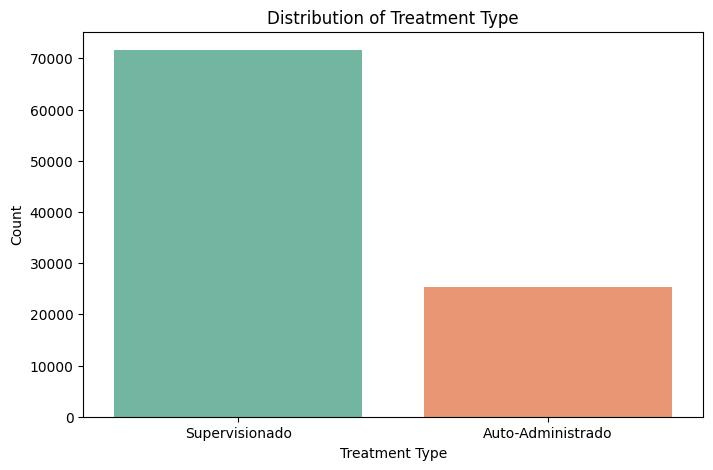

treatment_type
Supervisionado       71624
Auto-Administrado    25301
NaN                   6920
Name: count, dtype: int64

In [ ]:
# Examine the distribution of the 'treatment_type' column
treatment_type_distribution = data_cleaned['treatment_type'].value_counts(dropna=False)

# Plot the distribution of 'treatment_type'
plt.figure(figsize=(8, 5))
sns.barplot(x=treatment_type_distribution.index, y=treatment_type_distribution.values, palette='Set2')
plt.title('Distribution of Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.show()

# Display the distribution data
treatment_type_distribution

In [ ]:
# Replace NaN or unspecified values in 'treatment_type' with 'Supervisionado'
data_cleaned['treatment_type'].fillna('Supervisionado', inplace=True)

<ipython-input-50-d416ffc592db>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['treatment_type'].fillna('Supervisionado', inplace=True)


<ipython-input-51-60d5751f6134>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=treatment_type_distribution_updated.index, y=treatment_type_distribution_updated.values, palette='Set2')


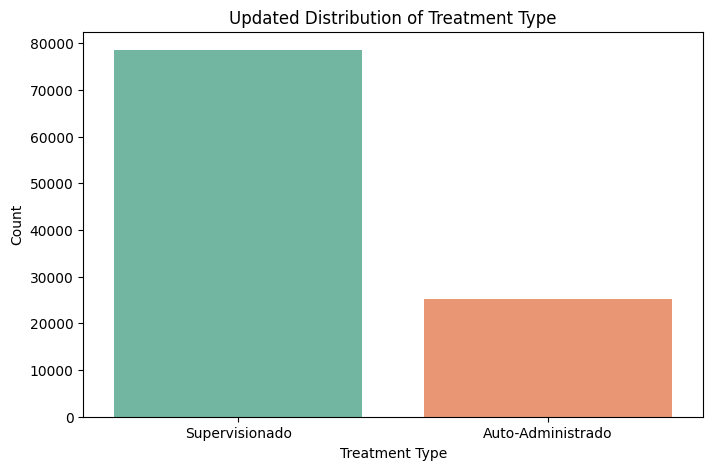

treatment_type
Supervisionado       78544
Auto-Administrado    25301
Name: count, dtype: int64

In [ ]:

# Verify the change by displaying unique values and their distribution
treatment_type_distribution_updated = data_cleaned['treatment_type'].value_counts()

# Plot the updated distribution of 'treatment_type'
plt.figure(figsize=(8, 5))
sns.barplot(x=treatment_type_distribution_updated.index, y=treatment_type_distribution_updated.values, palette='Set2')
plt.title('Updated Distribution of Treatment Type')
plt.xlabel('Treatment Type')
plt.ylabel('Count')
plt.show()

# Display the updated distribution data
treatment_type_distribution_updated

In [ ]:
# Check unique values in the remaining columns with missing data
columns_to_check = ['clinical_form1', 'discovery_method']
unique_values_remaining = {col: data_cleaned[col].unique() for col in columns_to_check}

unique_values_remaining

{'clinical_form1': array(['Pul', 'Genital', 'Pele', 'Ganglionar Periferica', 'Pleural',
        'Ossea', 'Outras', 'Meningea', 'Intestinal', 'Oftalmica', 'Miliar',
        'Multiplos Orgaos', 'Vias Urinarias', 'Laringea', nan],
       dtype=object),
 'discovery_method': array(['Elucidacao Diagn. em Internacao', 'Demanda Ambulatorial',
        'Busca Ativa na Comunidade', 'Urgencia / Emergencia', nan,
        'Investigacao de Contatos', 'Busca Ativa em Instituicao'],
       dtype=object)}

In [ ]:
# Drop rows where 'race_color' is NaN
data_cleaned = data_cleaned[data_cleaned['race_color'].notna()]

# Verify that rows with NaN in 'race_color' have been dropped
remaining_nan_race_color = data_cleaned['race_color'].isnull().sum()

remaining_nan_race_color

0

<ipython-input-54-938ace253bb0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_color_distribution.index, y=race_color_distribution.values, palette='Set2')


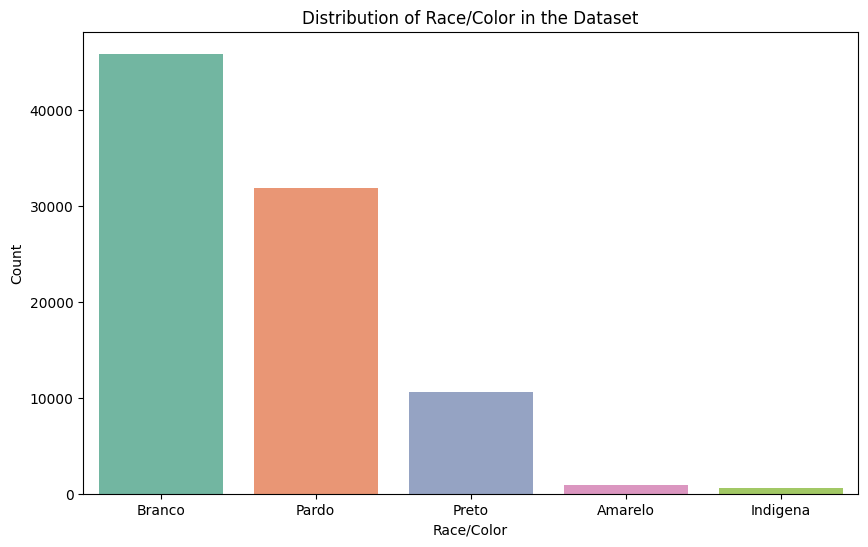

race_color
Branco      45817
Pardo       31869
Preto       10553
Amarelo       954
Indigena      618
Name: count, dtype: int64


In [ ]:
# Plot the distribution of 'race_color' in the dataset
race_color_distribution = data_cleaned['race_color'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=race_color_distribution.index, y=race_color_distribution.values, palette='Set2')
plt.title('Distribution of Race/Color in the Dataset')
plt.xlabel('Race/Color')
plt.ylabel('Count')
plt.show()

# Display the distribution data
print(race_color_distribution)


### Categorical variables

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


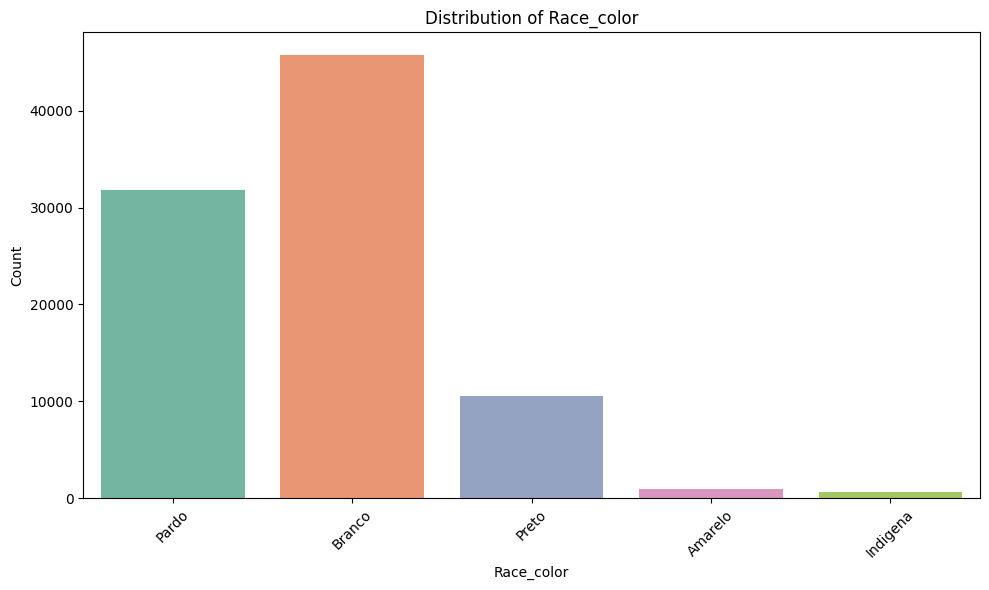

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


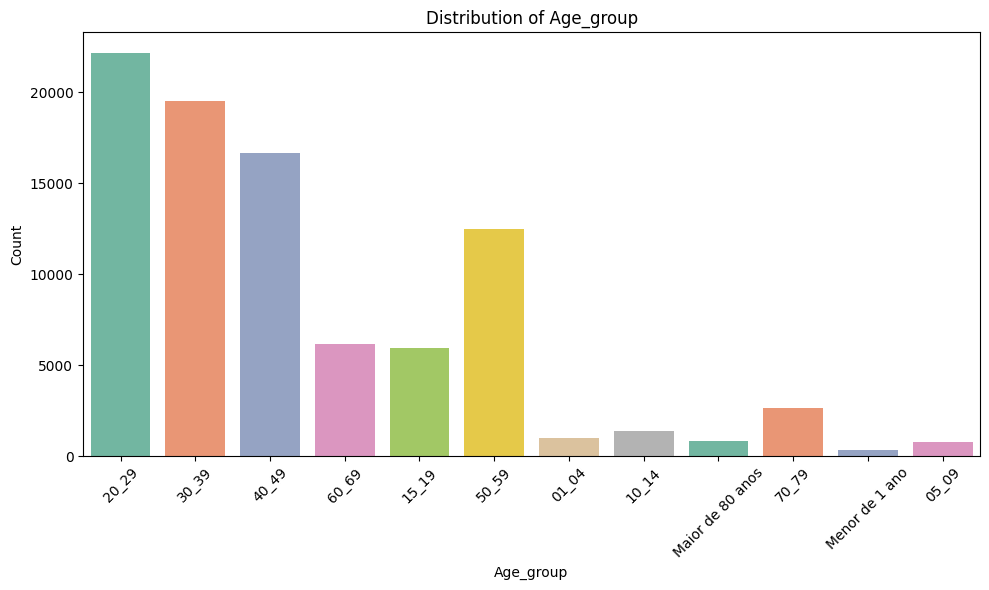

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


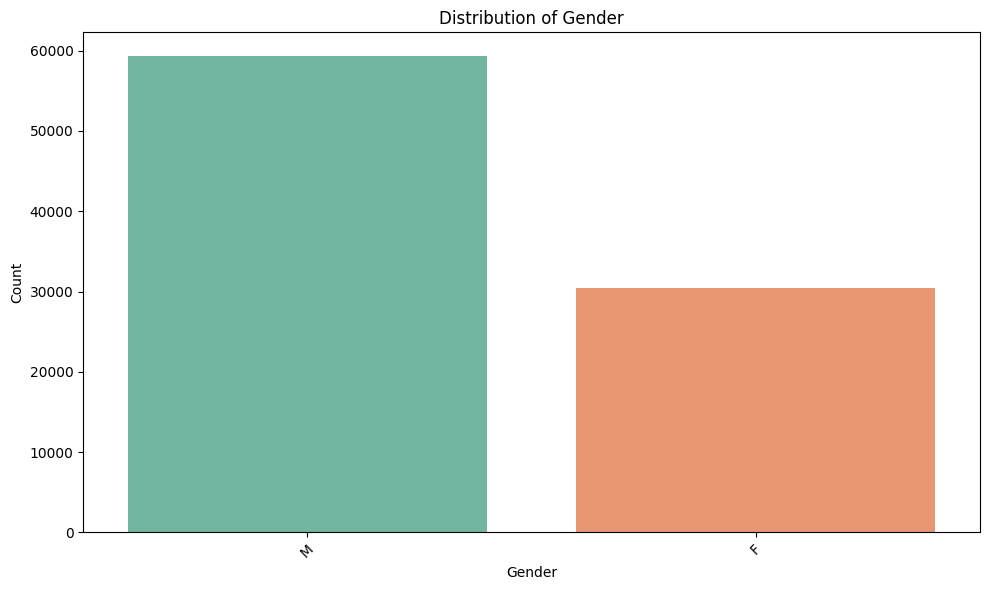

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


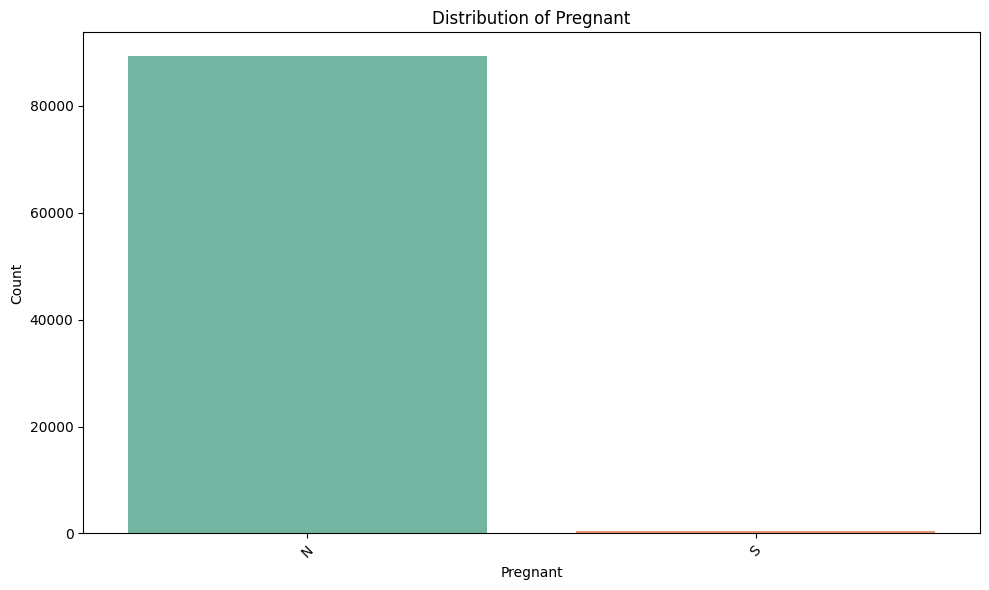

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


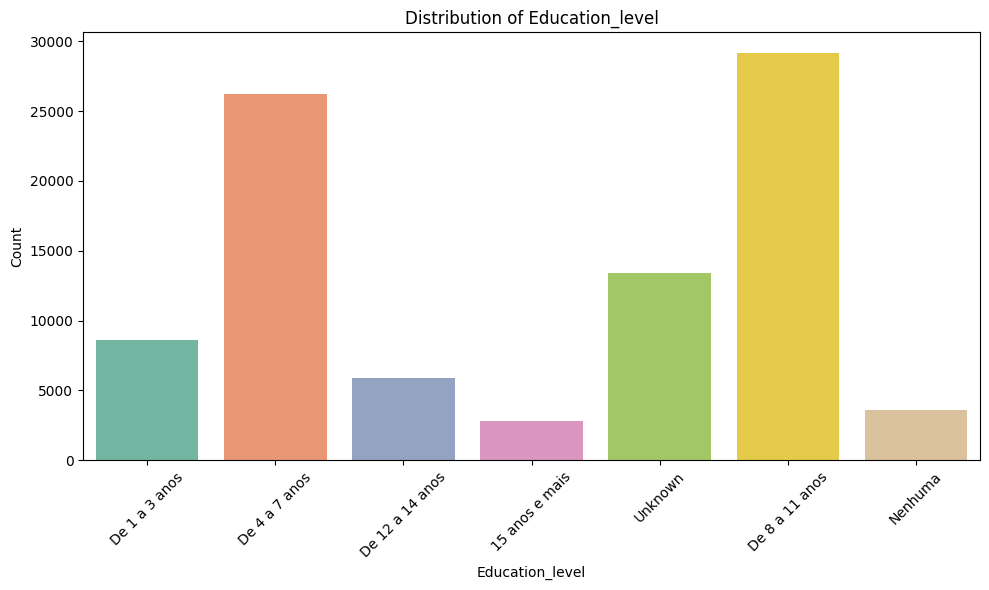

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


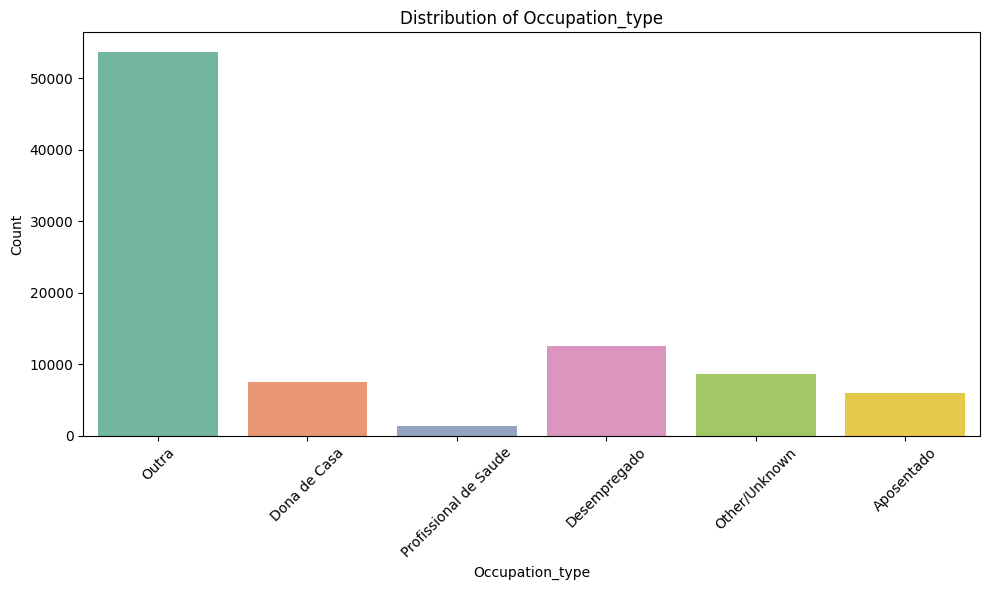

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


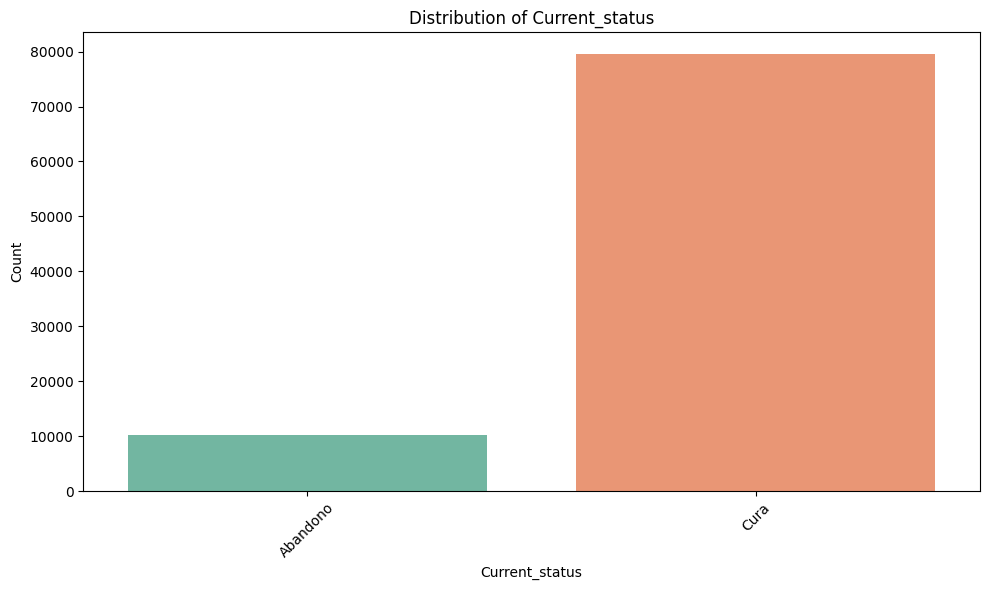

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


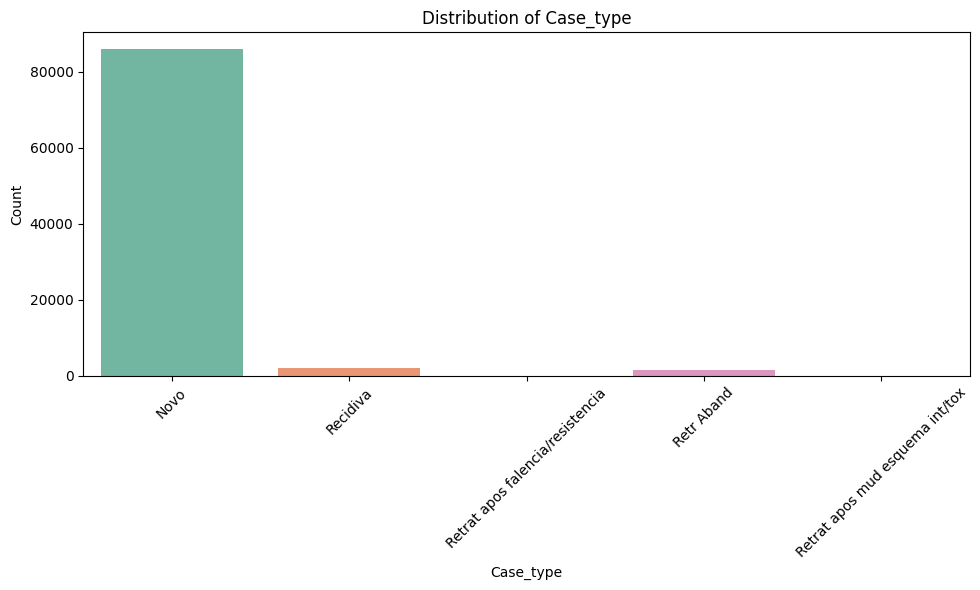

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


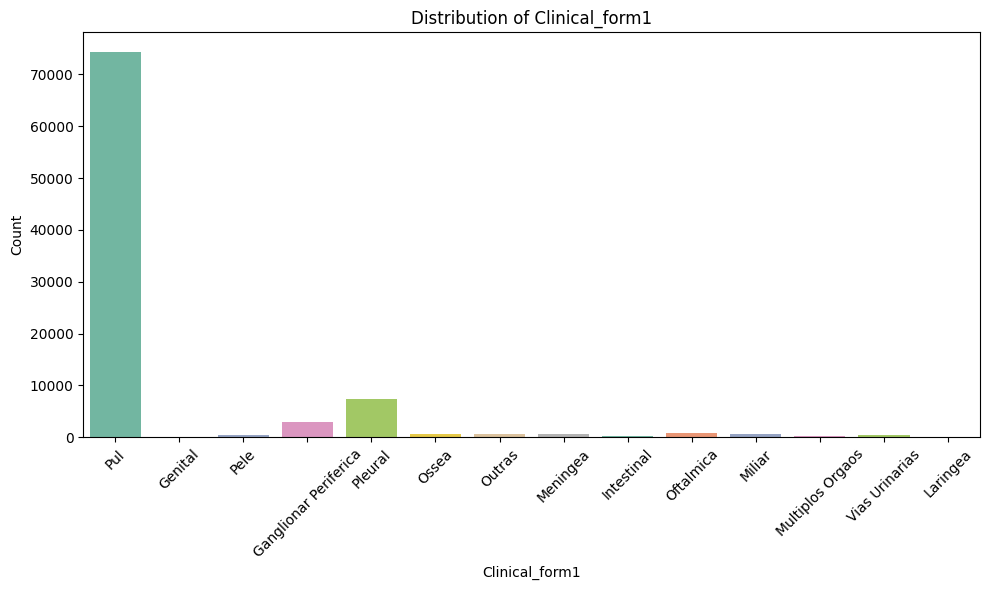

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


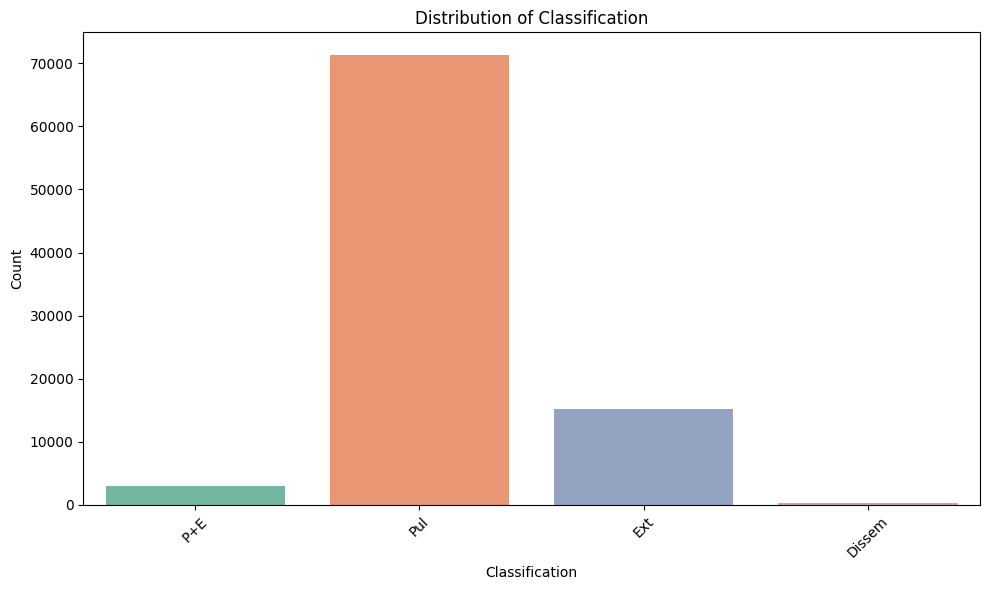

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


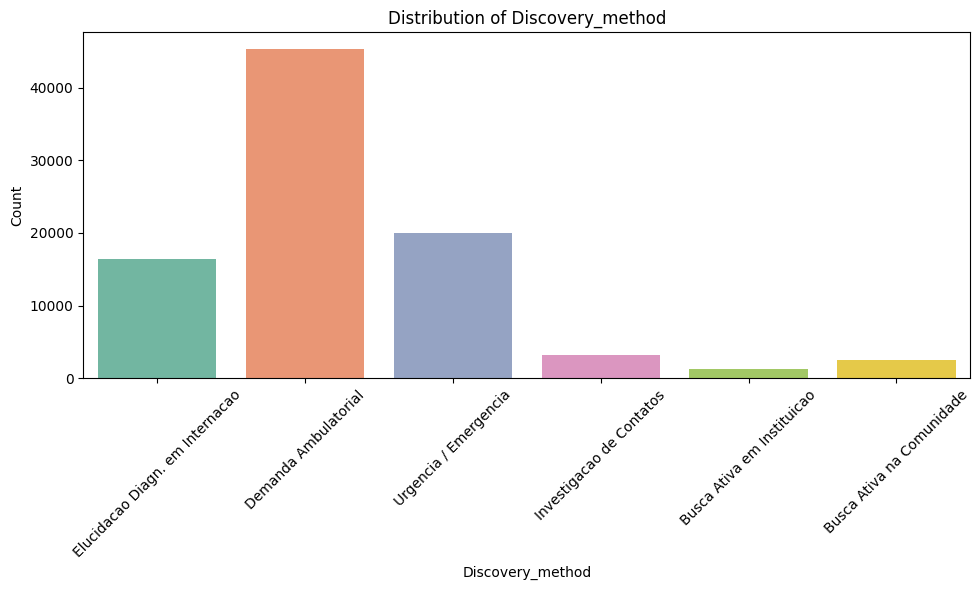

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


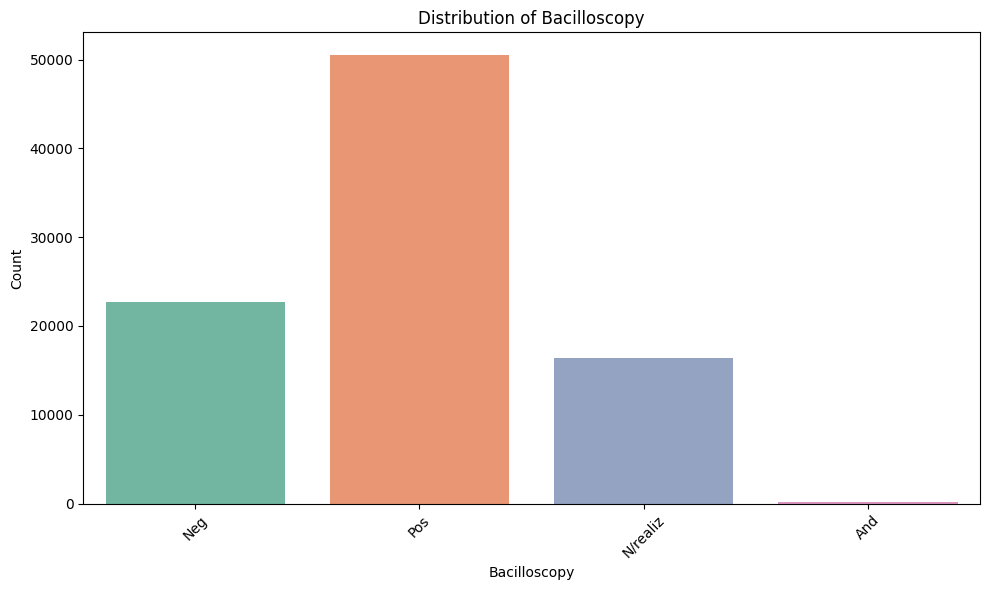

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


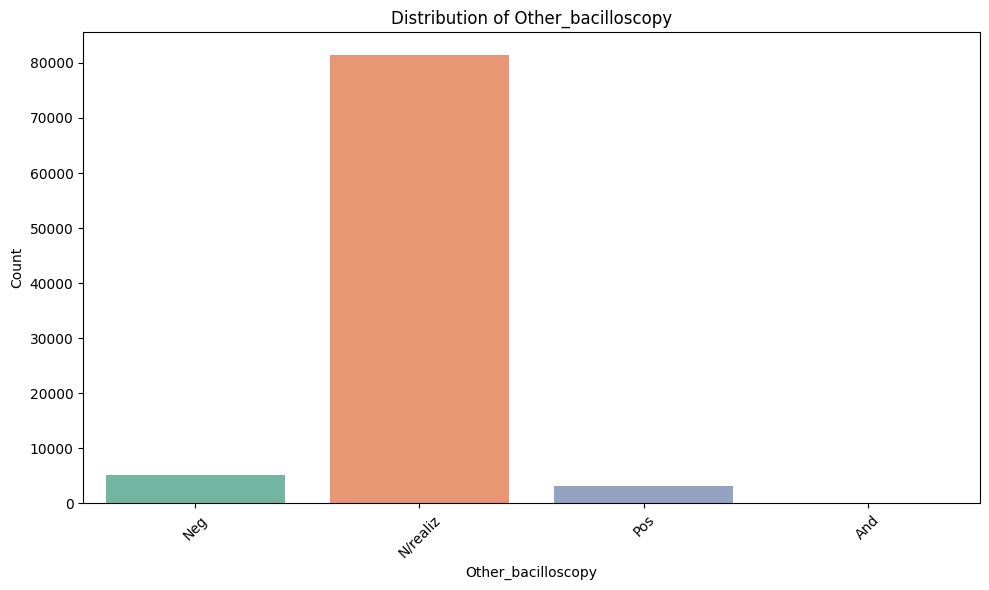

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


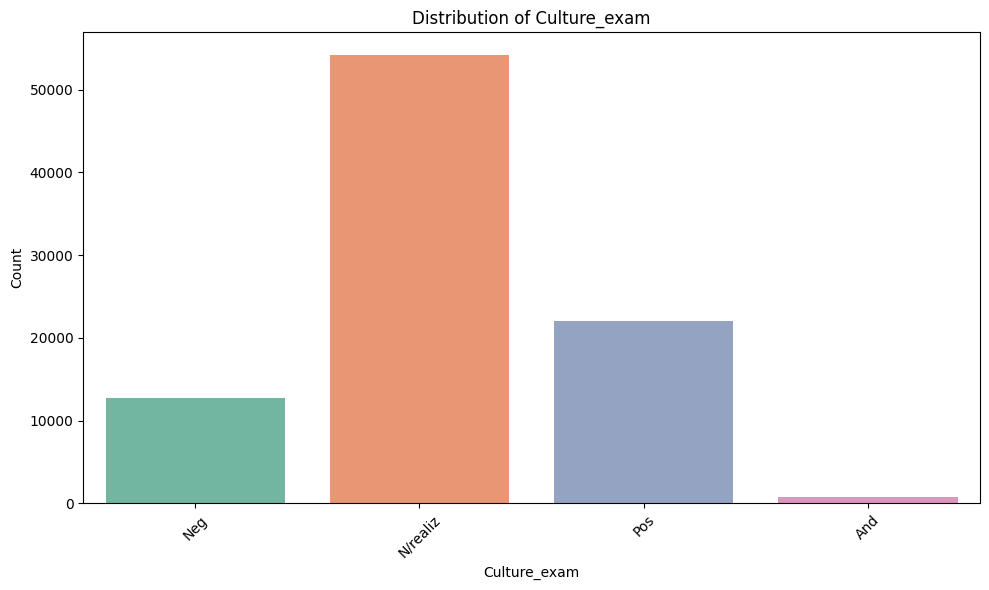

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


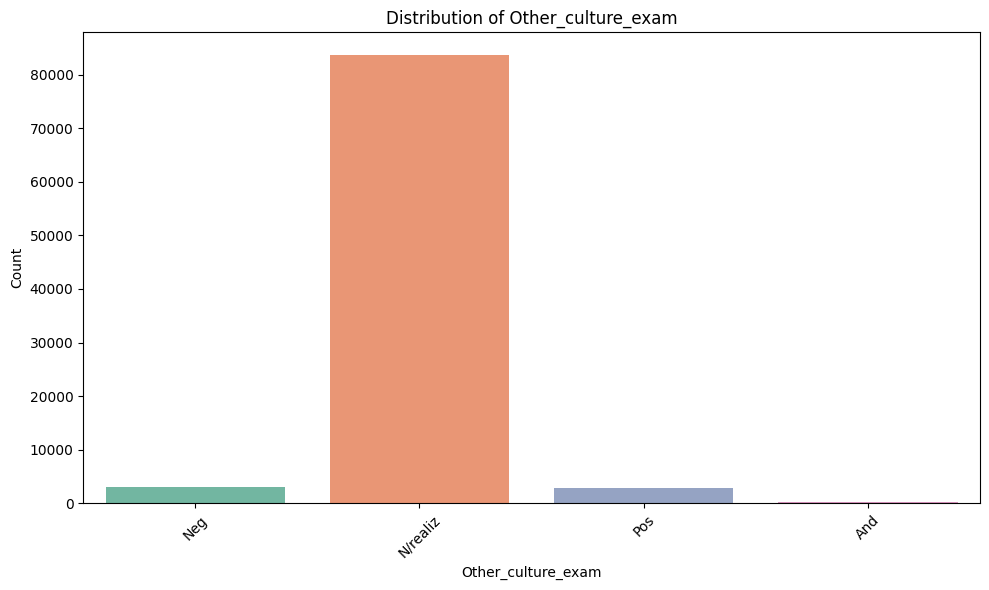

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


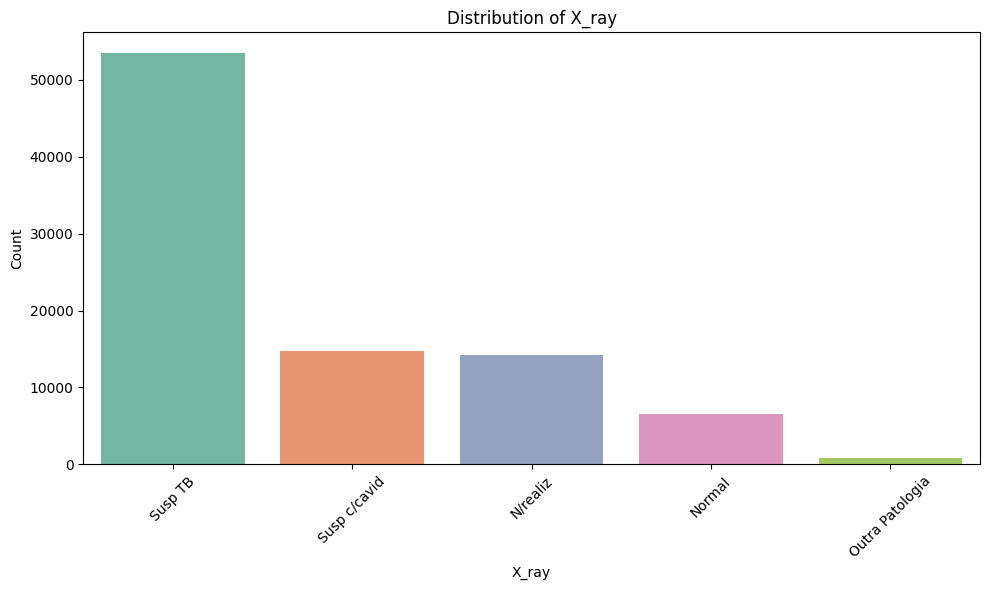

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


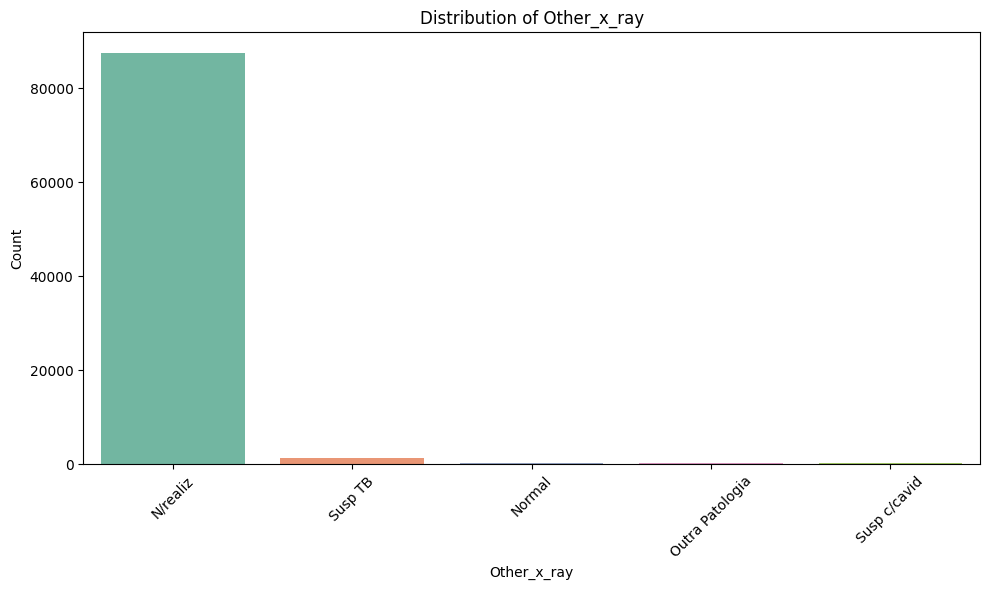

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


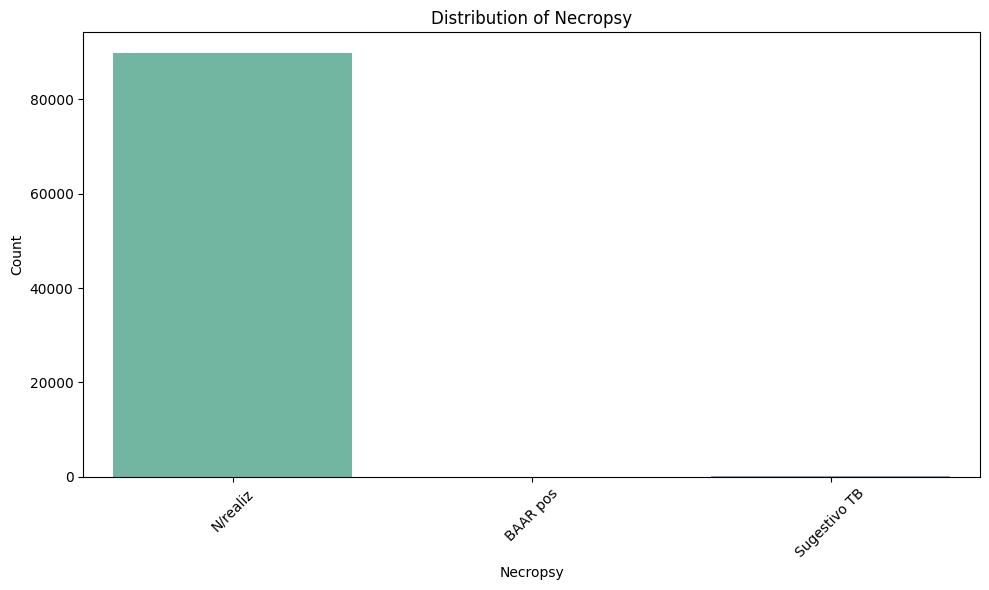

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


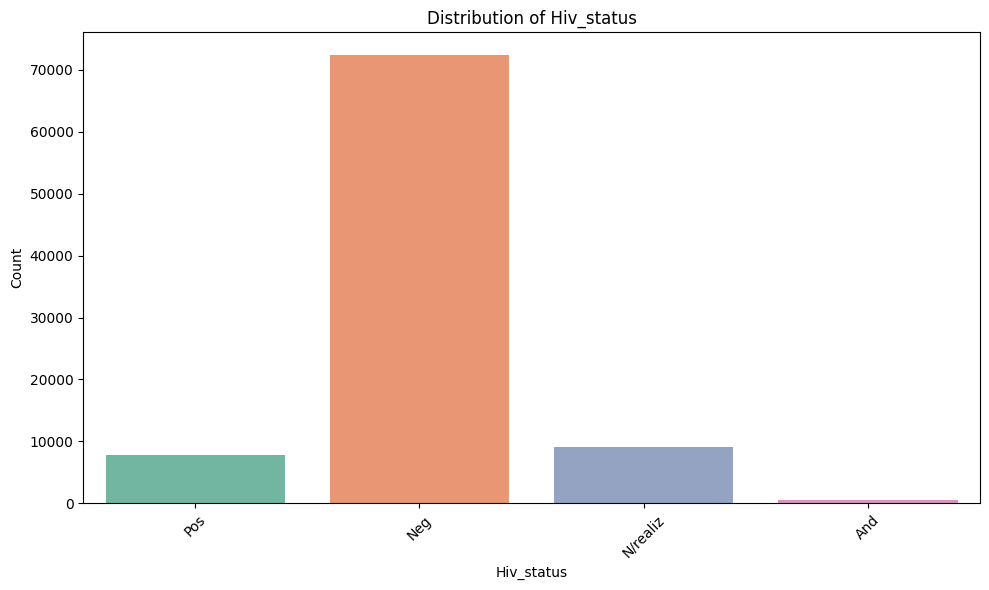

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


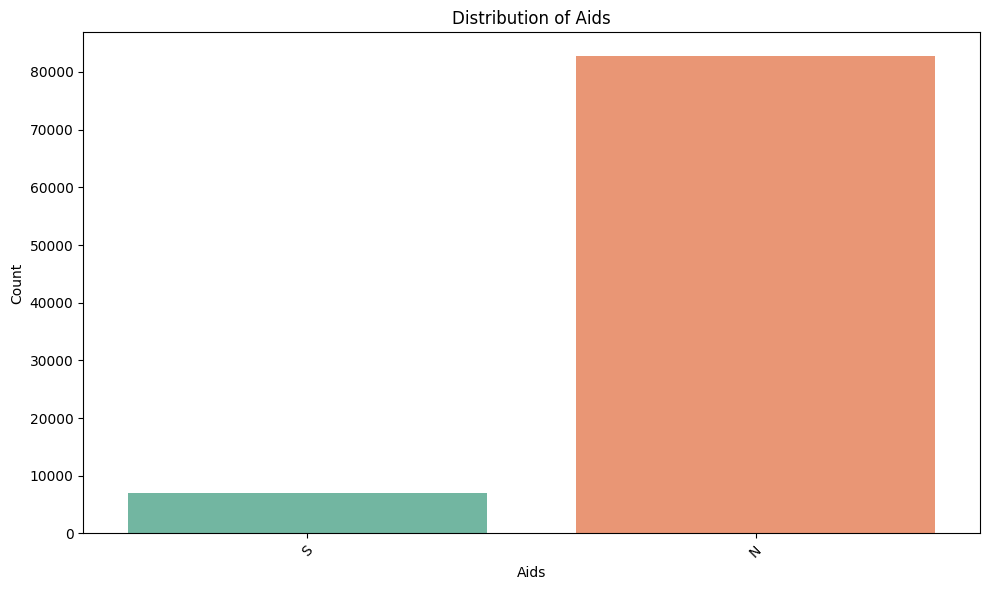

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


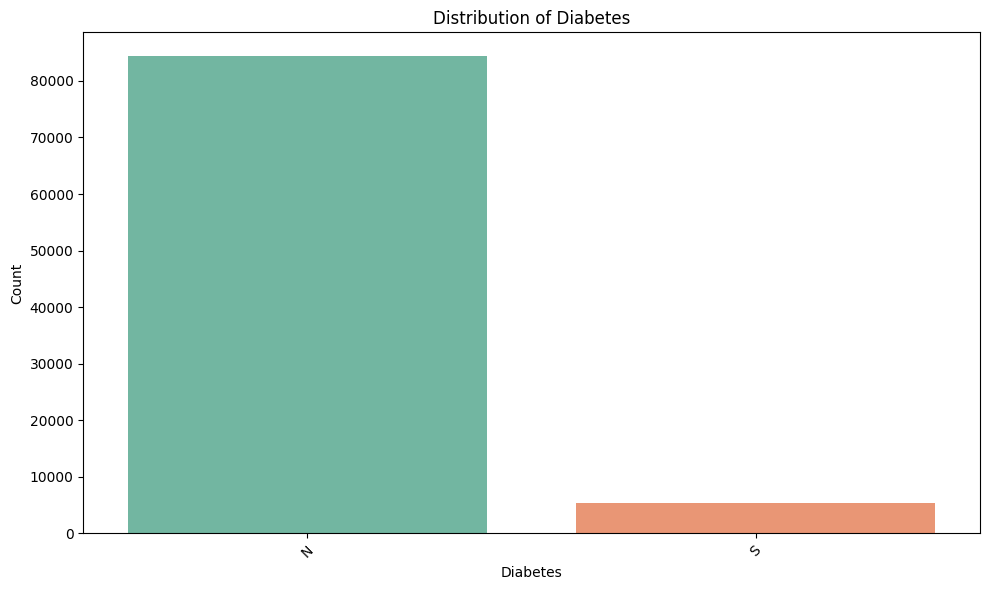

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


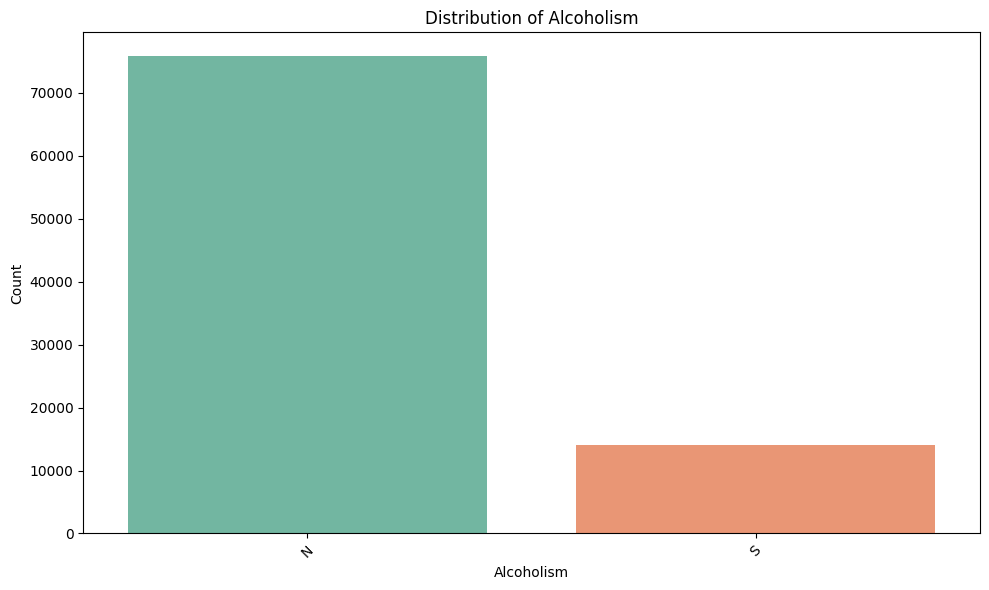

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


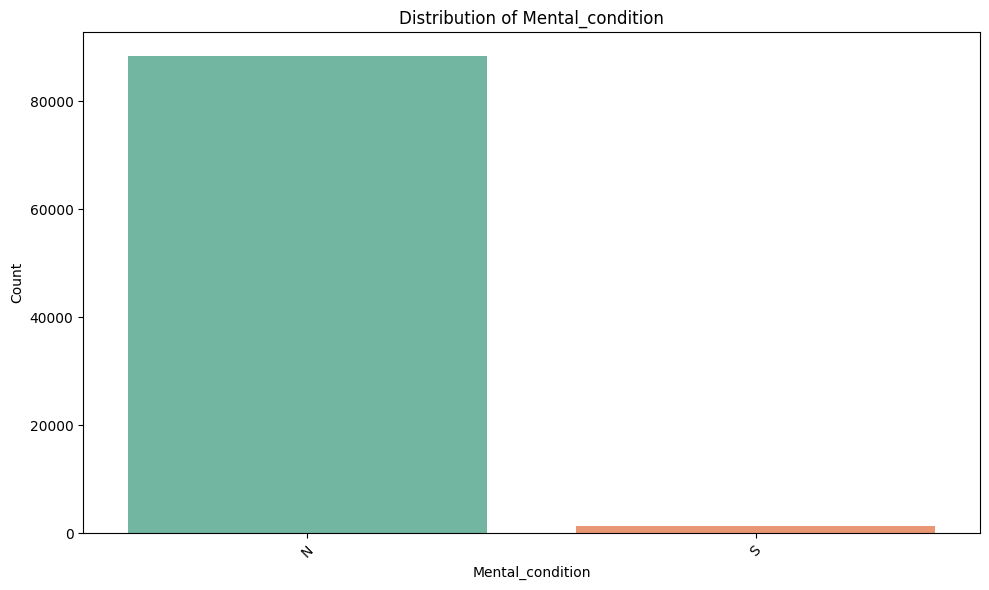

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


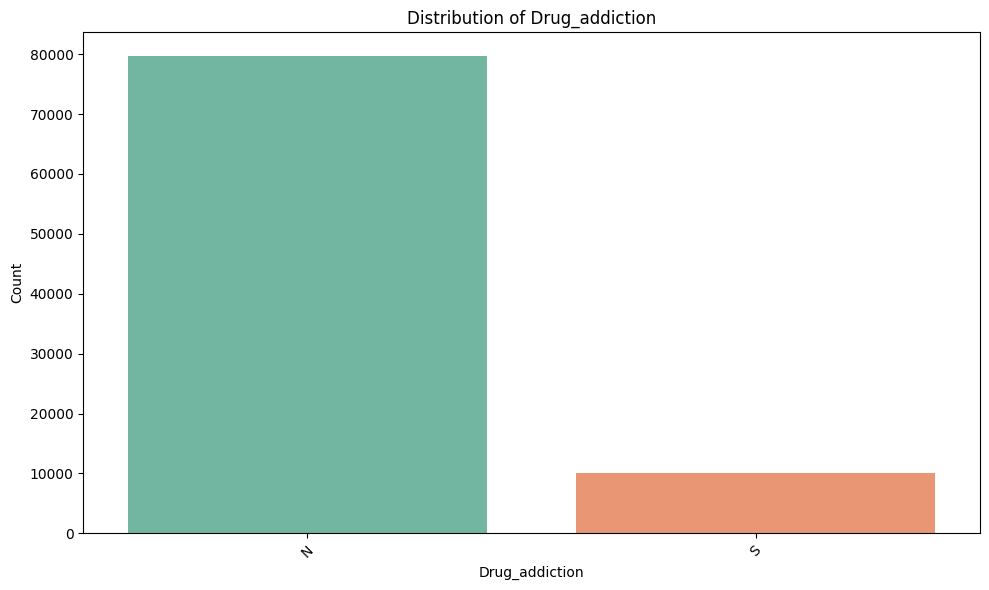

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


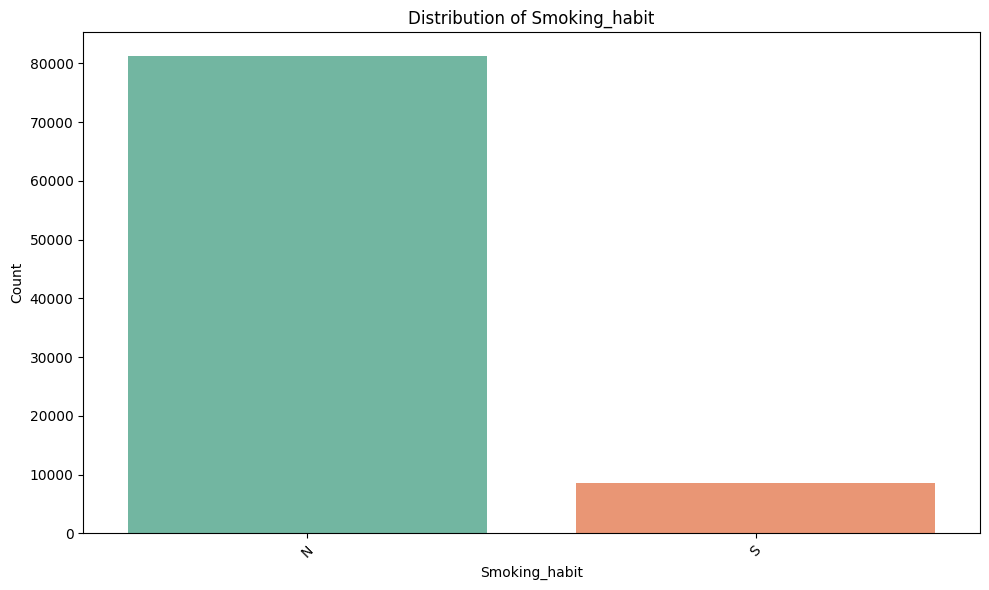

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


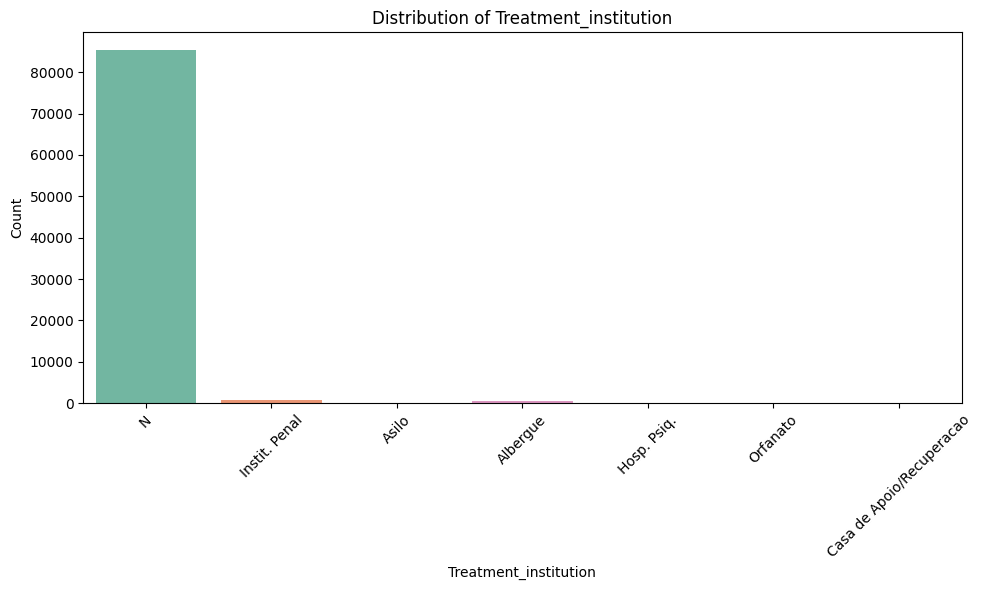

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


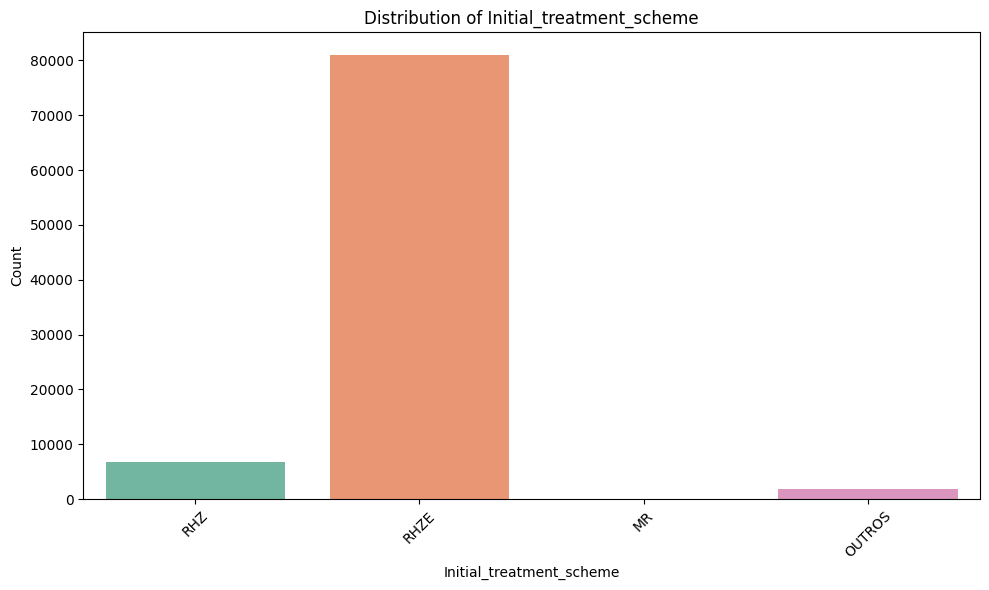

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


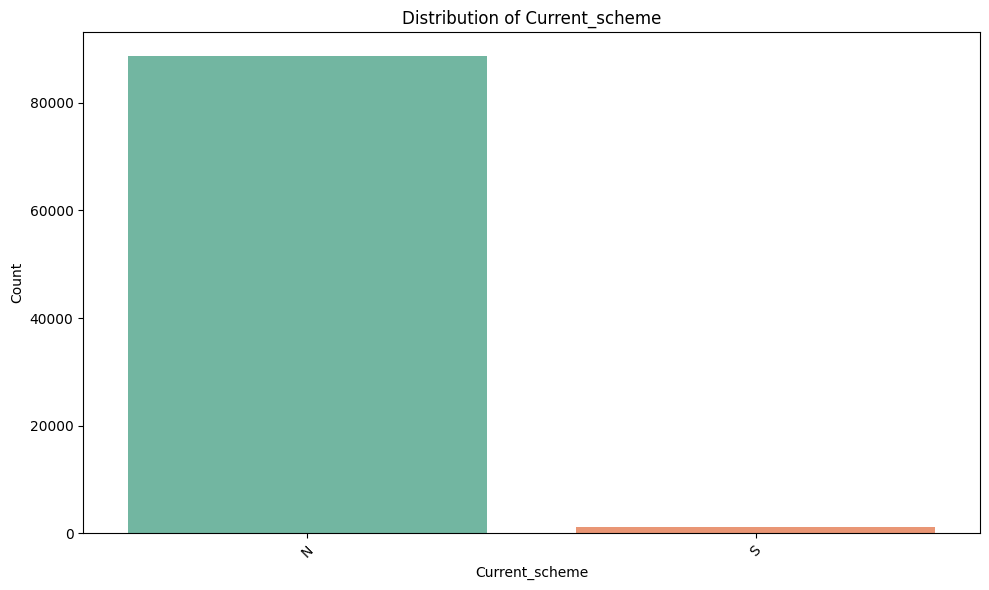

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


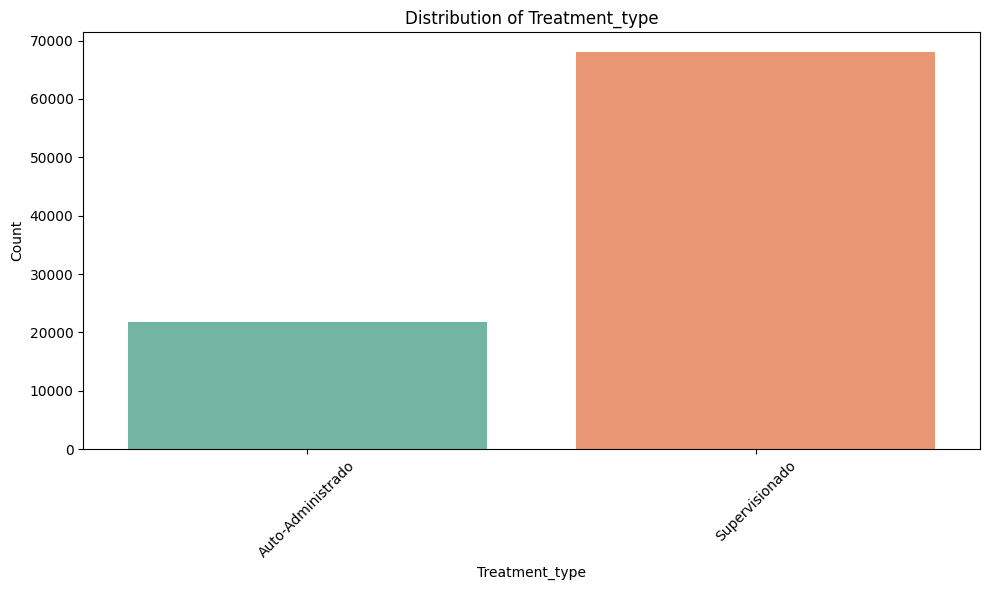

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


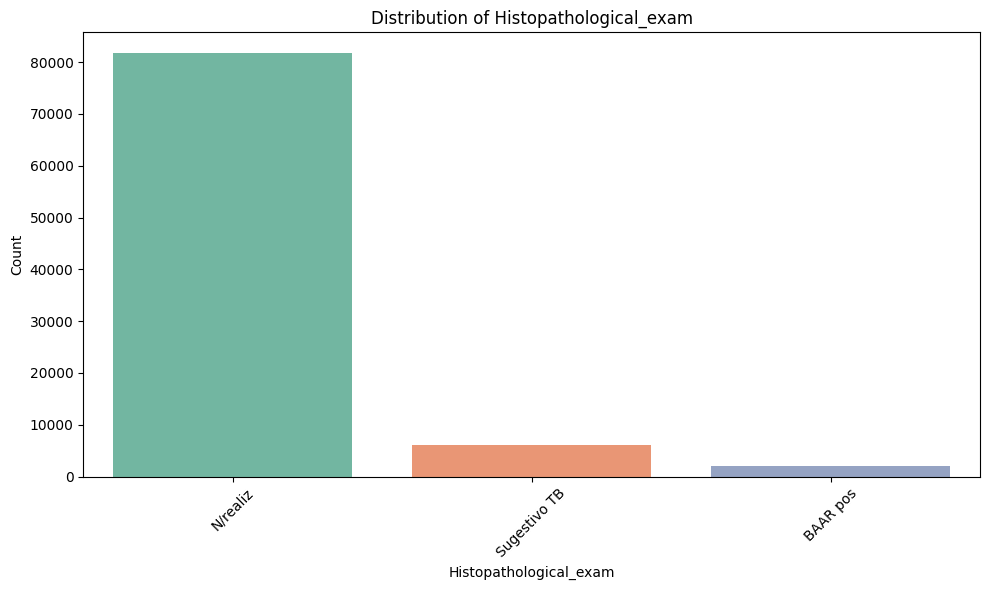

<ipython-input-55-345418c1f80e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x=col, palette='Set2')


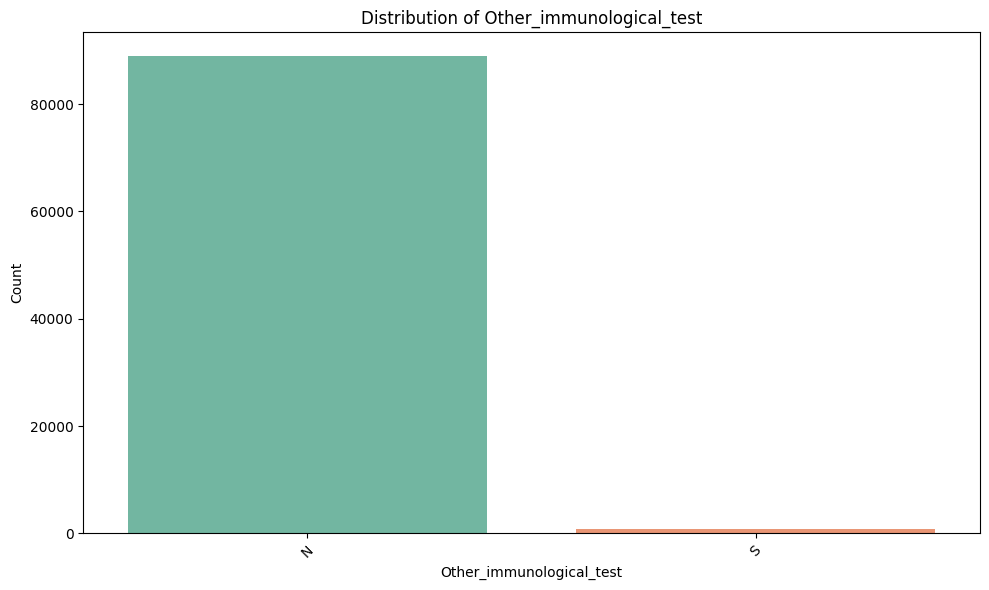

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Plot distribution for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data_cleaned, x=col, palette='Set2')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

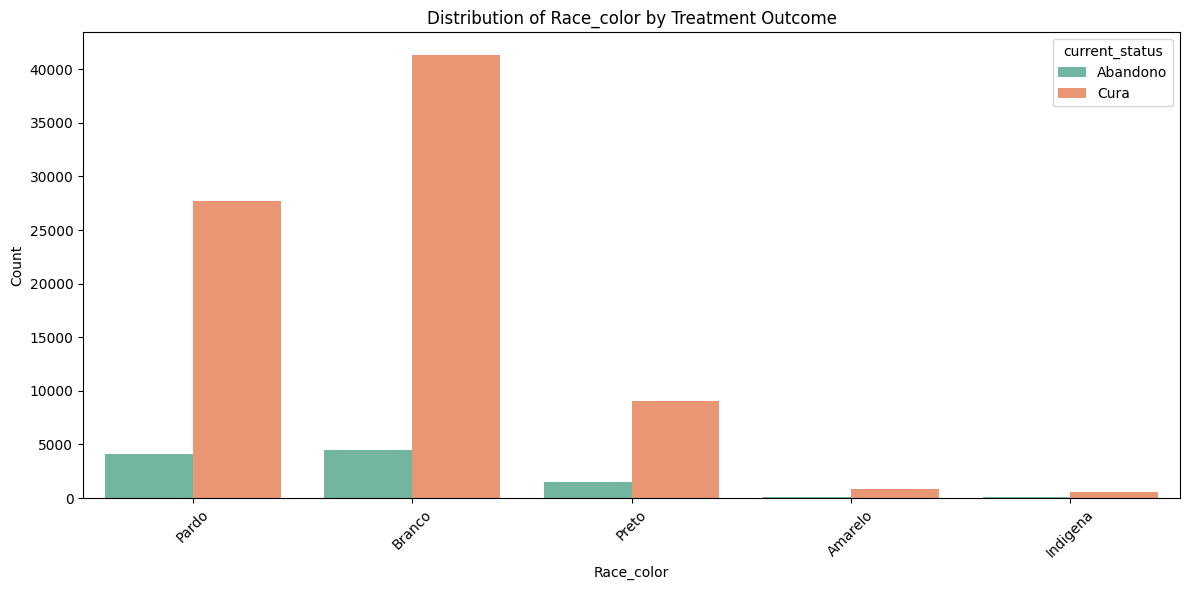

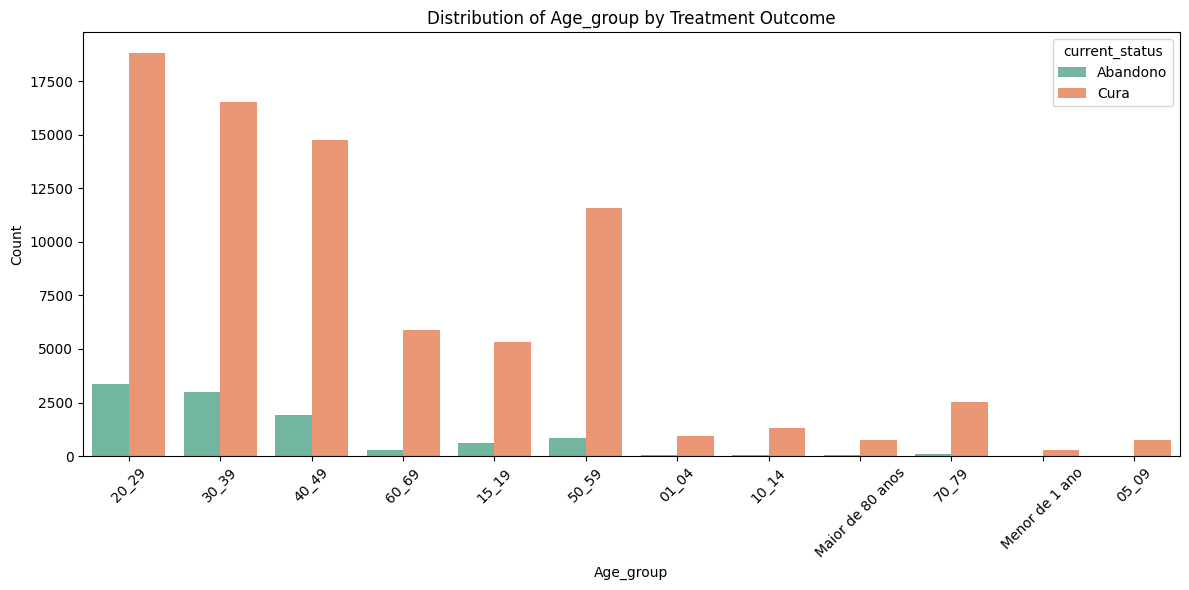

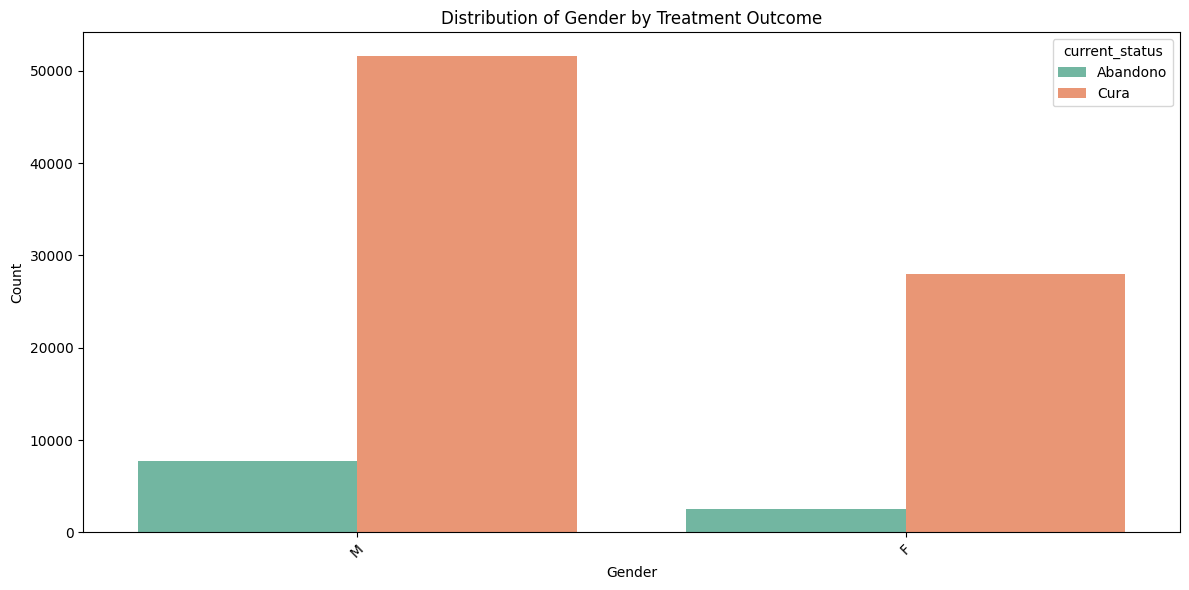

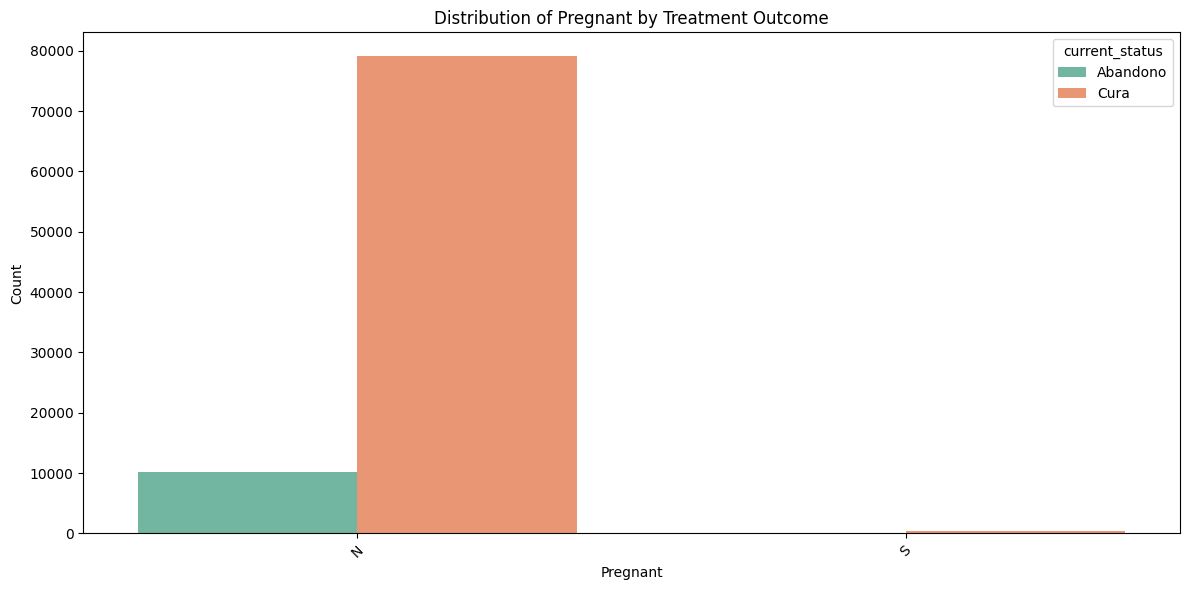

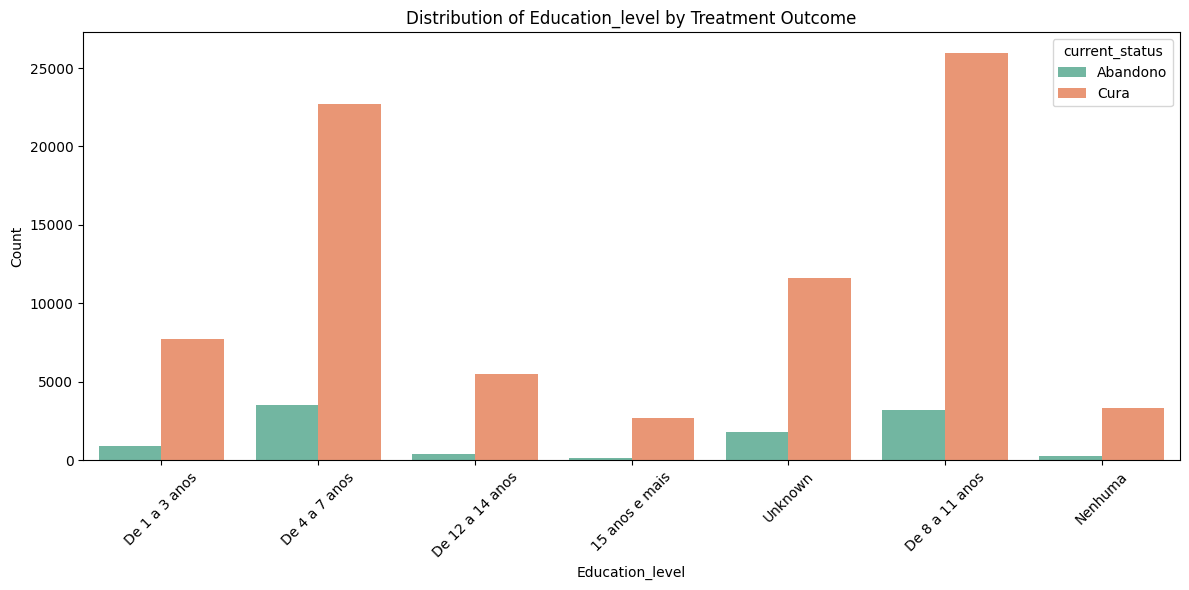

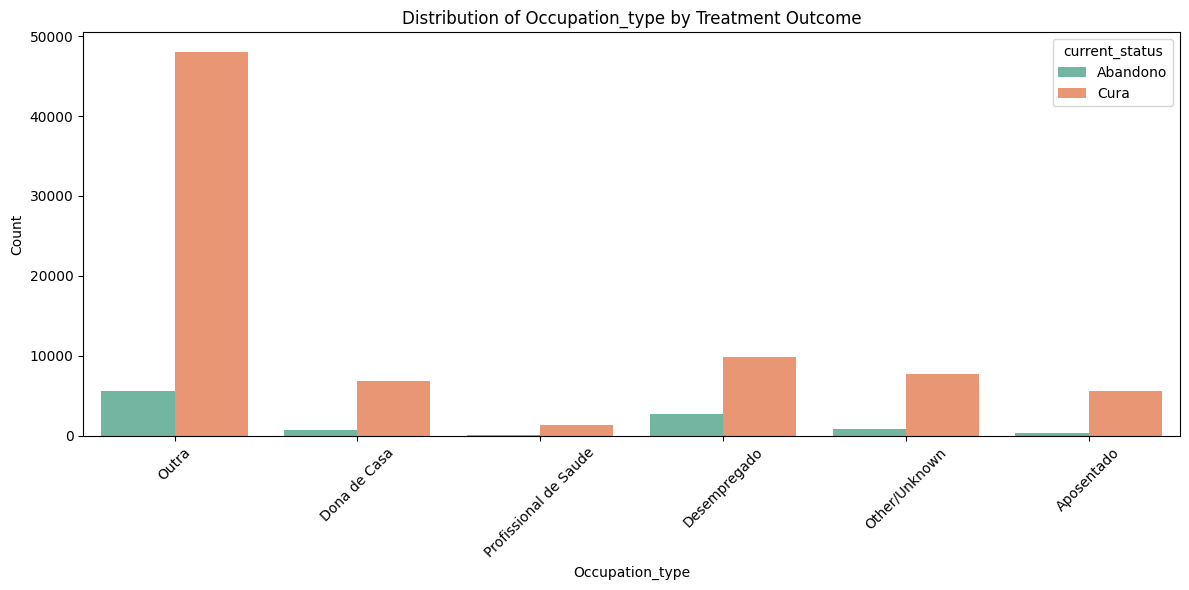

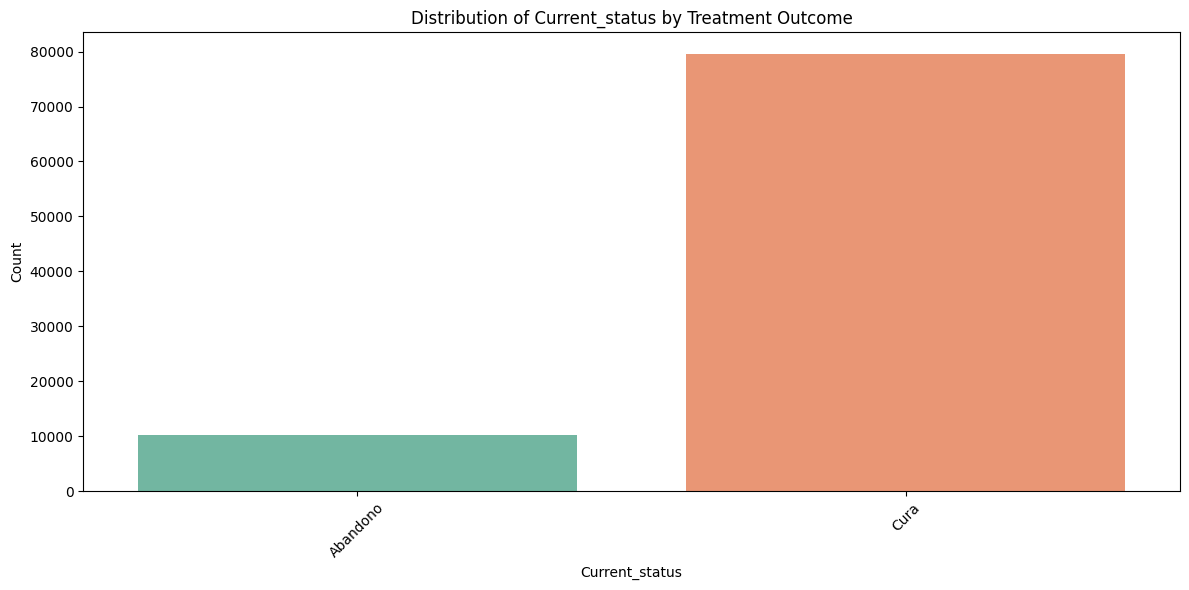

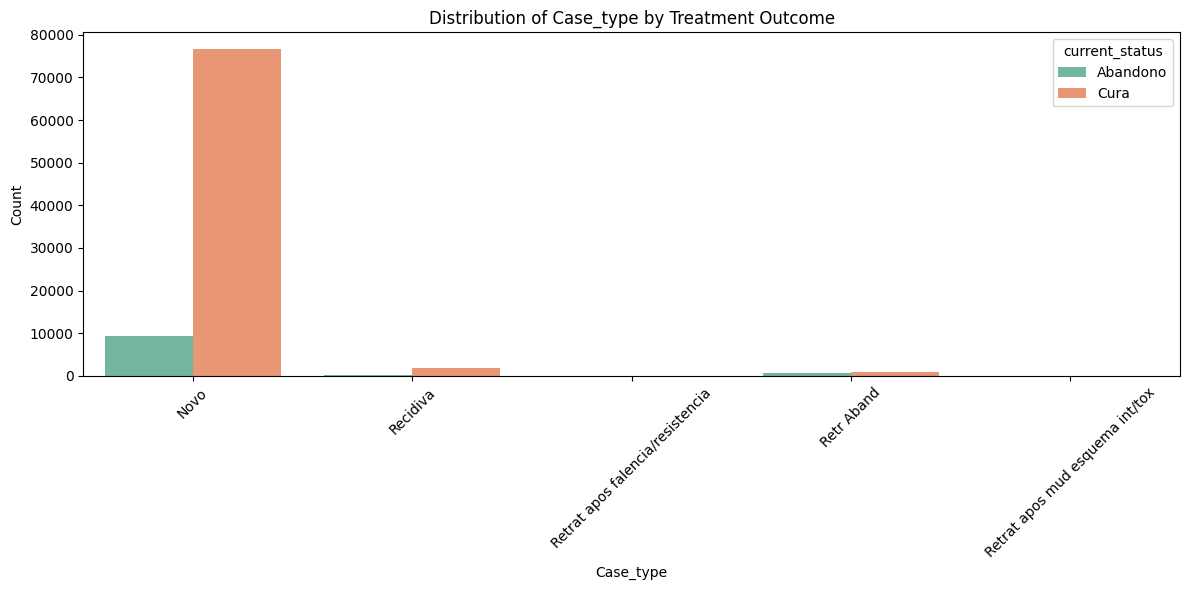

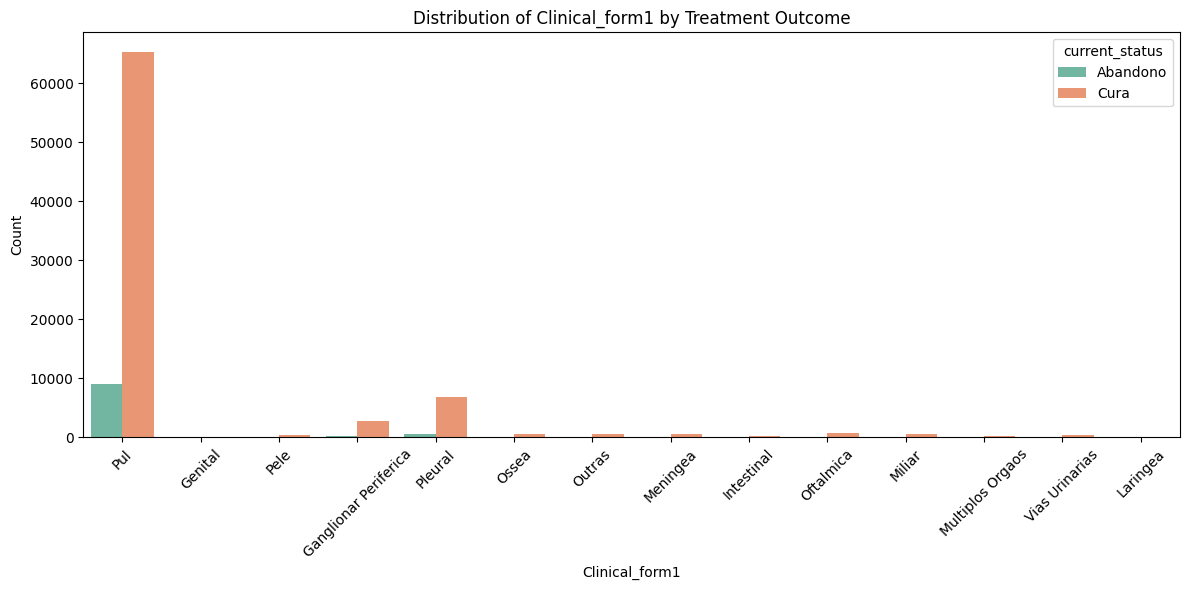

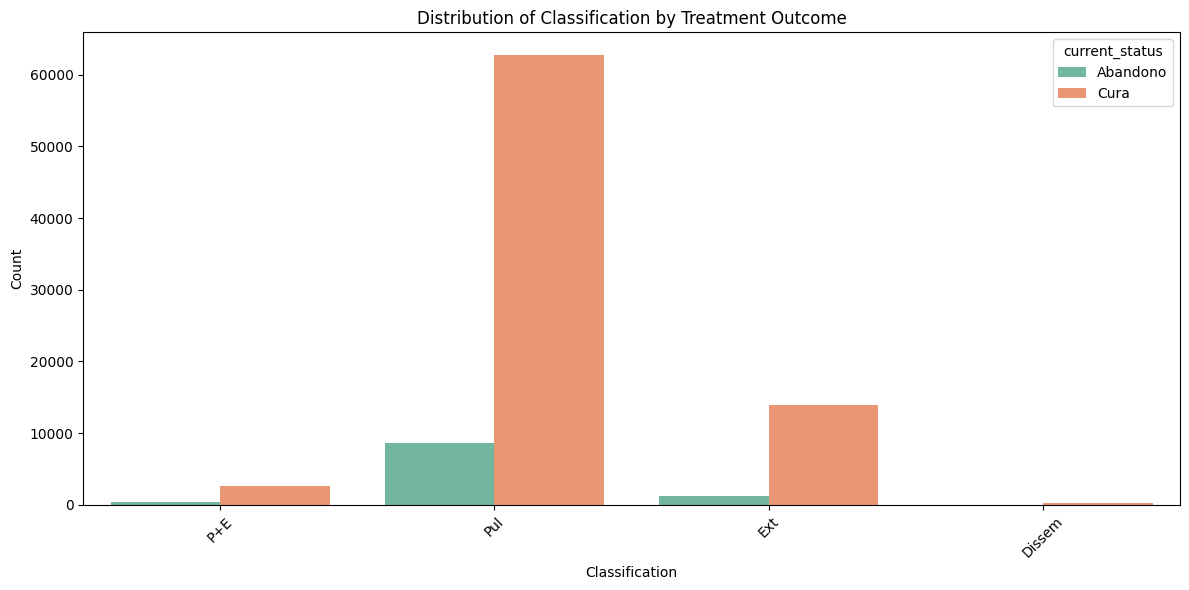

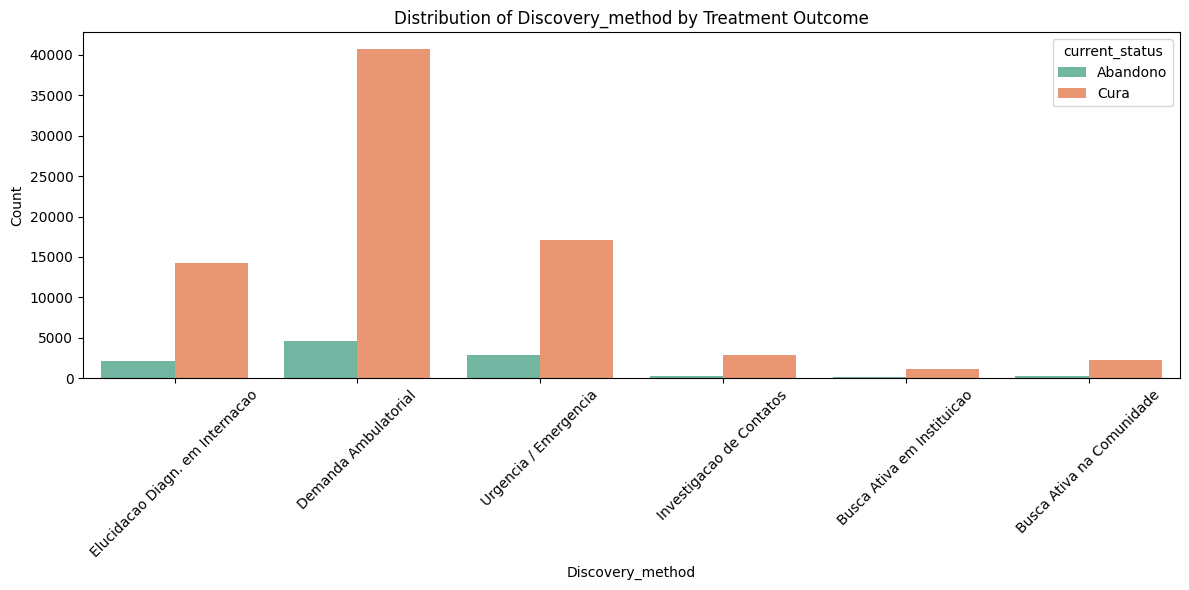

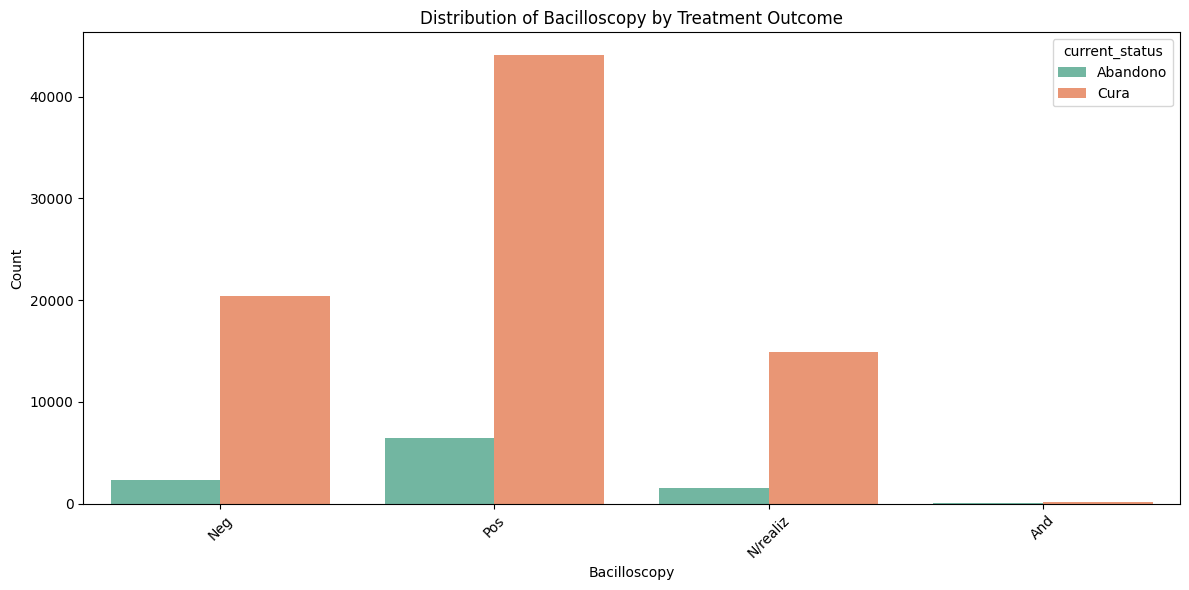

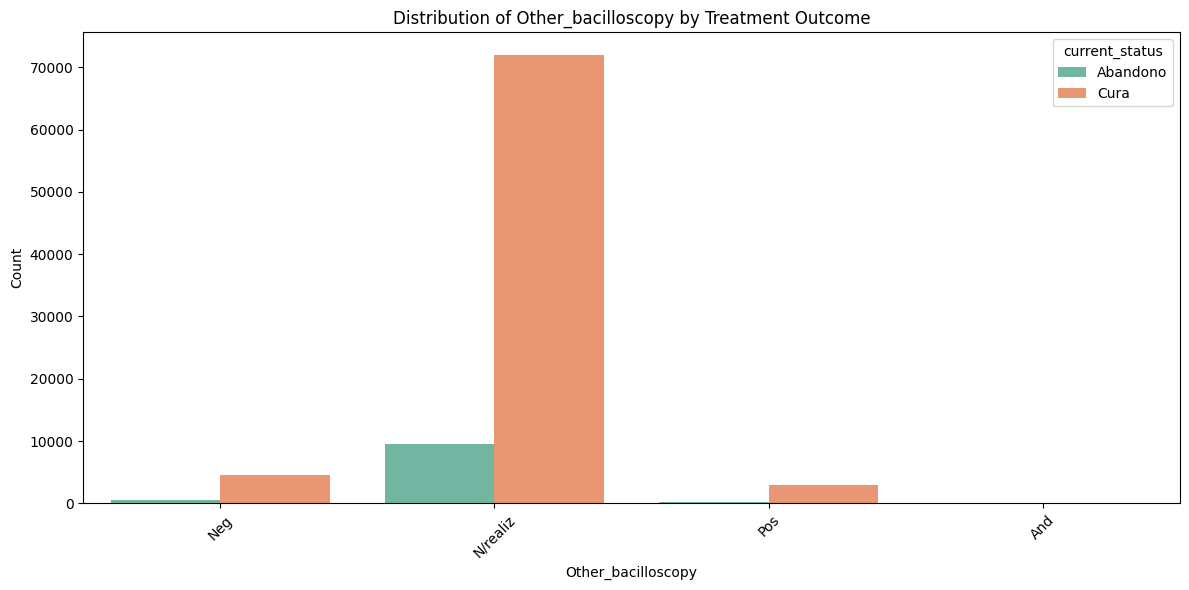

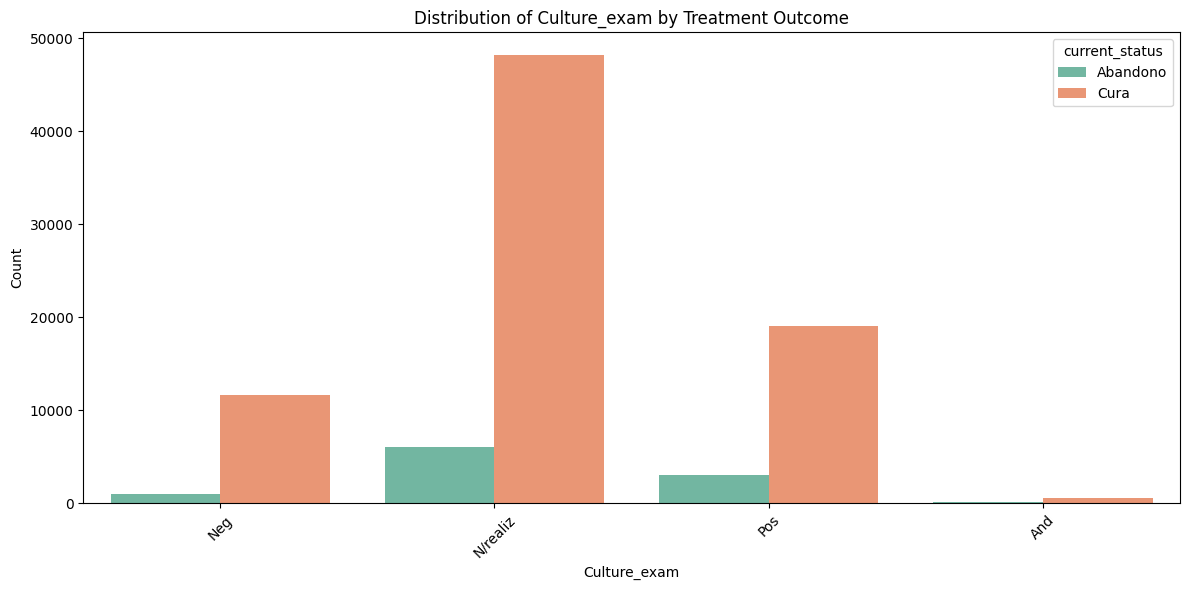

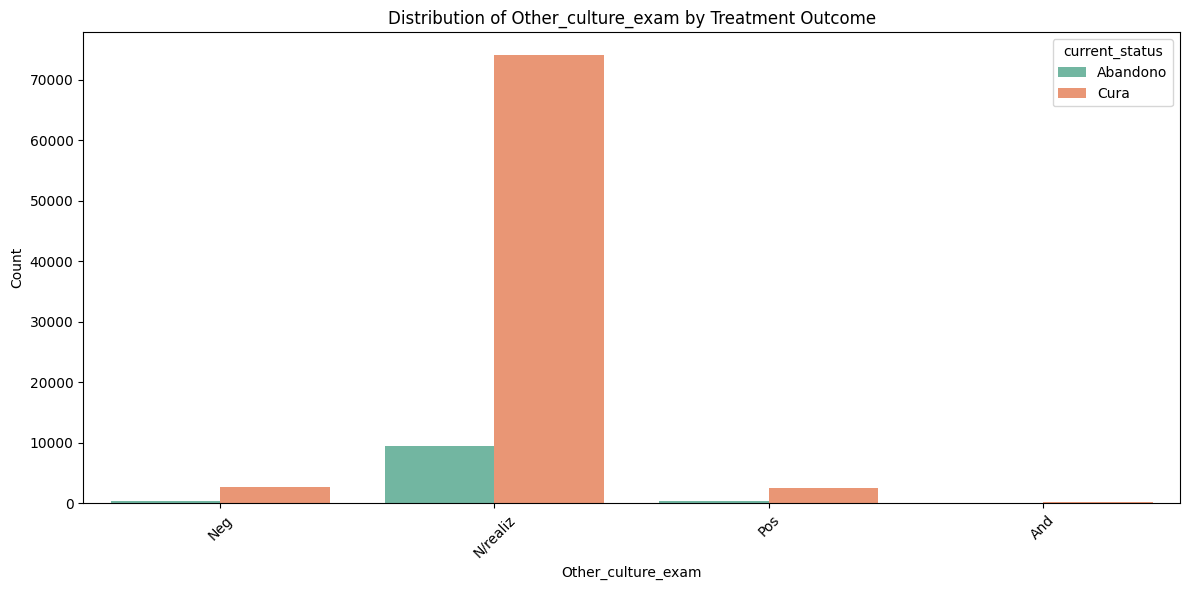

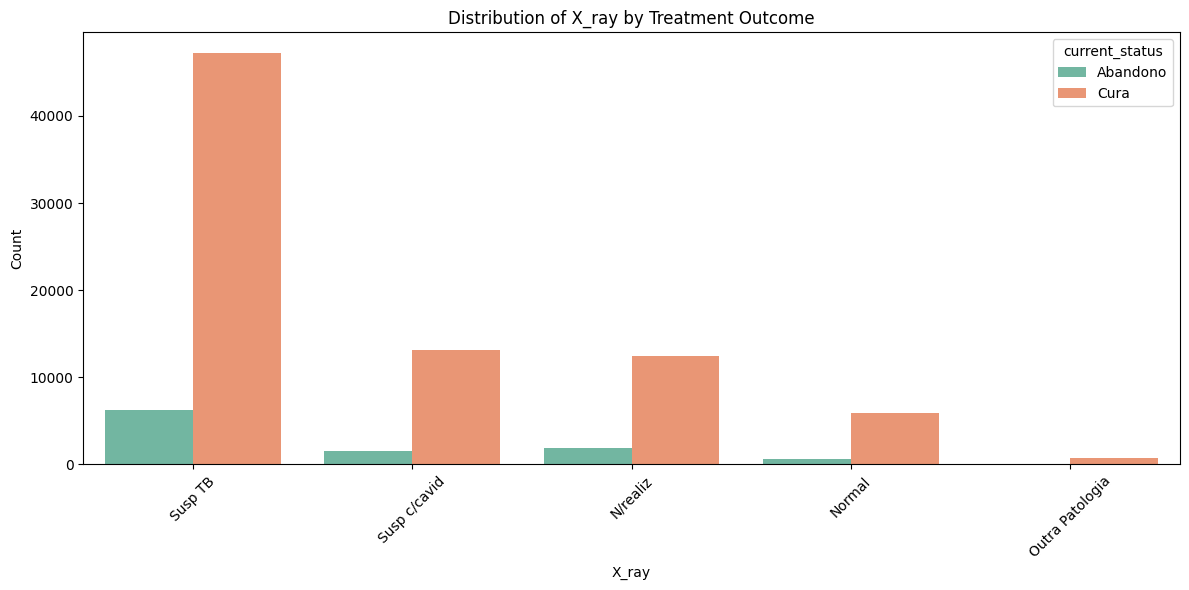

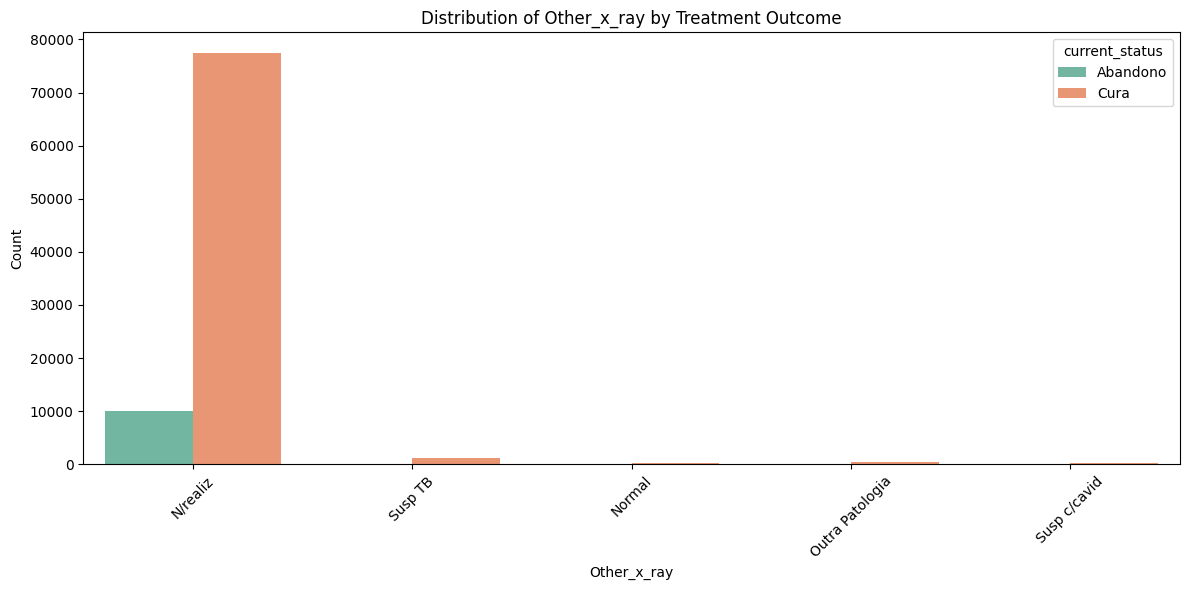

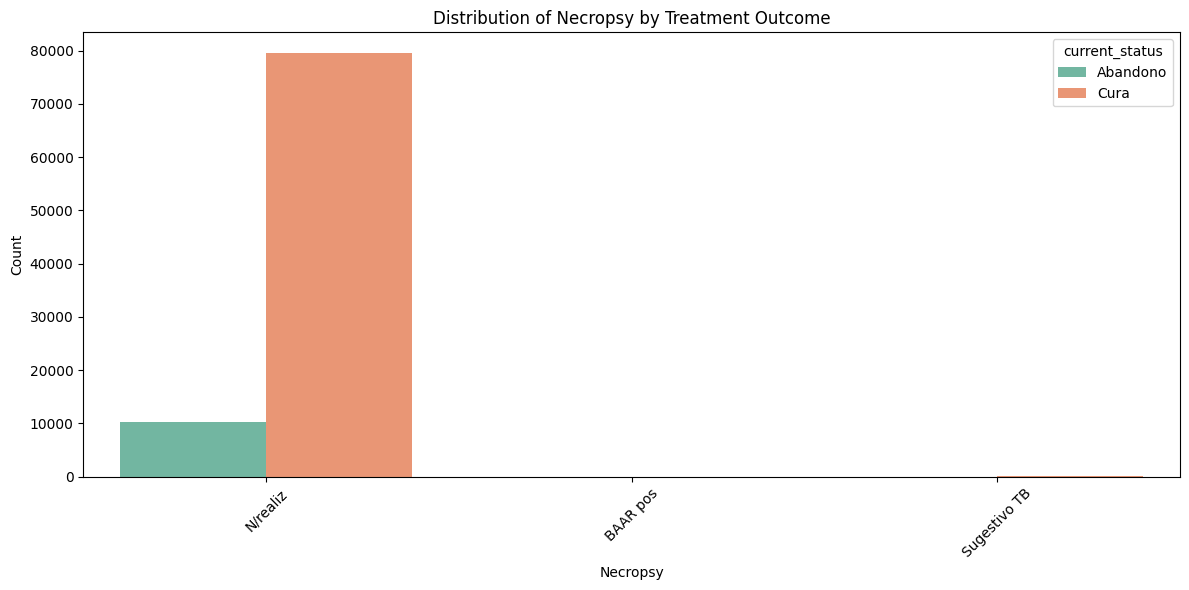

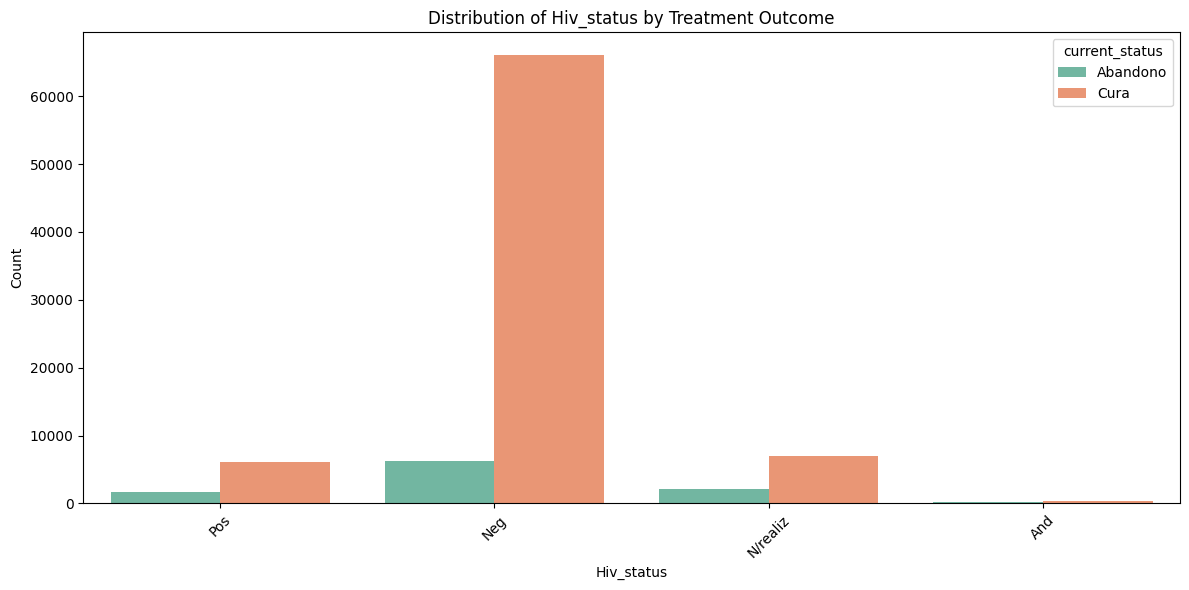

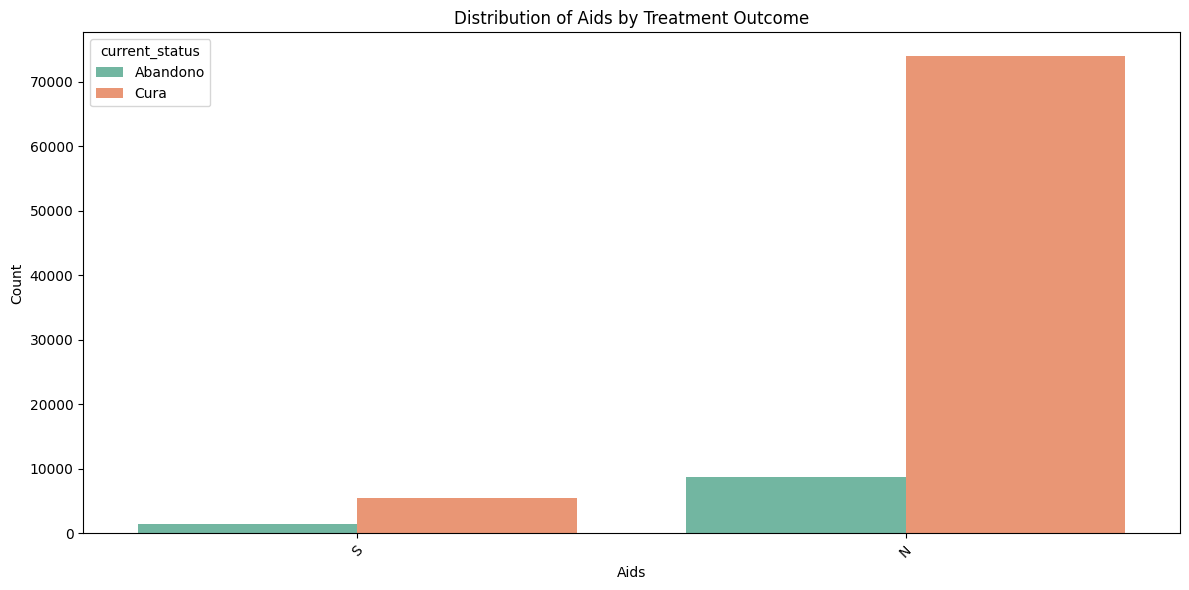

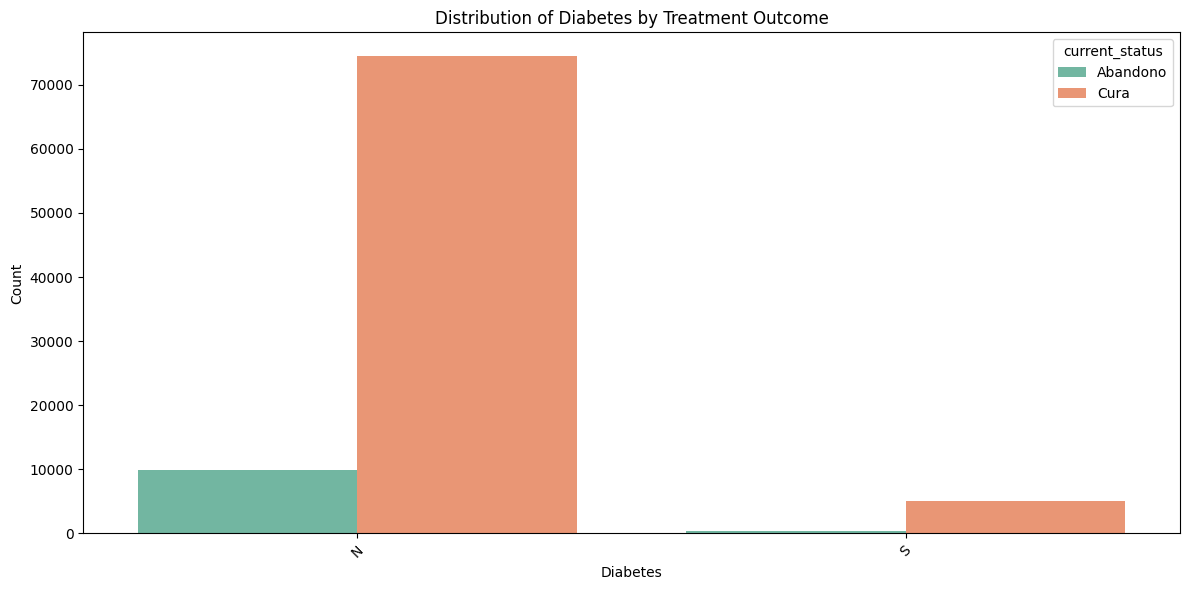

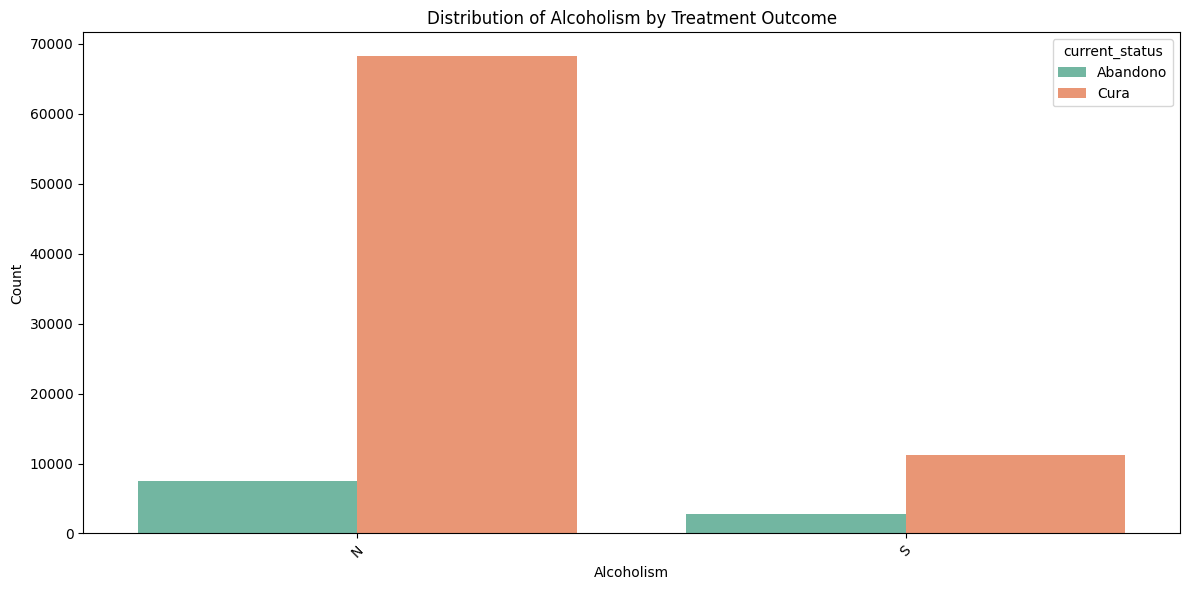

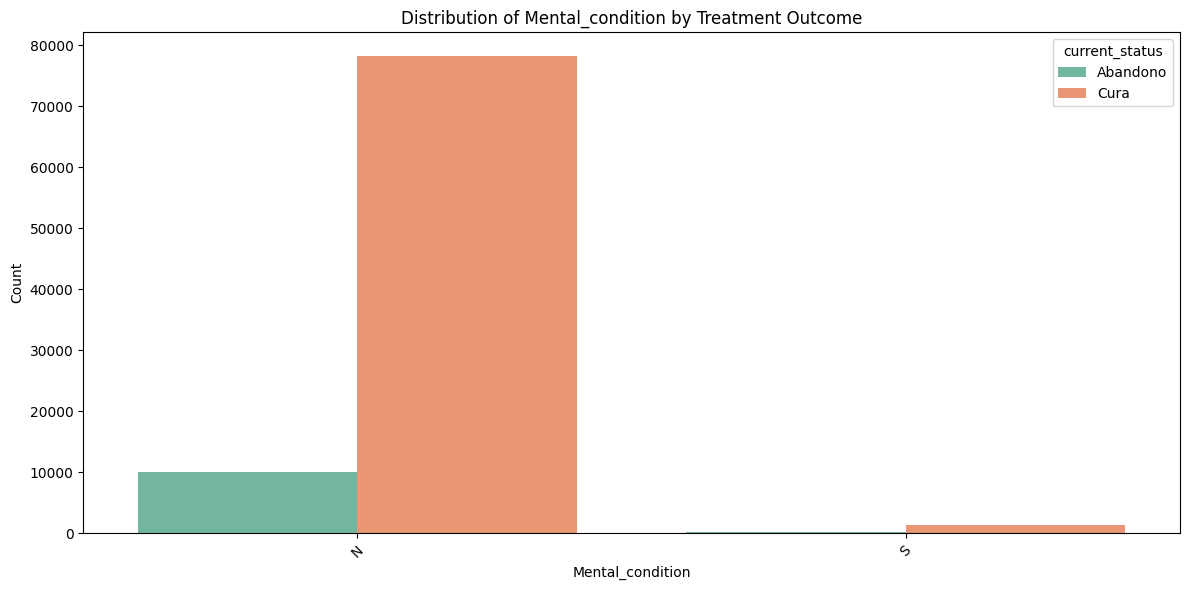

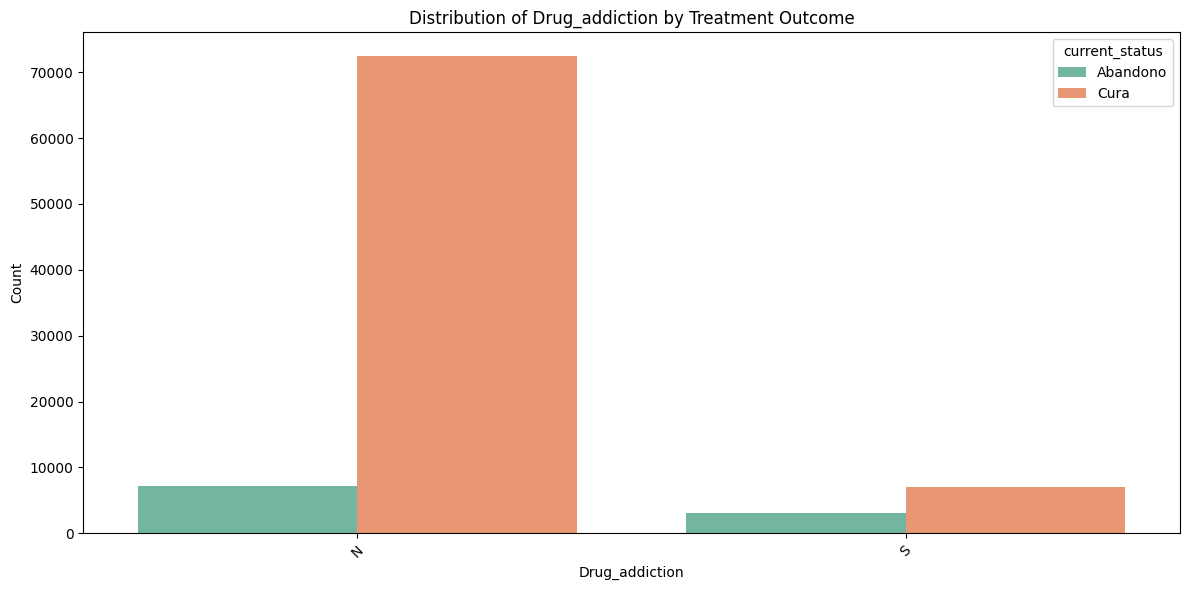

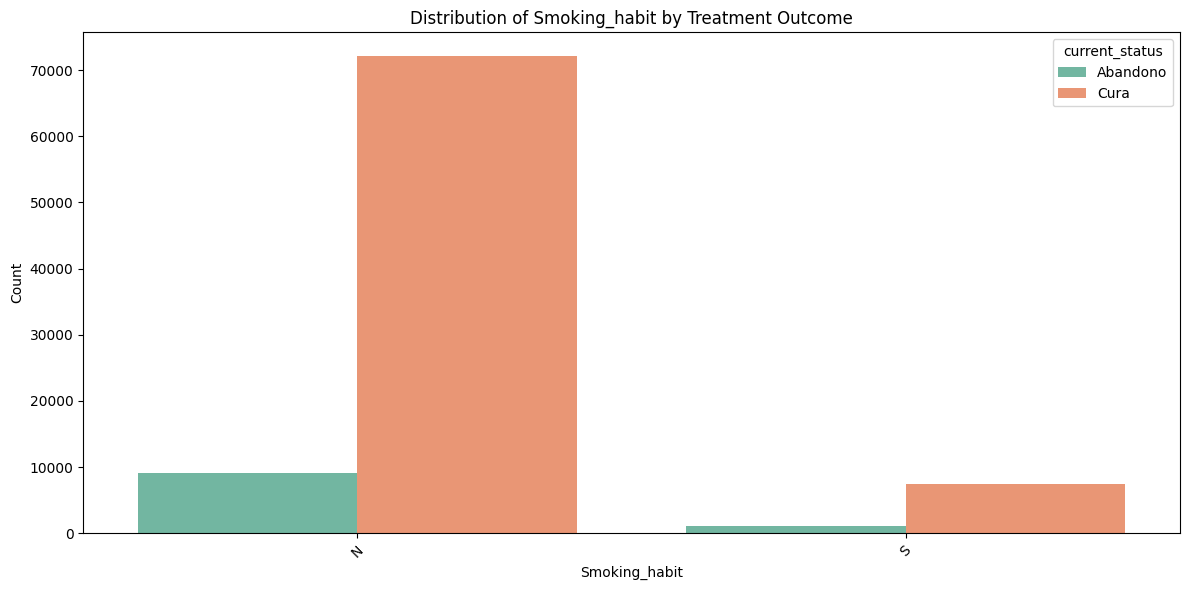

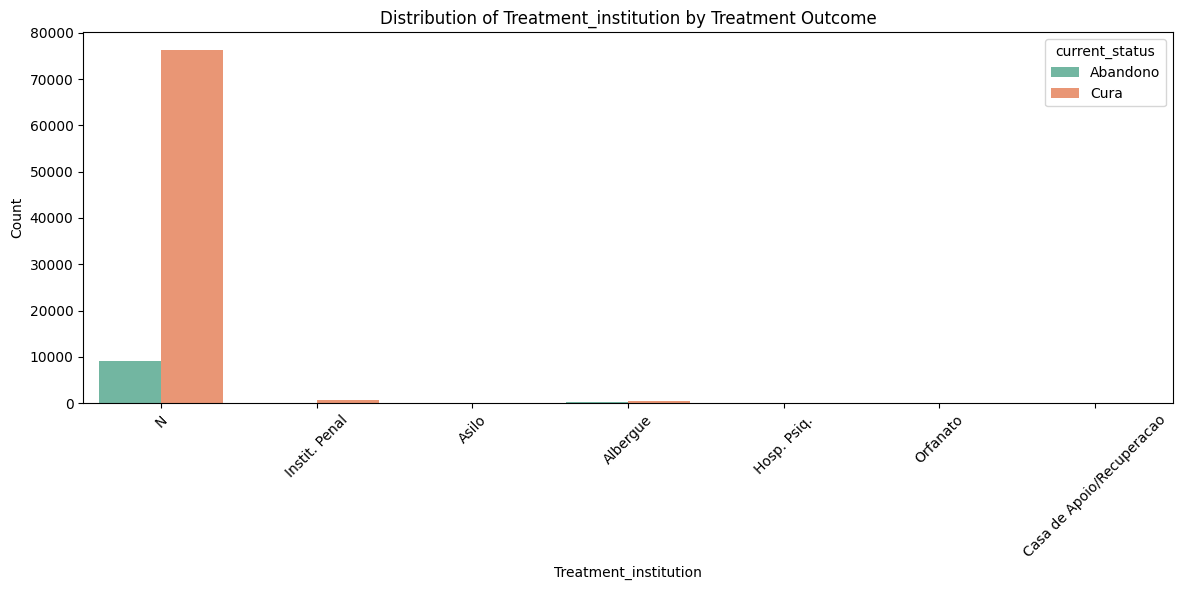

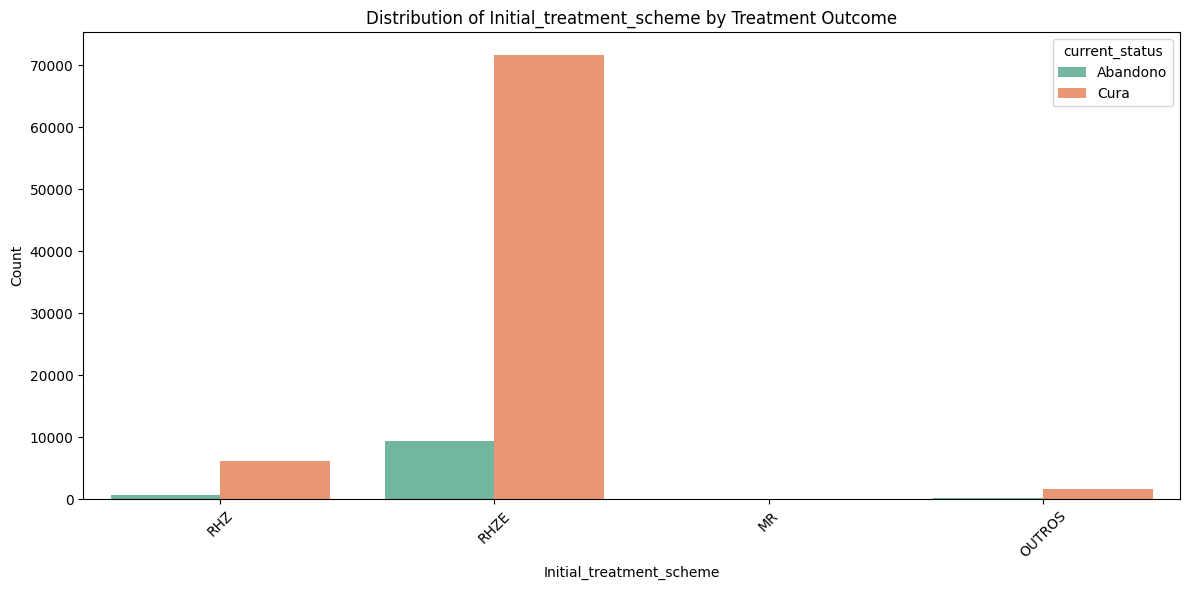

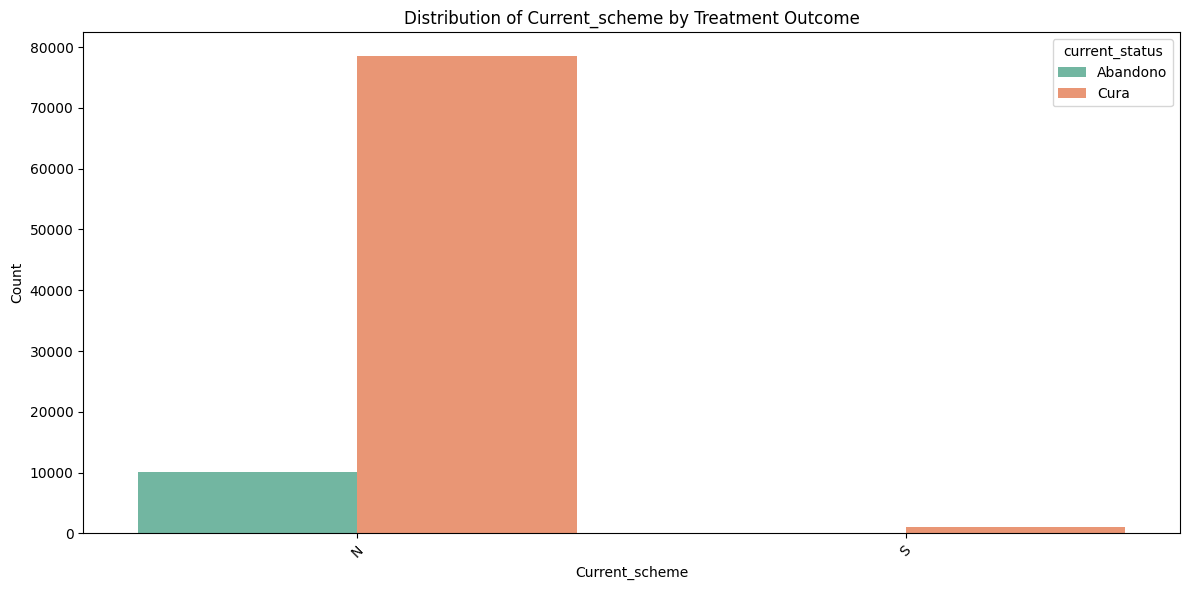

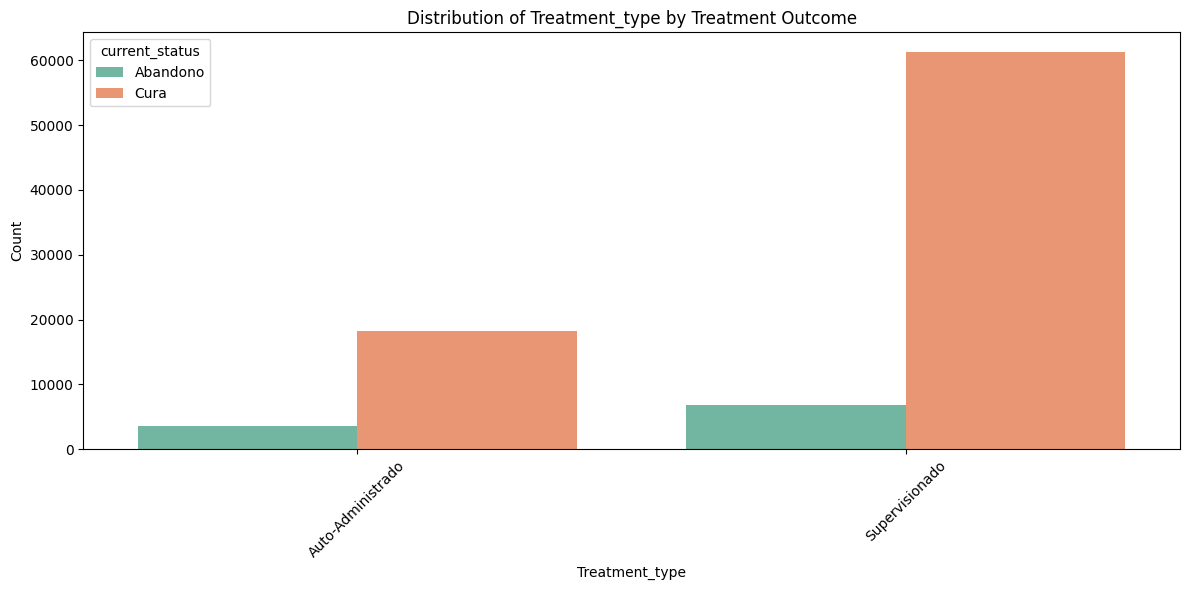

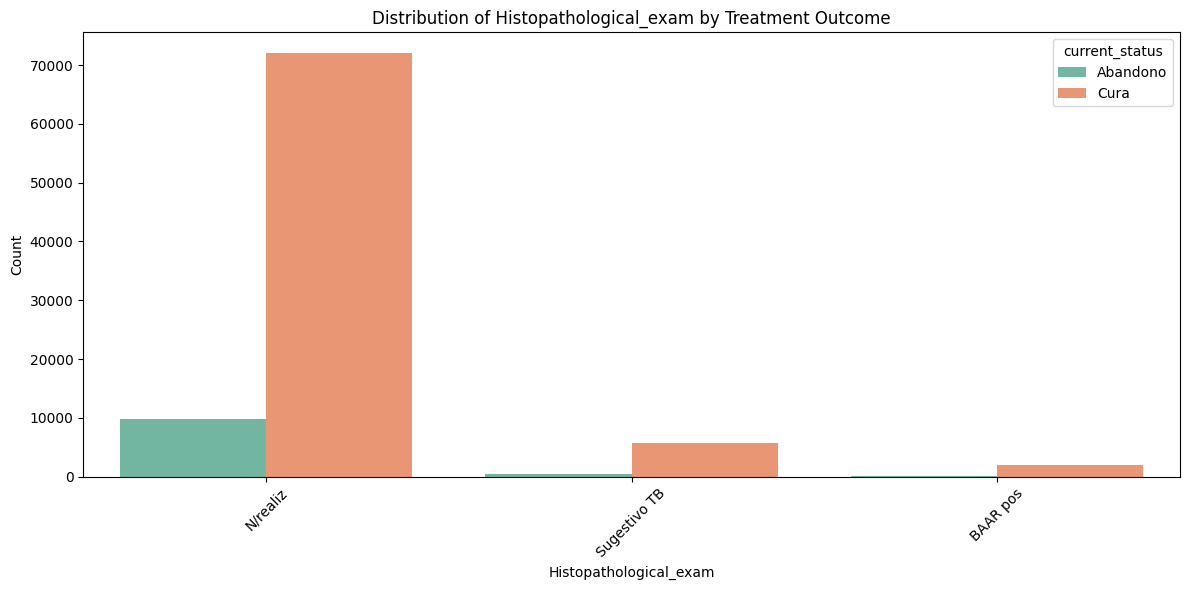

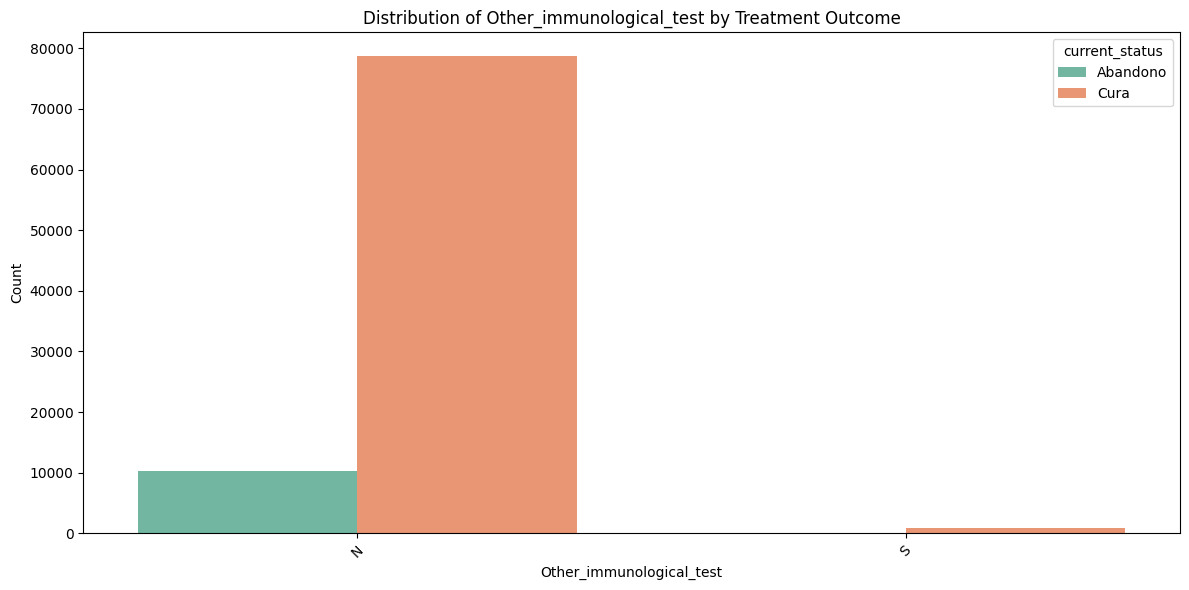

In [ ]:
# Plot distribution for each categorical variable by target group
data_loaded = data_cleaned

# Identify categorical columns
categorical_columns = data_loaded.select_dtypes(include=['object']).columns

# Plot distribution for each categorical variable by target group
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_loaded, x=col, hue='current_status', palette='Set2')
    plt.title(f'Distribution of {col.capitalize()} by Treatment Outcome')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


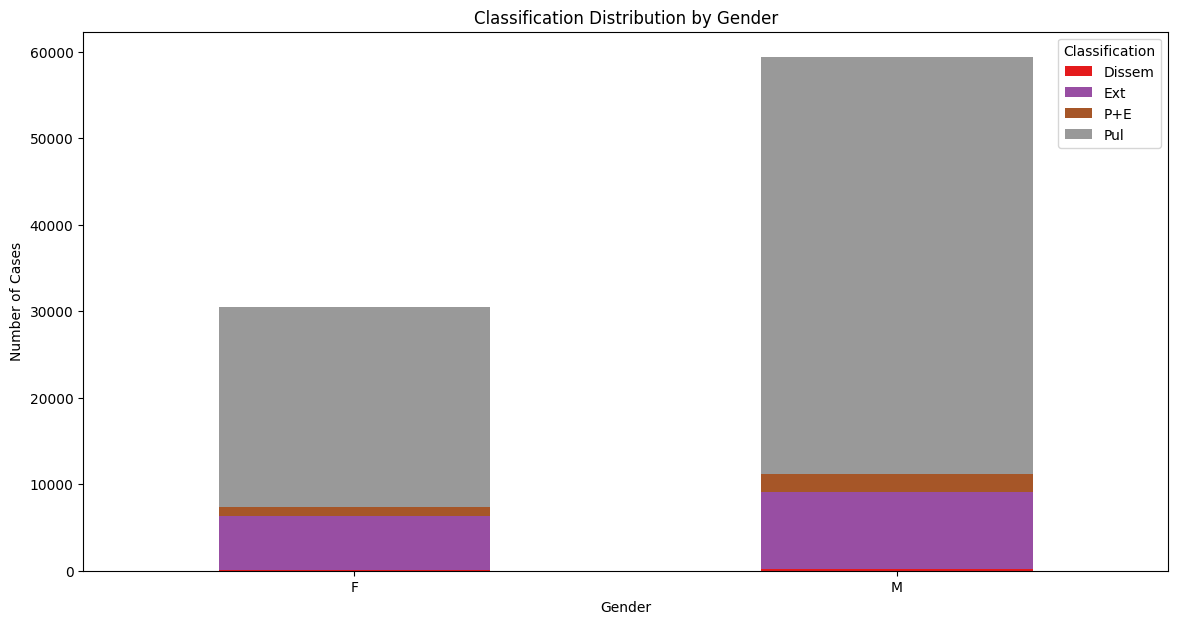

classification  Dissem   Ext   P+E    Pul
gender                                   
F                   88  6290   939  23171
M                  156  8899  2089  48179

In [ ]:
# Analyze classification distribution by gender
classification_gender_counts = data_cleaned.groupby(['gender', 'classification']).size().unstack()

# Plot the distribution of classification by gender
classification_gender_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set1')
plt.title('Classification Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(title='Classification')
plt.show()

# Display the counts in a table format
classification_gender_counts

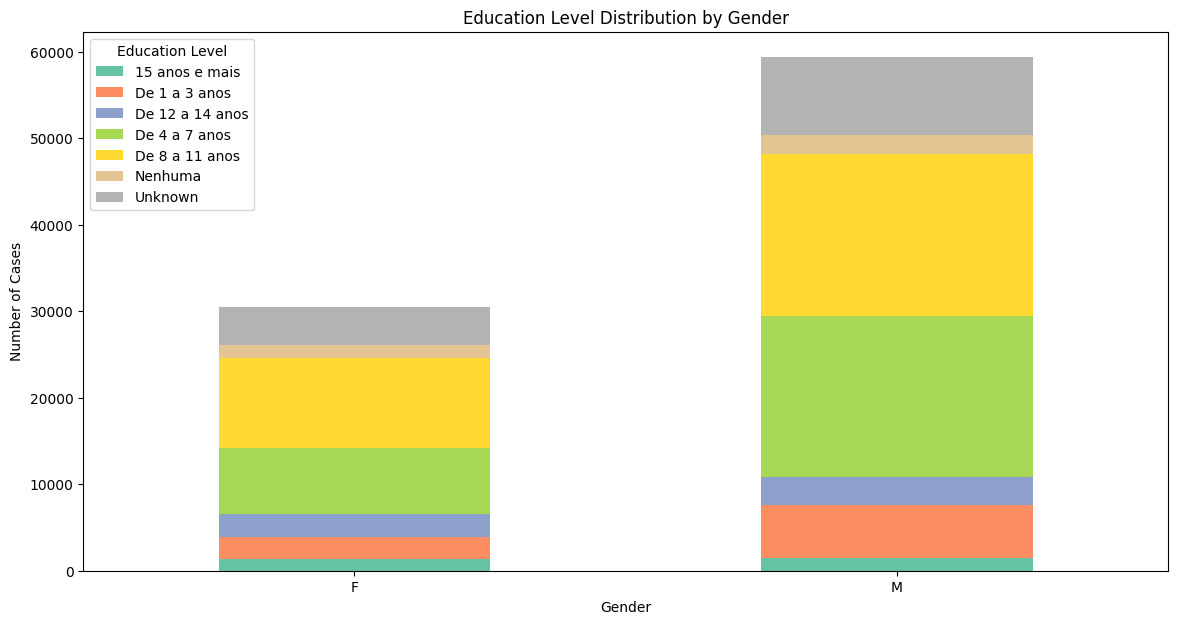

education_level  15 anos e mais  De 1 a 3 anos  De 12 a 14 anos  \
gender                                                            
F                          1391           2549             2614   
M                          1460           6095             3303   

education_level  De 4 a 7 anos  De 8 a 11 anos  Nenhuma  Unknown  
gender                                                            
F                         7653           10394     1432     4455  
M                        18564           18779     2137     8985

In [ ]:
# Analyze the relationship between gender and education level
gender_education_counts = data_cleaned.groupby(['gender', 'education_level']).size().unstack()

# Plot the distribution of education levels by gender
gender_education_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')
plt.title('Education Level Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.legend(title='Education Level')
plt.show()

# Display the counts in a table format
gender_education_counts

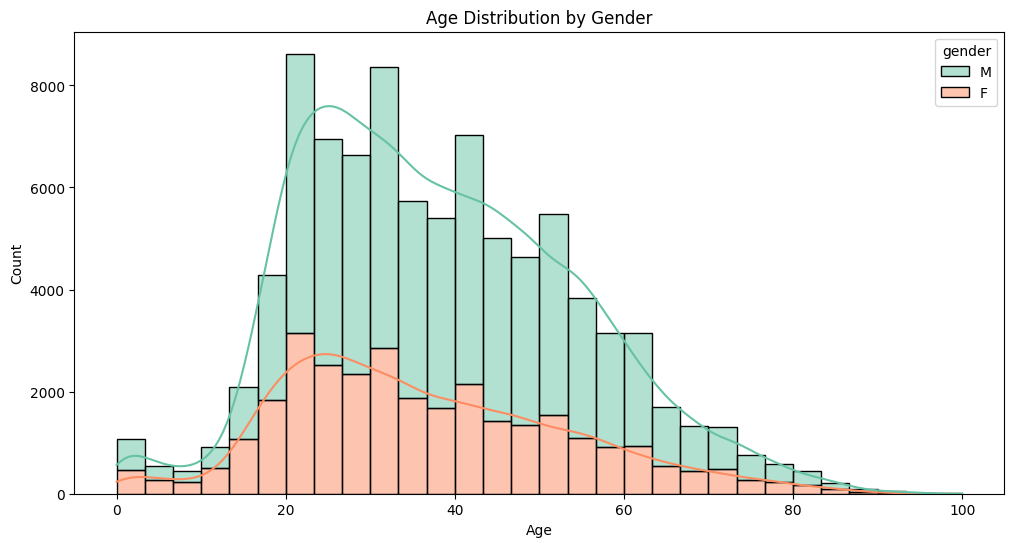

count       mean        std  min   25%   50%   75%    max
gender                                                             
F       30488.0  36.327768  17.020649  0.0  24.0  33.0  48.0  100.0
M       59323.0  38.853362  15.880099  0.0  26.0  37.0  50.0  100.0

In [ ]:
# Plot the age distribution by gender
plt.figure(figsize=(12, 6))
sns.histplot(data=data_cleaned, x='age', hue='gender', kde=True, multiple='stack', bins=30, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Display basic statistics for age distribution by gender
age_distribution_gender_stats = data_cleaned.groupby('gender')['age'].describe()
age_distribution_gender_stats


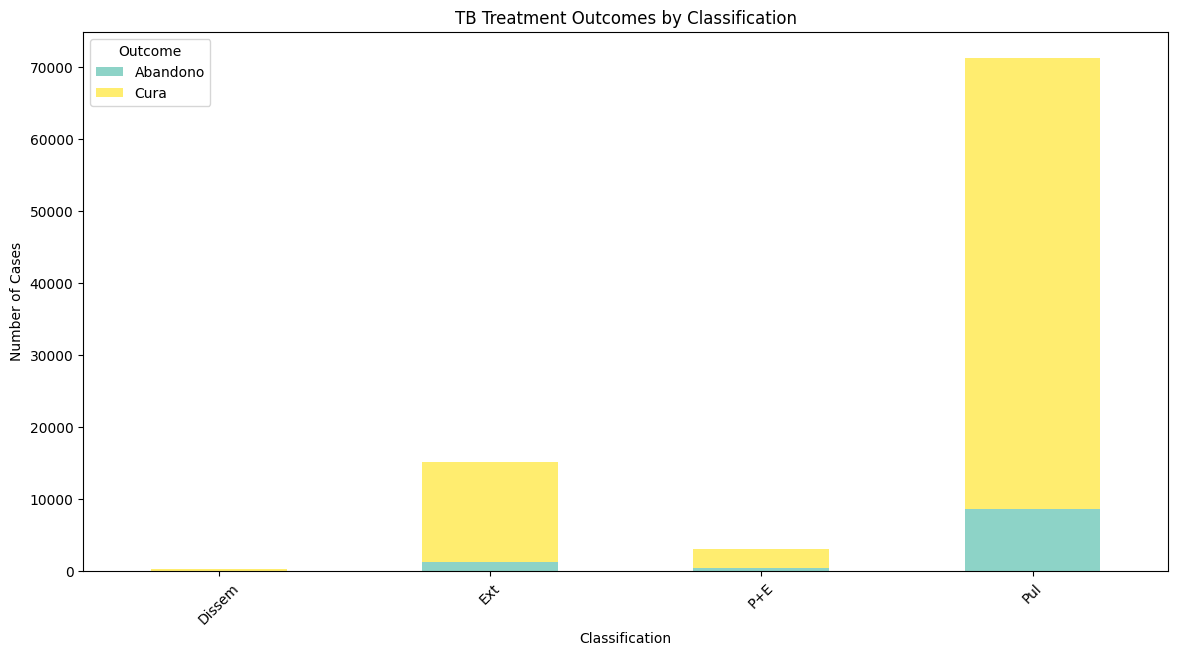

current_status  Abandono   Cura
classification                 
Dissem                40    204
Ext                 1230  13959
P+E                  422   2606
Pul                 8588  62762

In [ ]:
# Analyze treatment outcomes by classification type
classification_outcome_counts = data_cleaned.groupby(['classification', 'current_status']).size().unstack()

# Plot the distribution of outcomes by classification type
classification_outcome_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')
plt.title('TB Treatment Outcomes by Classification')
plt.xlabel('Classification')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.show()

# Display the counts in a table format
classification_outcome_counts

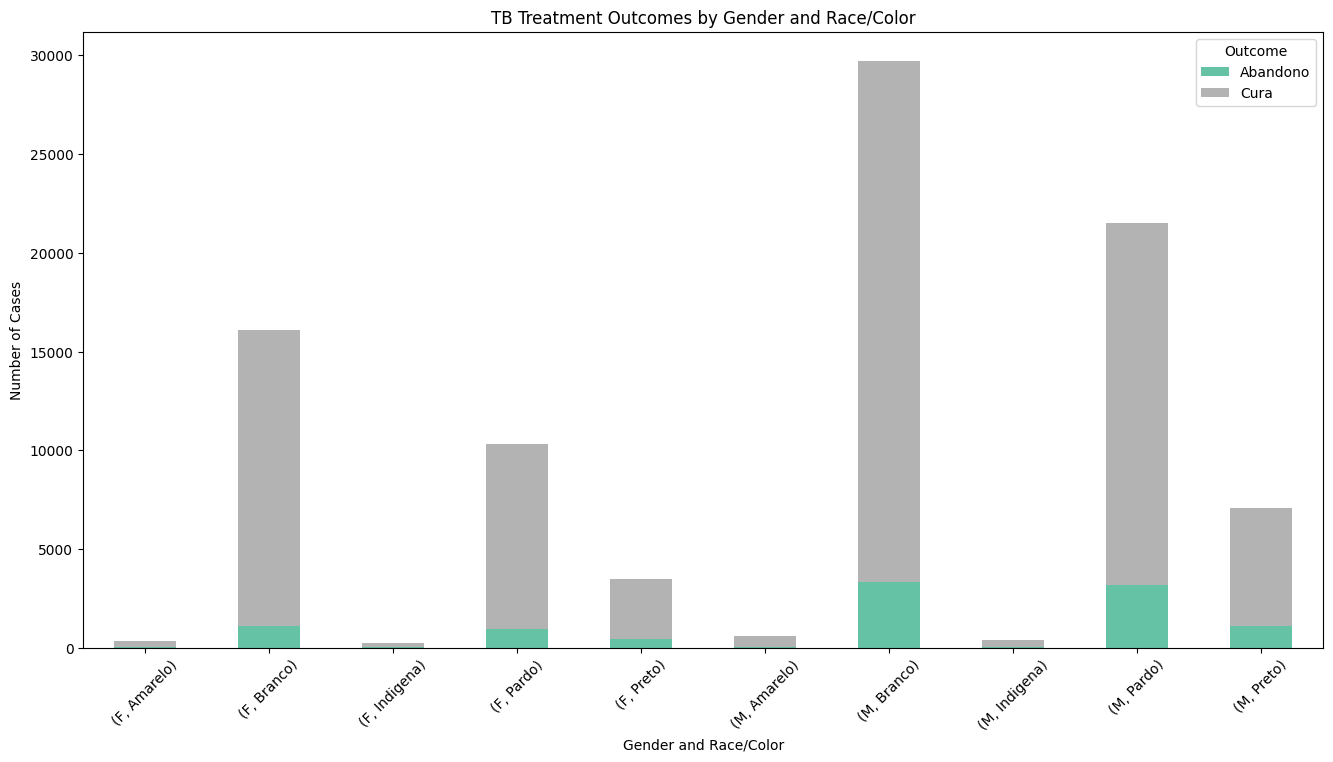

current_status     Abandono   Cura
gender race_color                 
F      Amarelo           21    314
       Branco          1085  15026
       Indigena          29    206
       Pardo            971   9364
       Preto            429   3043
M      Amarelo           53    566
       Branco          3360  26346
       Indigena          48    335
       Pardo           3183  18351
       Preto           1101   5980

In [ ]:
# Analyze treatment outcomes by gender and race/color
gender_race_outcome_counts = data_cleaned.groupby(['gender', 'race_color', 'current_status']).size().unstack()

# Plot the distribution of outcomes by gender and race/color
gender_race_outcome_counts.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='Set2')
plt.title('TB Treatment Outcomes by Gender and Race/Color')
plt.xlabel('Gender and Race/Color')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.show()

# Display the counts in a table format
gender_race_outcome_counts

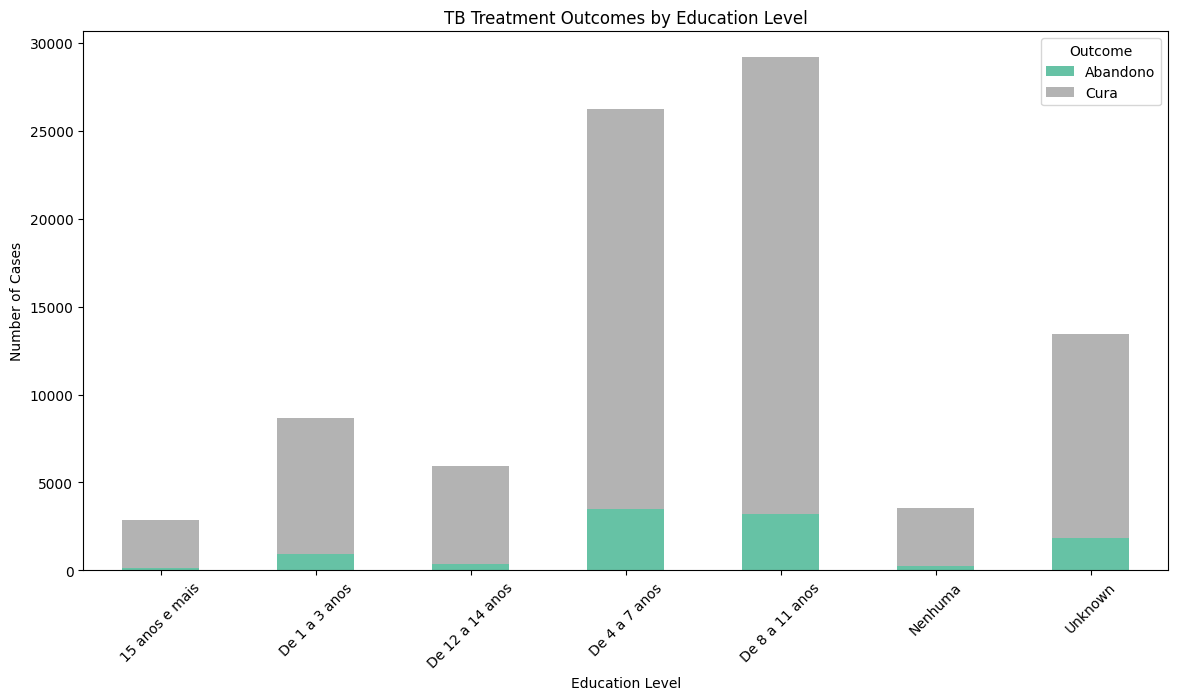

current_status   Abandono   Cura
education_level                 
15 anos e mais        155   2696
De 1 a 3 anos         941   7703
De 12 a 14 anos       385   5532
De 4 a 7 anos        3503  22714
De 8 a 11 anos       3198  25975
Nenhuma               262   3307
Unknown              1836  11604

In [ ]:
# Analyze the treatment outcomes by education level
education_outcome_counts = data_cleaned.groupby(['education_level', 'current_status']).size().unstack()

# Plot the distribution of outcomes by education level
education_outcome_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')
plt.title('TB Treatment Outcomes by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.show()

# Display the counts in a table format
education_outcome_counts

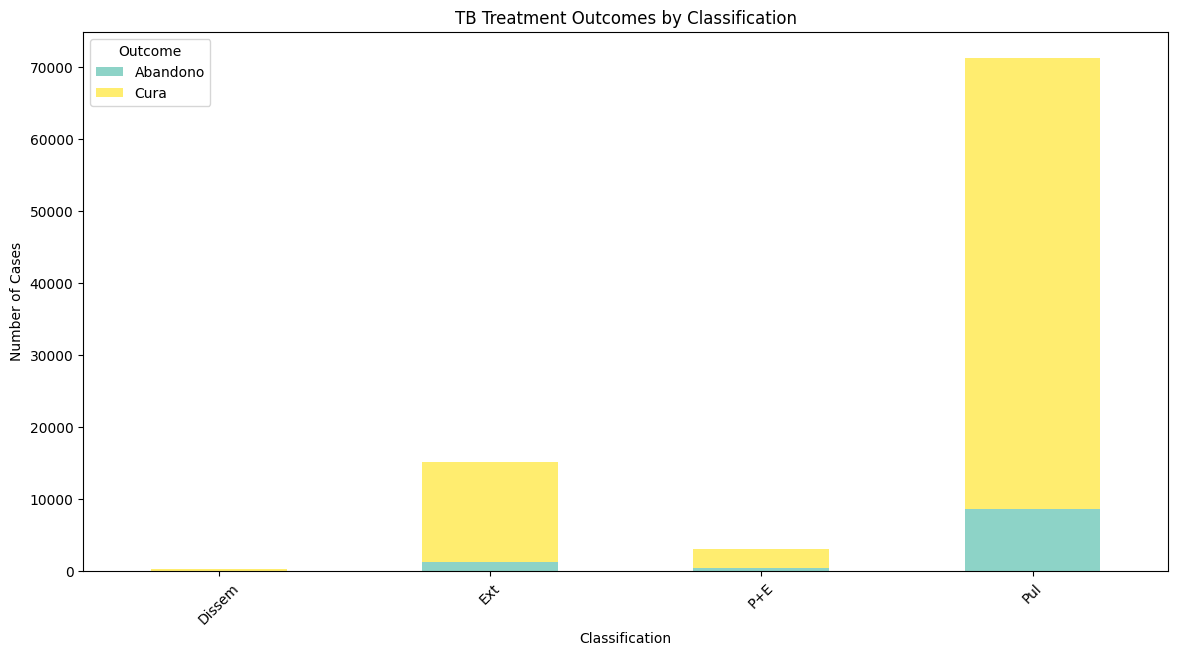

current_status  Abandono   Cura
classification                 
Dissem                40    204
Ext                 1230  13959
P+E                  422   2606
Pul                 8588  62762

In [ ]:
# Analyze treatment outcomes by classification
classification_outcome_counts = data_cleaned.groupby(['classification', 'current_status']).size().unstack()

# Plot the distribution of treatment outcomes by classification
classification_outcome_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set3')
plt.title('TB Treatment Outcomes by Classification')
plt.xlabel('Classification')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.show()

# Display the counts in a table format
classification_outcome_counts


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Function to perform Chi-square test on two categorical variables
def chi_squared_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])  # Create a contingency table
    chi2, p, dof, expected = chi2_contingency(contingency_table)  # Perform the test
    return chi2, p

# Run the Chi-square test between pairs of categorical variables
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

# Iterate through pairs of columns to perform the test
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        chi2, p = chi_squared_test(data_loaded, col1, col2)
        print(f"Chi-squared test between {col1} and {col2}: chi2={chi2:.2f}, p-value={p:.4f}")

Chi-squared test between race_color and age_group: chi2=2126.78, p-value=0.0000
Chi-squared test between race_color and gender: chi2=73.30, p-value=0.0000
Chi-squared test between race_color and pregnant: chi2=11.57, p-value=0.0208
Chi-squared test between race_color and education_level: chi2=1674.10, p-value=0.0000
Chi-squared test between race_color and occupation_type: chi2=1503.64, p-value=0.0000
Chi-squared test between race_color and current_status: chi2=327.32, p-value=0.0000
Chi-squared test between race_color and case_type: chi2=101.15, p-value=0.0000
Chi-squared test between race_color and clinical_form1: chi2=504.81, p-value=0.0000
Chi-squared test between race_color and classification: chi2=365.37, p-value=0.0000
Chi-squared test between race_color and discovery_method: chi2=712.44, p-value=0.0000
Chi-squared test between race_color and bacilloscopy: chi2=448.45, p-value=0.0000
Chi-squared test between race_color and other_bacilloscopy: chi2=423.94, p-value=0.0000
Chi-squar

In [ ]:
categorical_columns

Index(['race_color', 'age_group', 'gender', 'pregnant', 'education_level',
       'occupation_type', 'current_status', 'case_type', 'clinical_form1',
       'classification', 'discovery_method', 'bacilloscopy',
       'other_bacilloscopy', 'culture_exam', 'other_culture_exam', 'x_ray',
       'other_x_ray', 'necropsy', 'hiv_status', 'aids', 'diabetes',
       'alcoholism', 'mental_condition', 'drug_addiction', 'smoking_habit',
       'treatment_institution', 'initial_treatment_scheme', 'current_scheme',
       'treatment_type', 'histopathological_exam', 'other_immunological_test'],
      dtype='object')

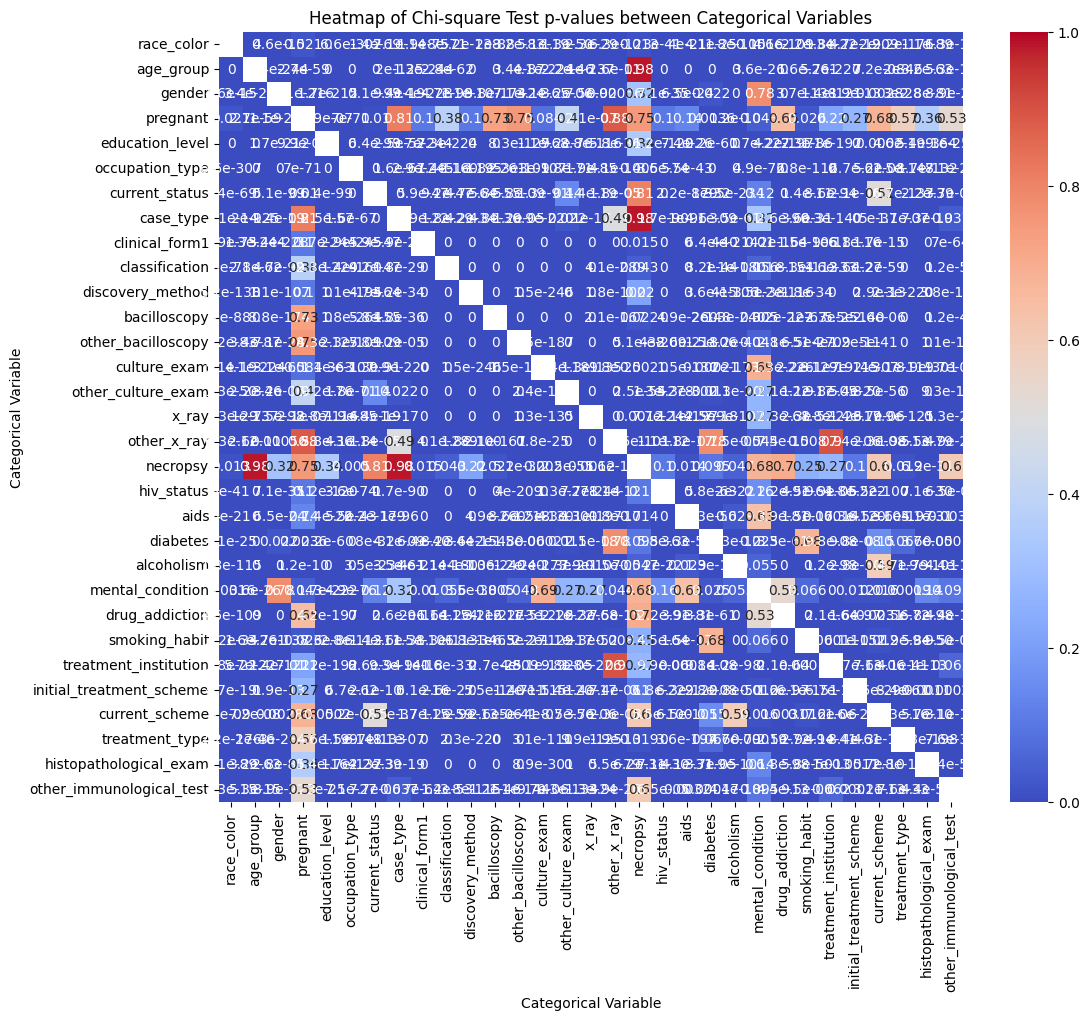

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to store p-values
p_value_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Fill the matrix with p-values
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i != j:
            _, p = chi_squared_test(data_loaded, col1, col2)
            p_value_matrix.loc[col1, col2] = p
        else:
            p_value_matrix.loc[col1, col2] = np.nan

# Convert p-values to numeric for visualization
p_value_matrix = p_value_matrix.astype(float)

# Check if the p-value matrix has more than one variable
if len(categorical_columns) > 1:
    # Plot the heatmap if there are sufficient columns
    plt.figure(figsize=(12, 10))
    sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, mask=np.triu(p_value_matrix.isnull()))
    plt.title('Heatmap of Chi-square Test p-values between Categorical Variables')
    plt.xlabel('Categorical Variable')
    plt.ylabel('Categorical Variable')
    plt.show()
else:
    print("Not enough categorical variables for a meaningful Chi-square test heatmap.")

### Numerical columns

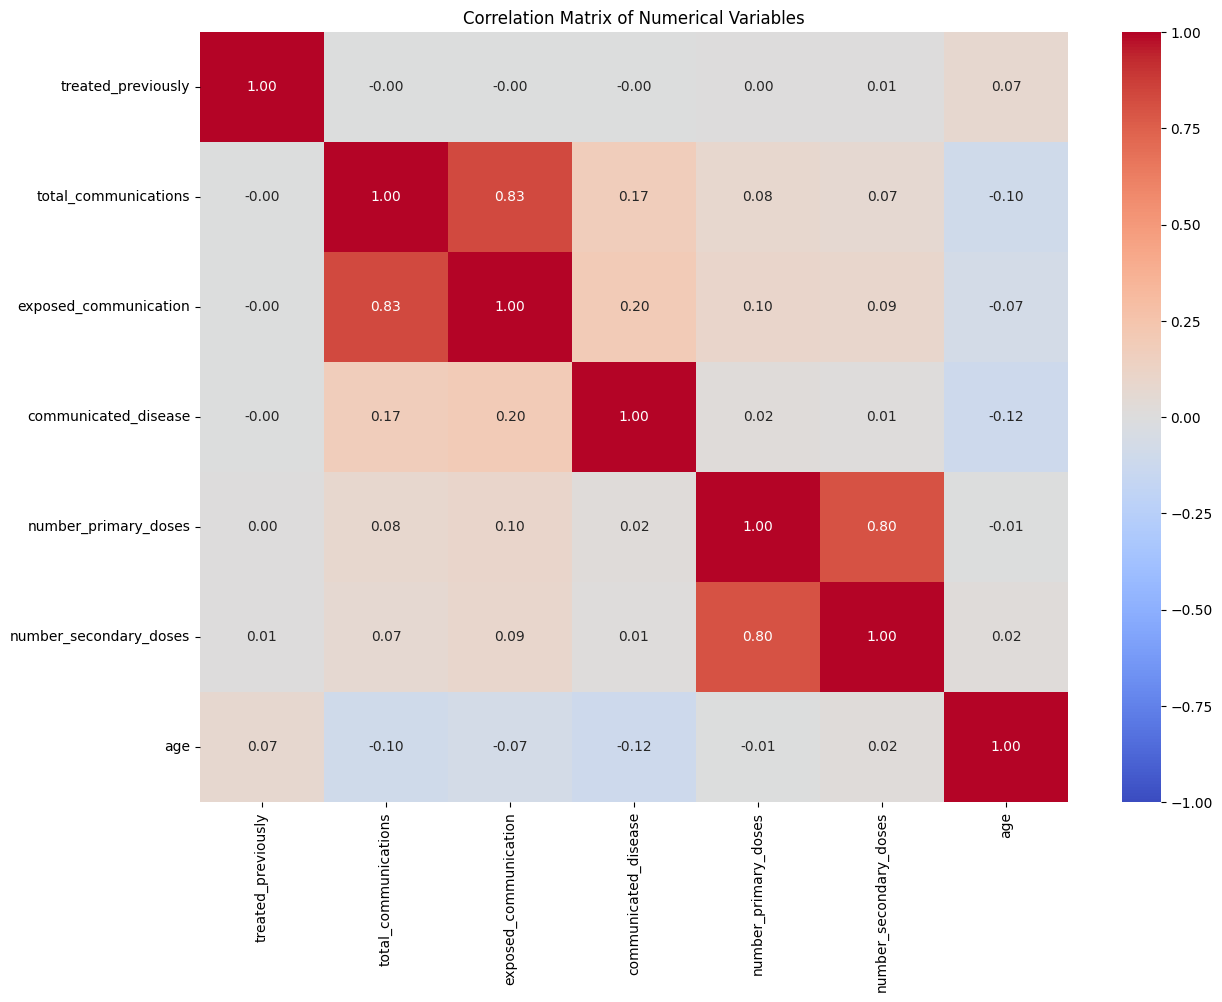

                        treated_previously  total_communications  \
treated_previously                1.000000             -0.002852   
total_communications             -0.002852              1.000000   
exposed_communication            -0.002210              0.828890   
communicated_disease             -0.004653              0.172166   
number_primary_doses              0.004923              0.078469   
number_secondary_doses            0.007269              0.068339   
age                               0.074624             -0.096724   

                        exposed_communication  communicated_disease  \
treated_previously                  -0.002210             -0.004653   
total_communications                 0.828890              0.172166   
exposed_communication                1.000000              0.202727   
communicated_disease                 0.202727              1.000000   
number_primary_doses                 0.096856              0.018440   
number_secondary_doses       

In [ ]:
# Select only numerical columns for the correlation matrix
numerical_data = data_loaded.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix for numerical variables
plt.figure(figsize=(14, 10))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Display the correlation matrix
print(correlation_matrix)

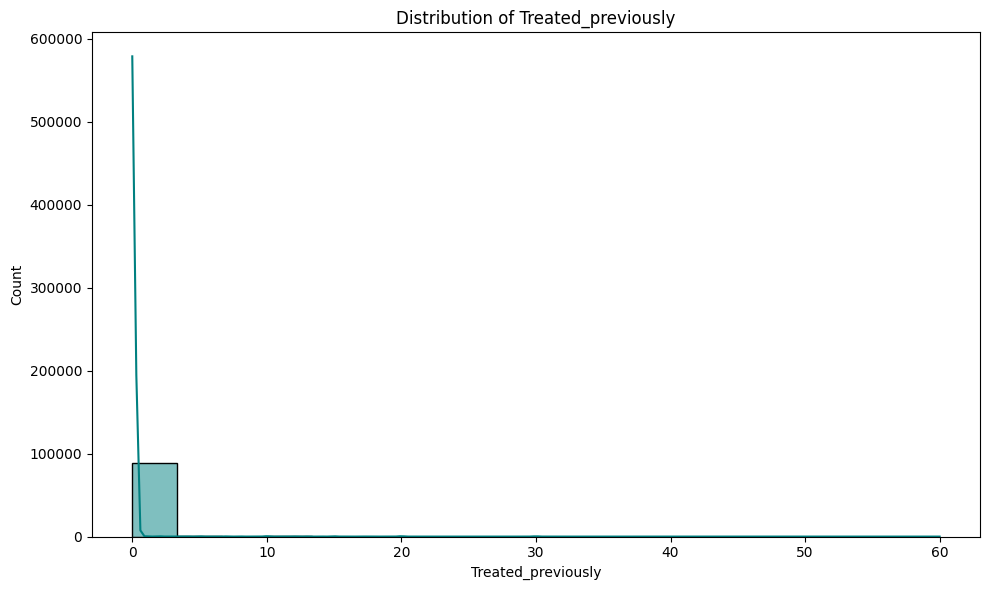

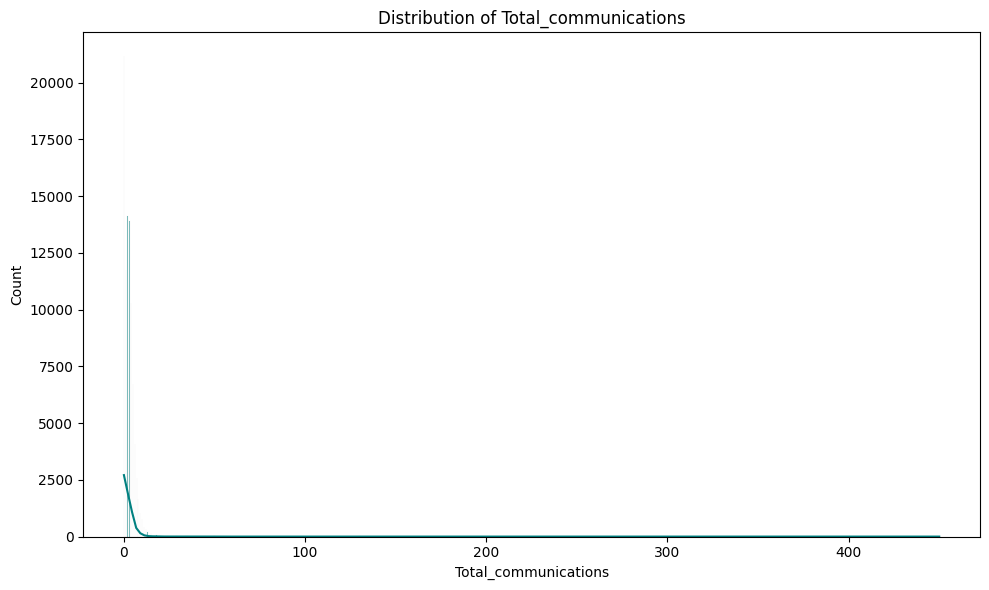

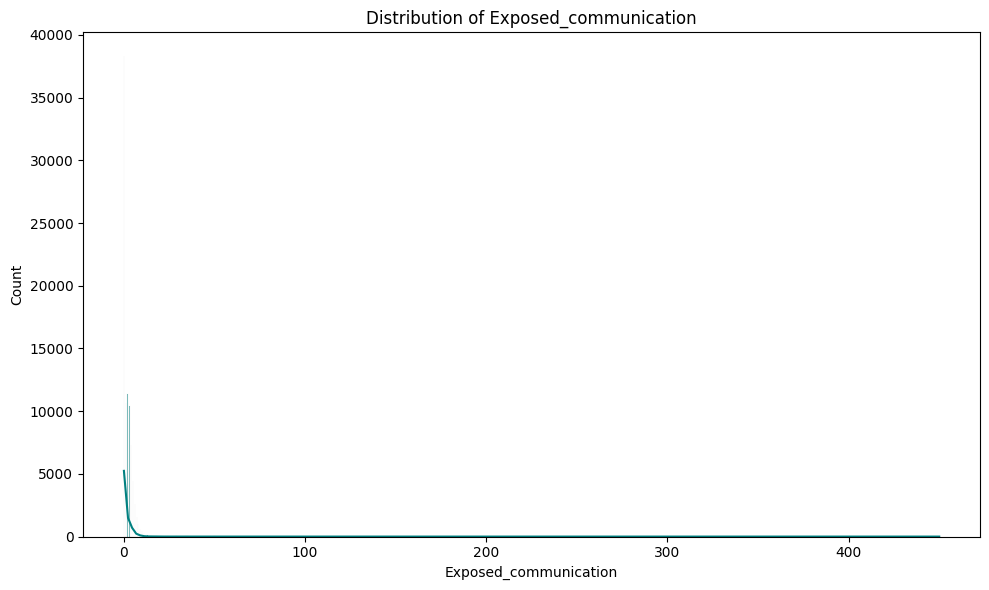

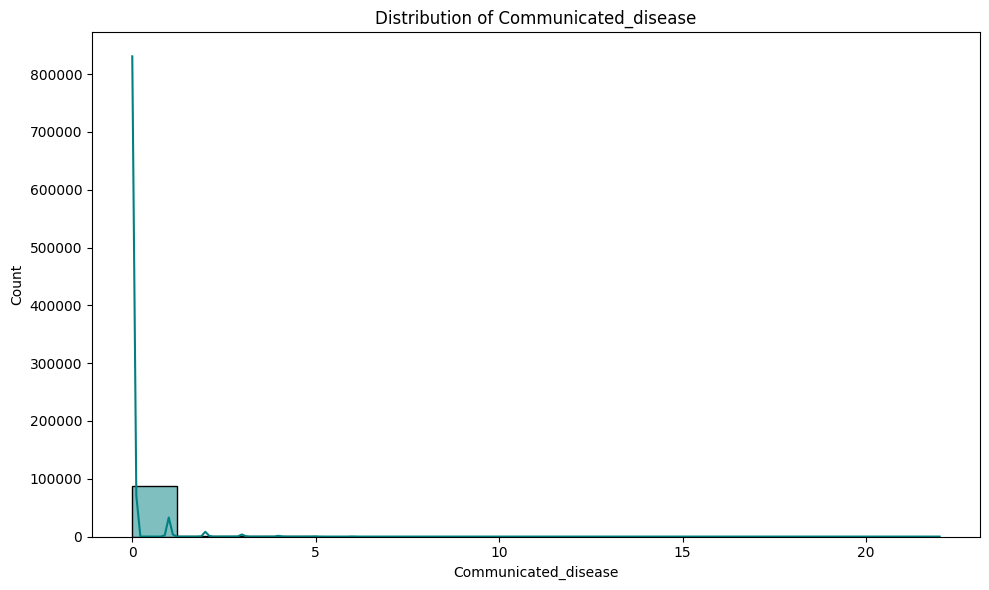

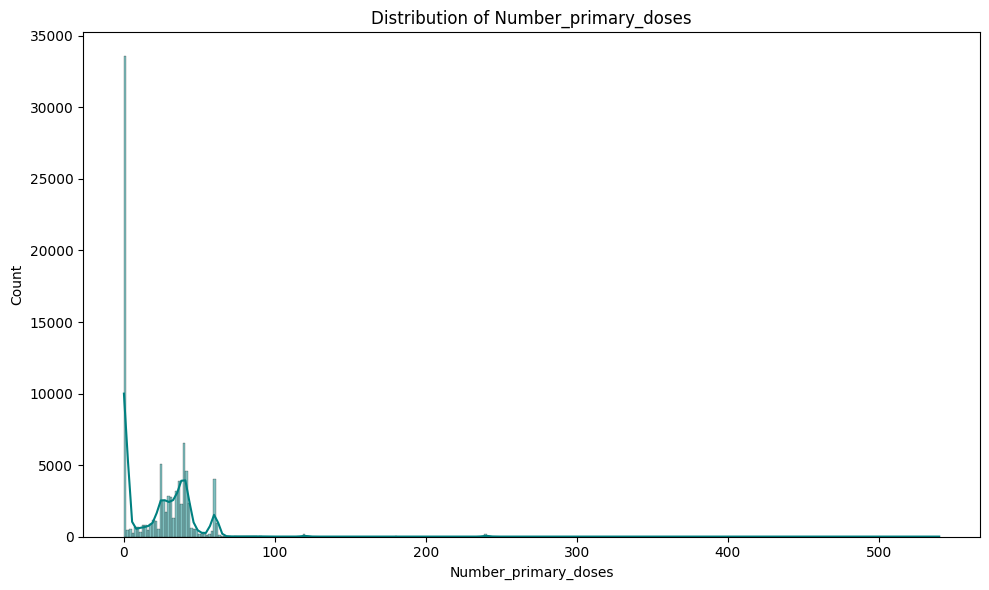

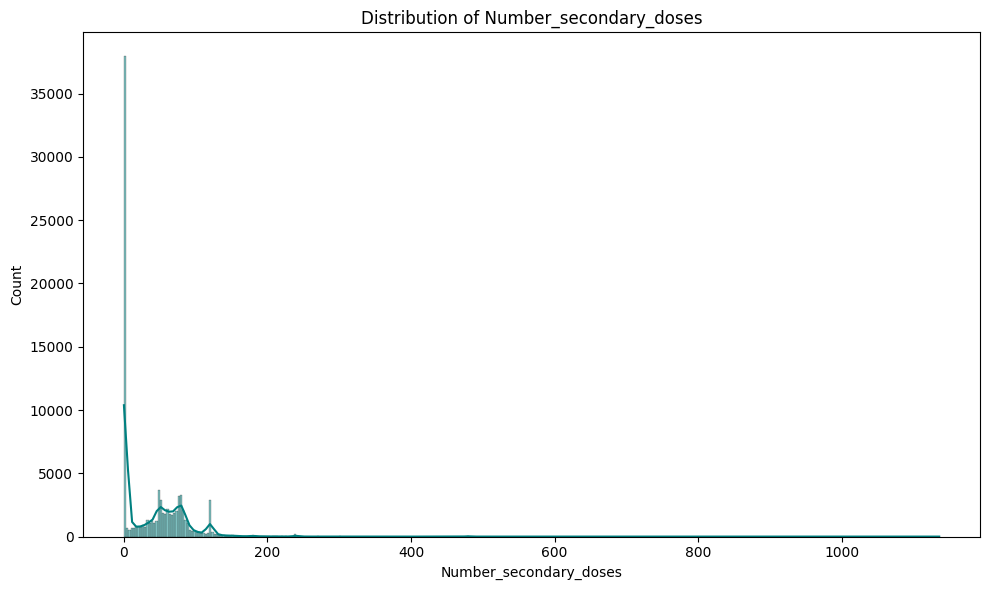

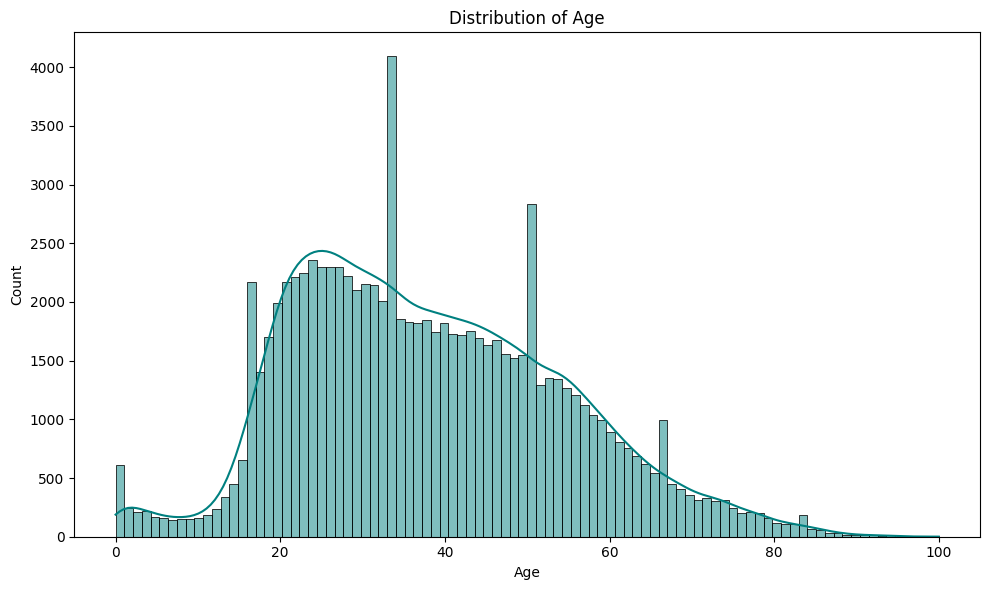

In [ ]:
# Plot distribution for each numerical variable in the dataset
numerical_columns = data_loaded.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numerical variable
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data_loaded, x=col, kde=True, color='teal')
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

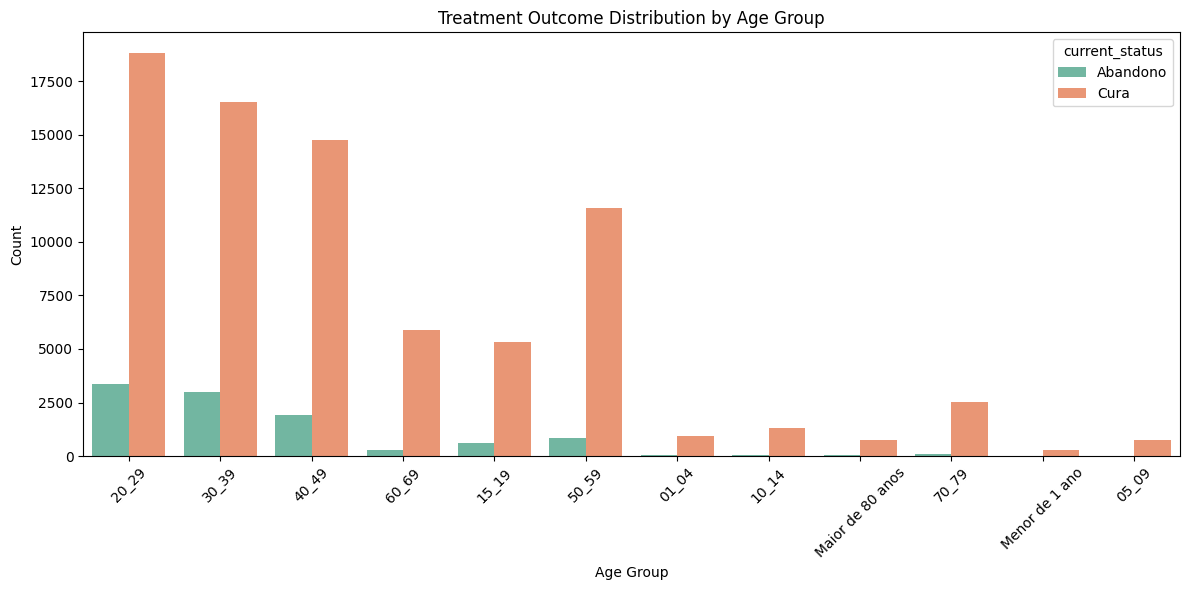

In [ ]:
# Plot treatment outcome distribution by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=data_loaded, x='age_group', hue='current_status', palette='Set2')
plt.title('Treatment Outcome Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

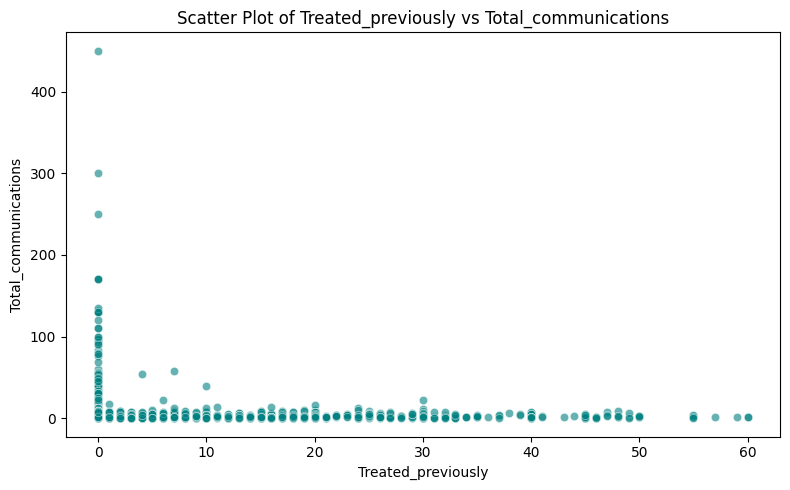

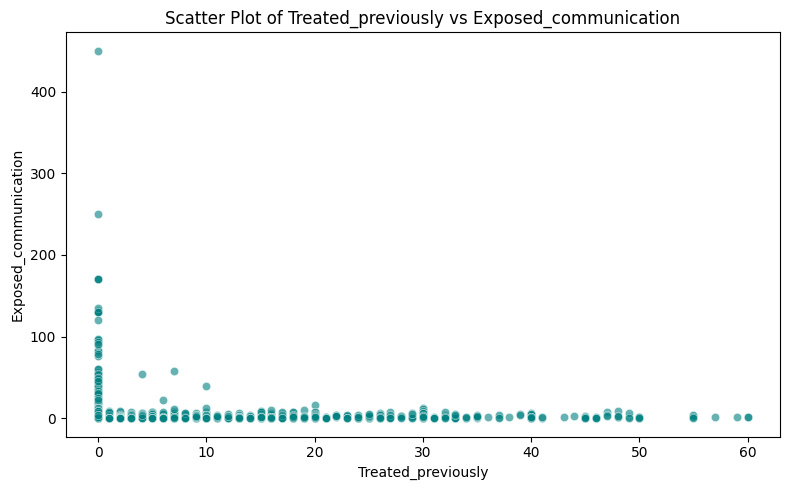

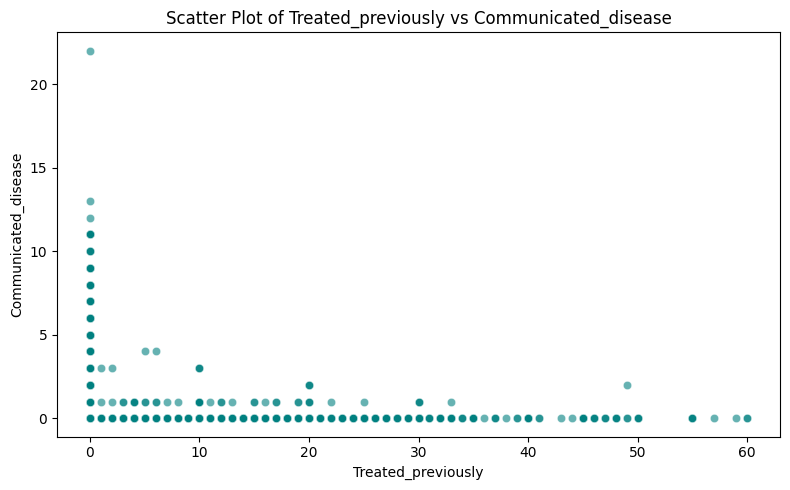

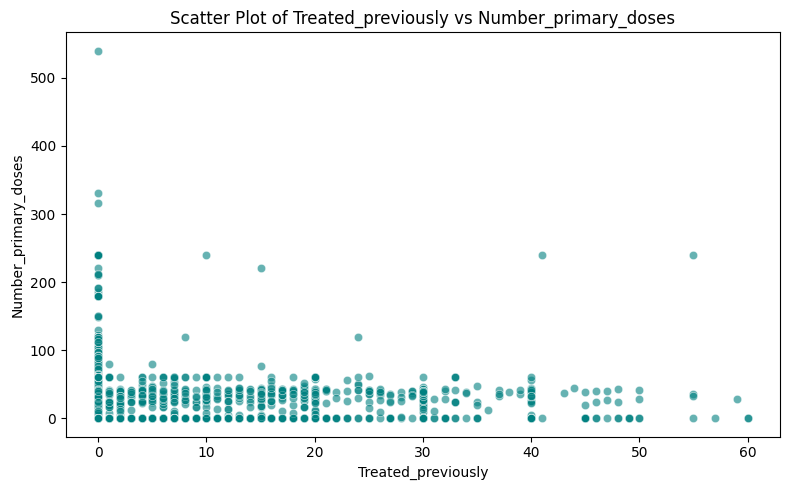

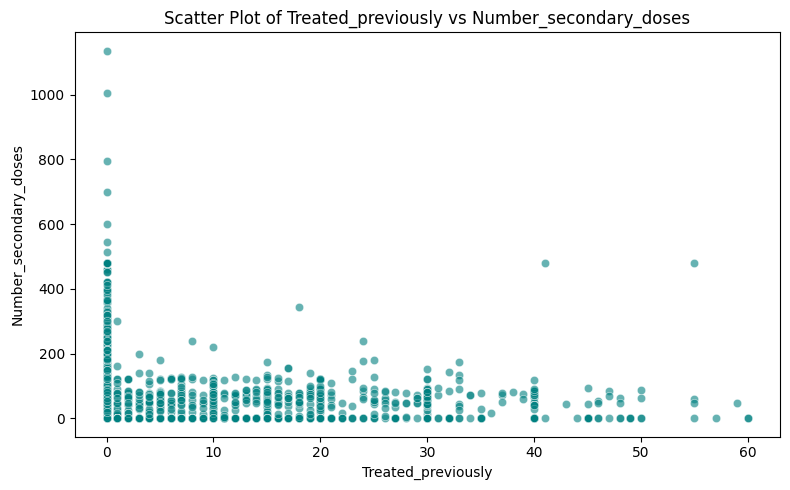

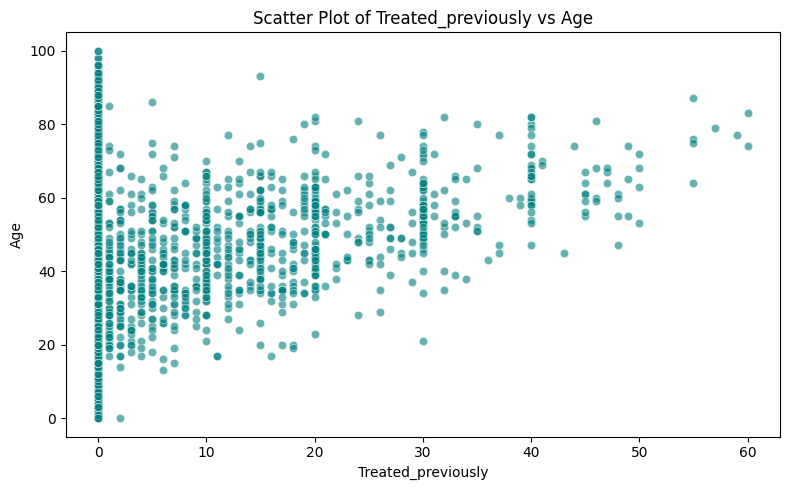

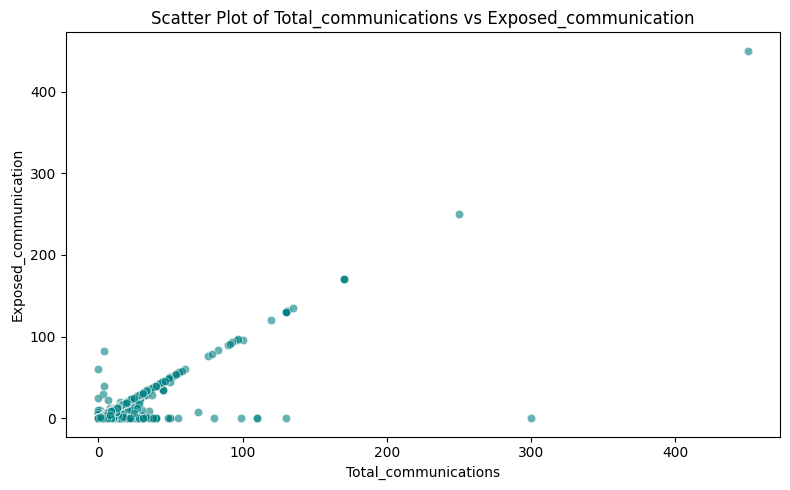

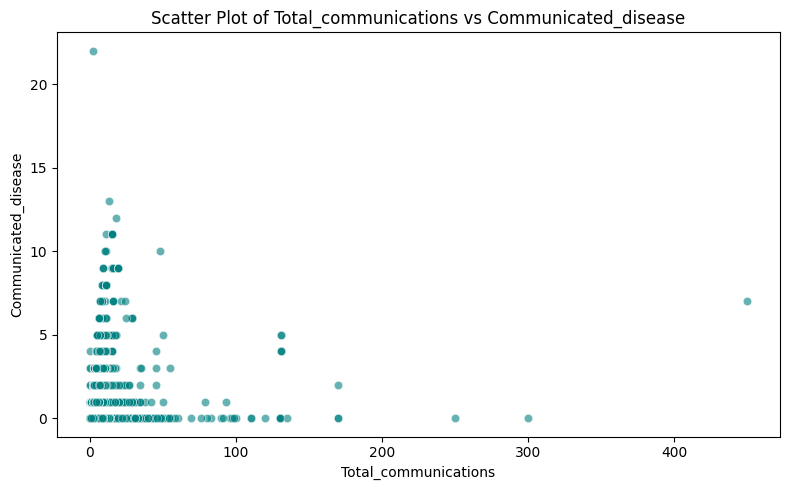

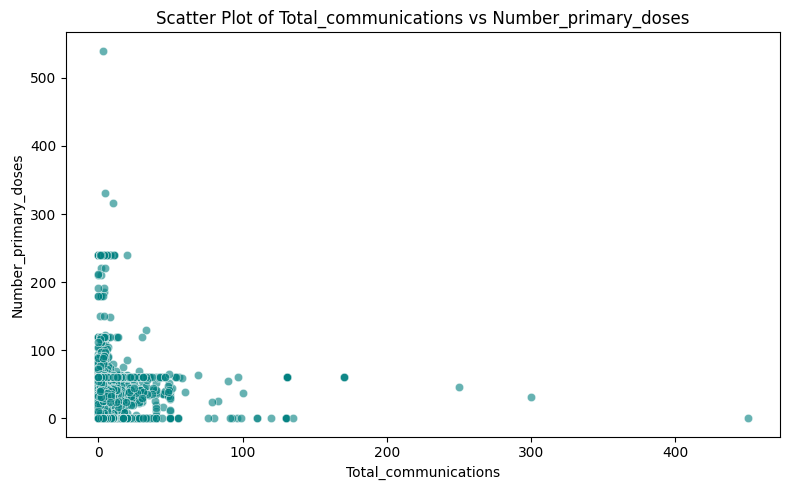

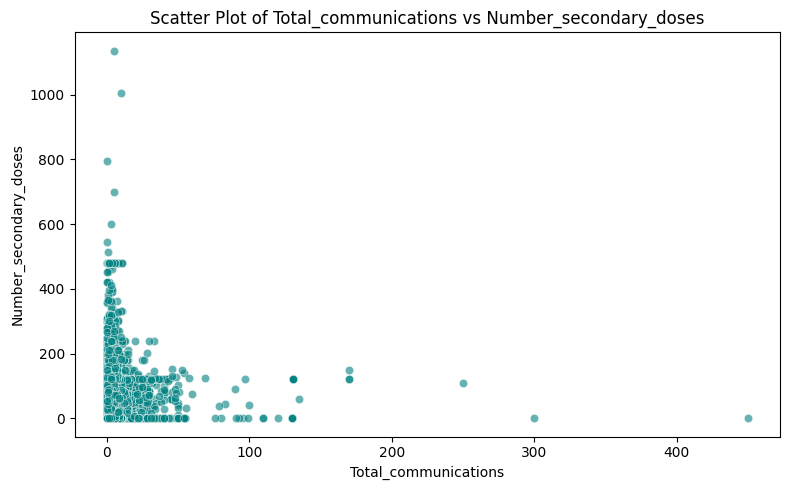

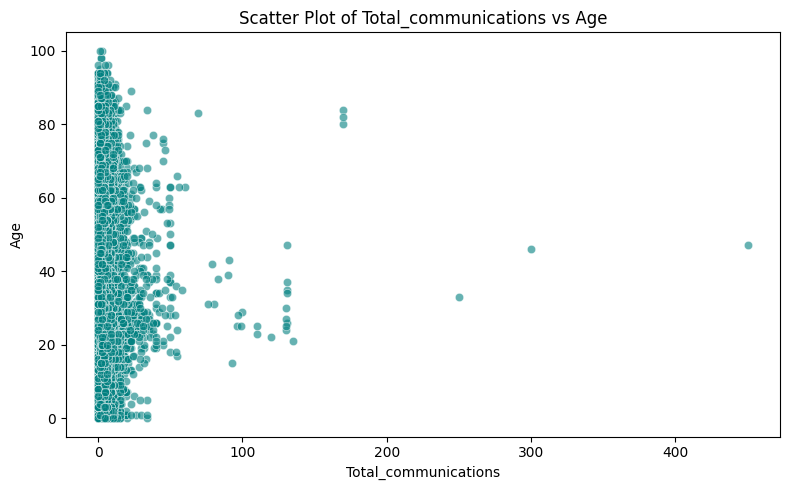

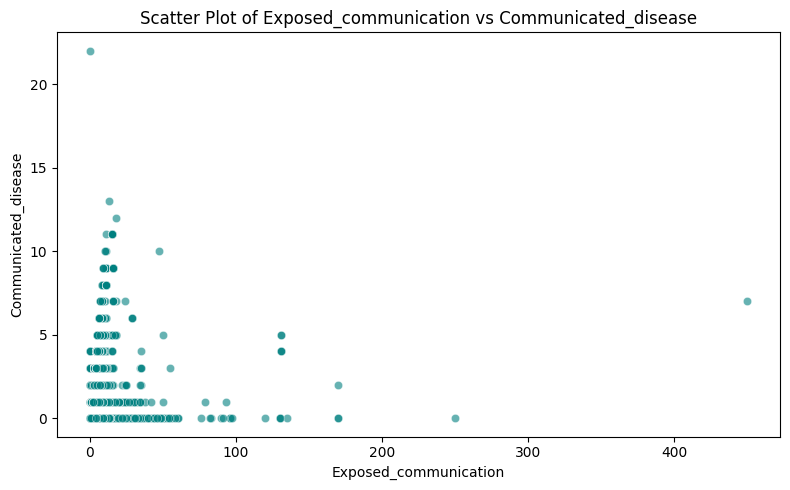

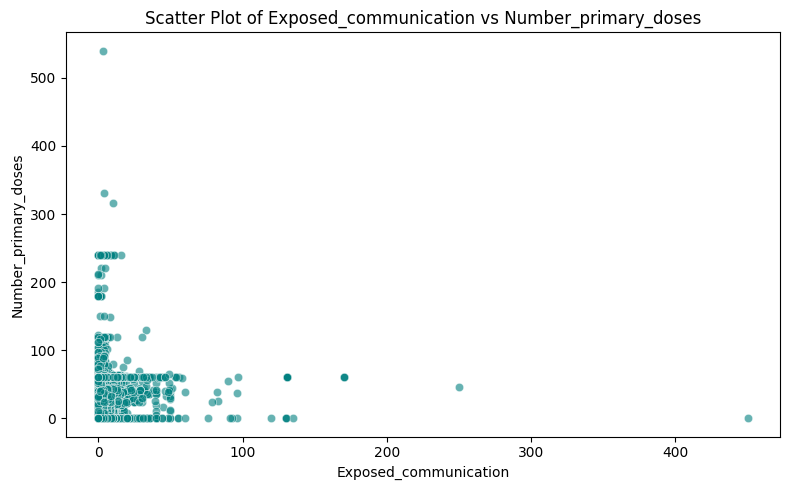

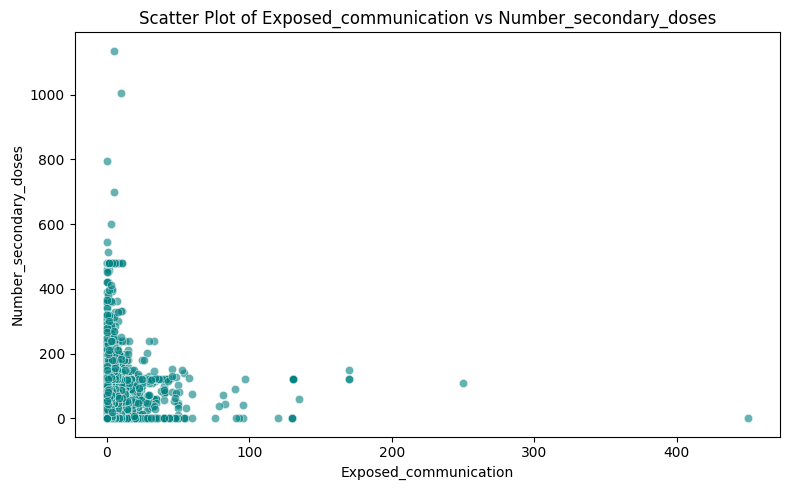

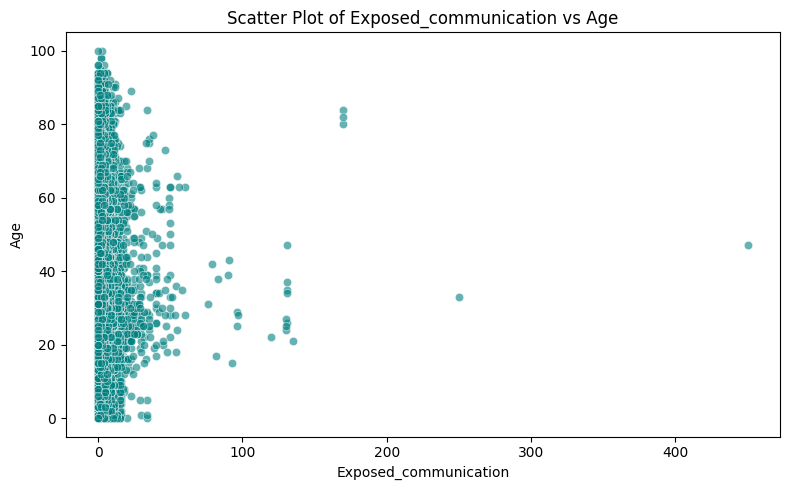

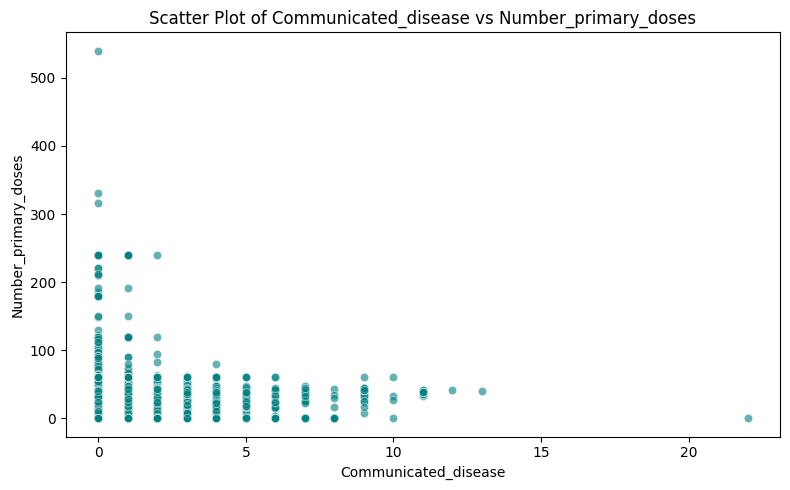

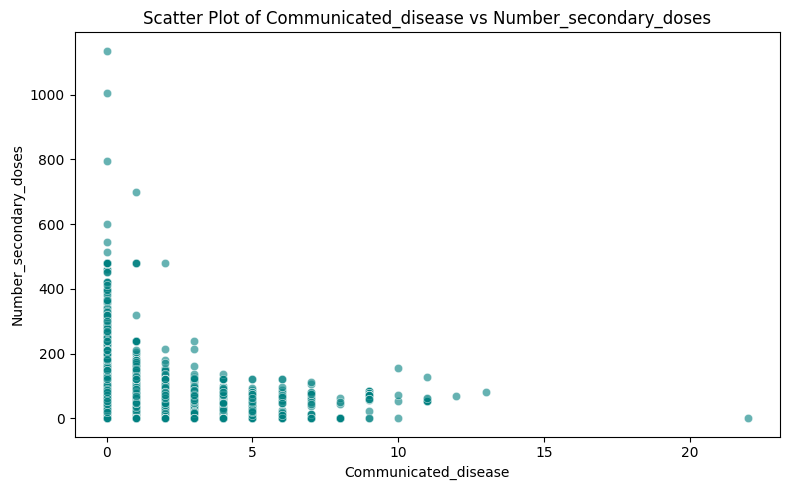

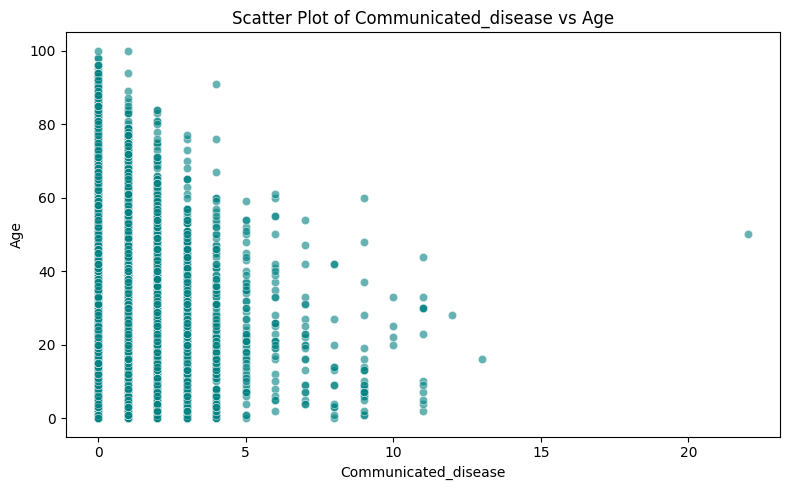

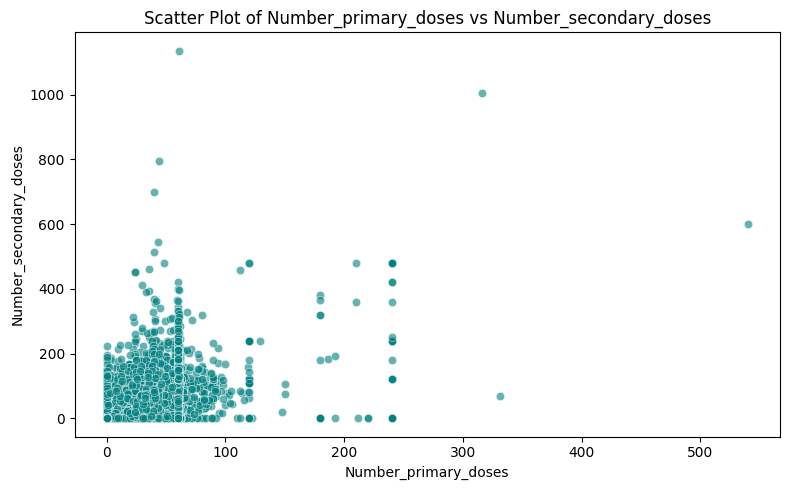

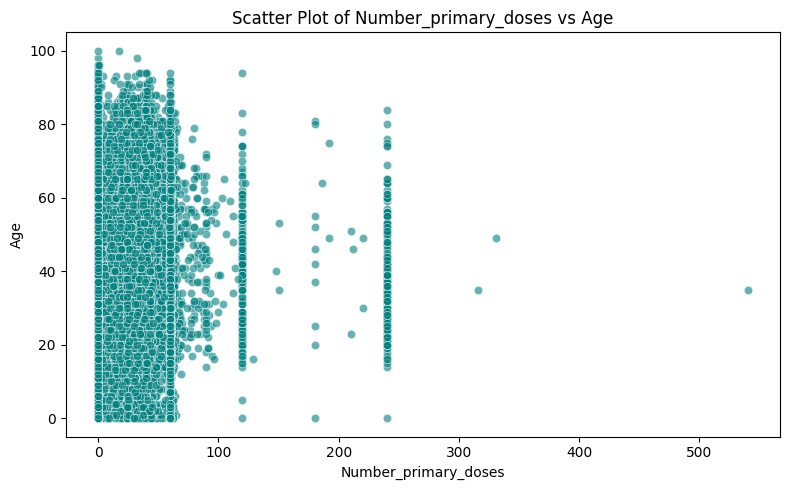

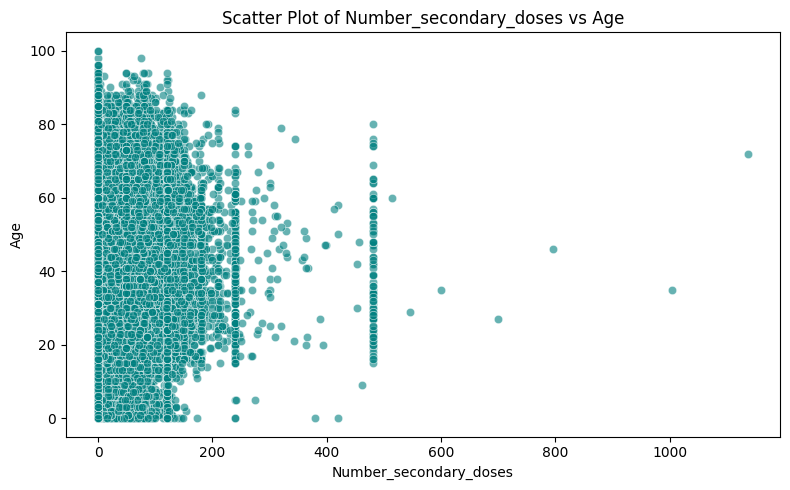

In [ ]:
# Select numerical columns
numerical_columns = data_loaded.select_dtypes(include=['int64', 'float64']).columns

# Create scatter plots for all pairs of numerical variables
for i, col1 in enumerate(numerical_columns):
    for col2 in numerical_columns[i+1:]:
        plt.figure(figsize=(8, 5))
        sns.scatterplot(data=data_loaded, x=col1, y=col2, alpha=0.6, color='teal')
        plt.title(f'Scatter Plot of {col1.capitalize()} vs {col2.capitalize()}')
        plt.xlabel(col1.capitalize())
        plt.ylabel(col2.capitalize())
        plt.tight_layout()
        plt.show()


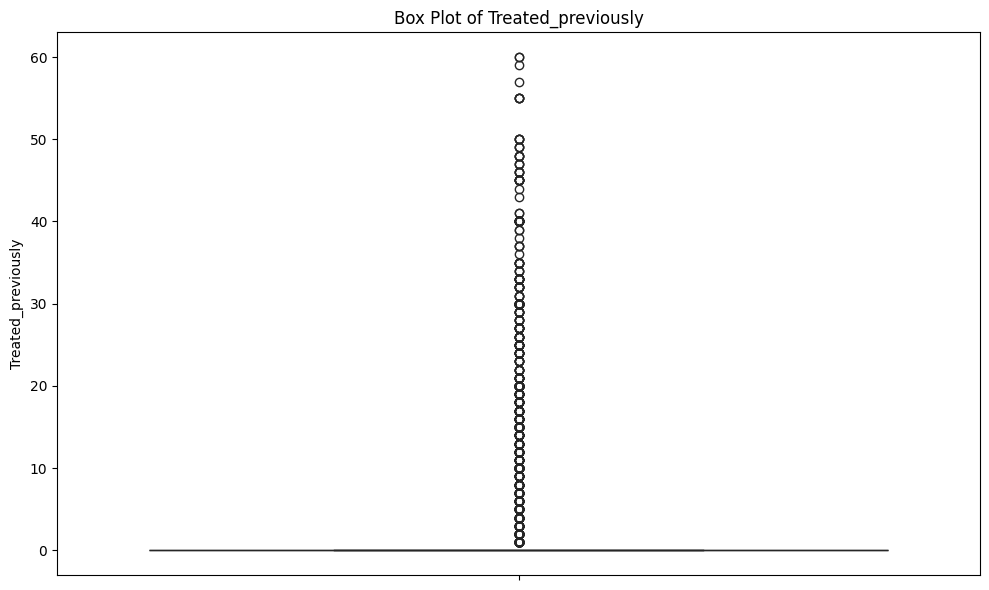

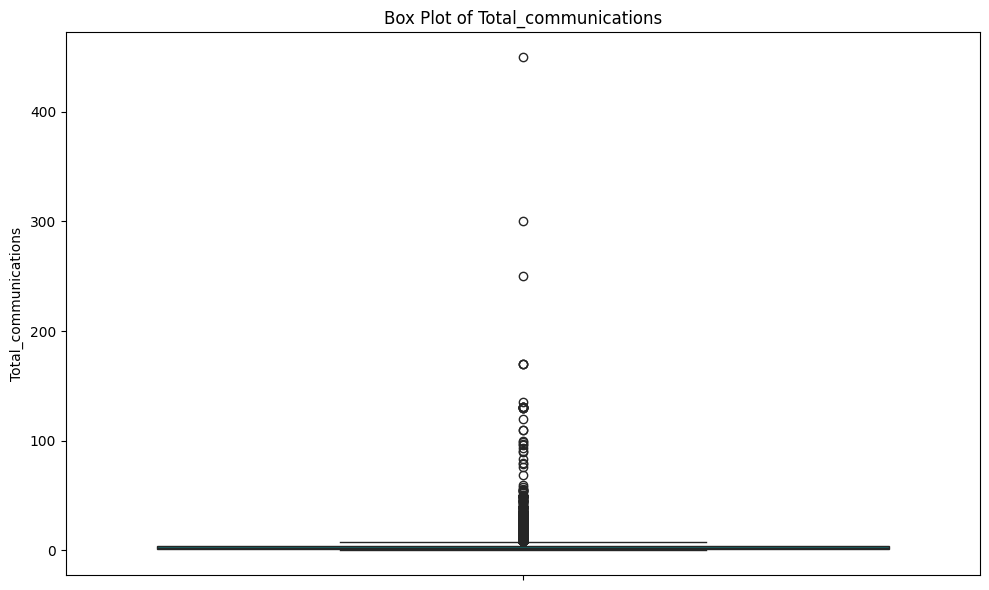

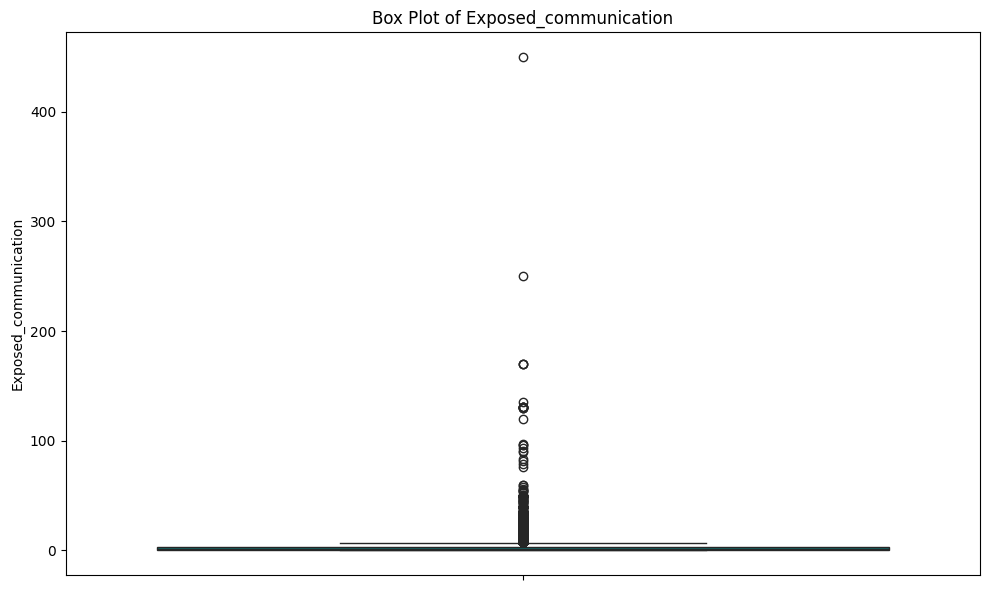

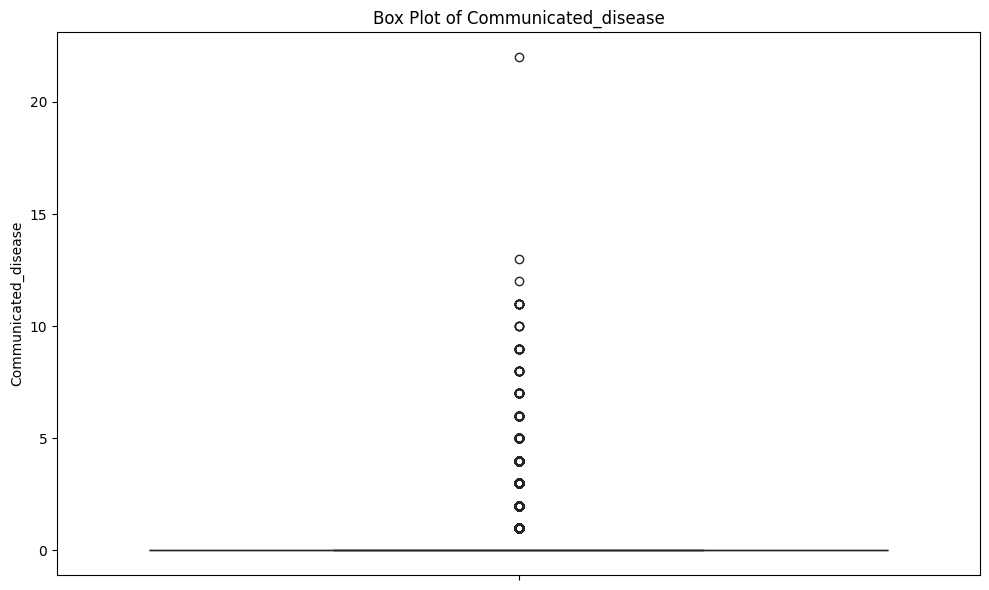

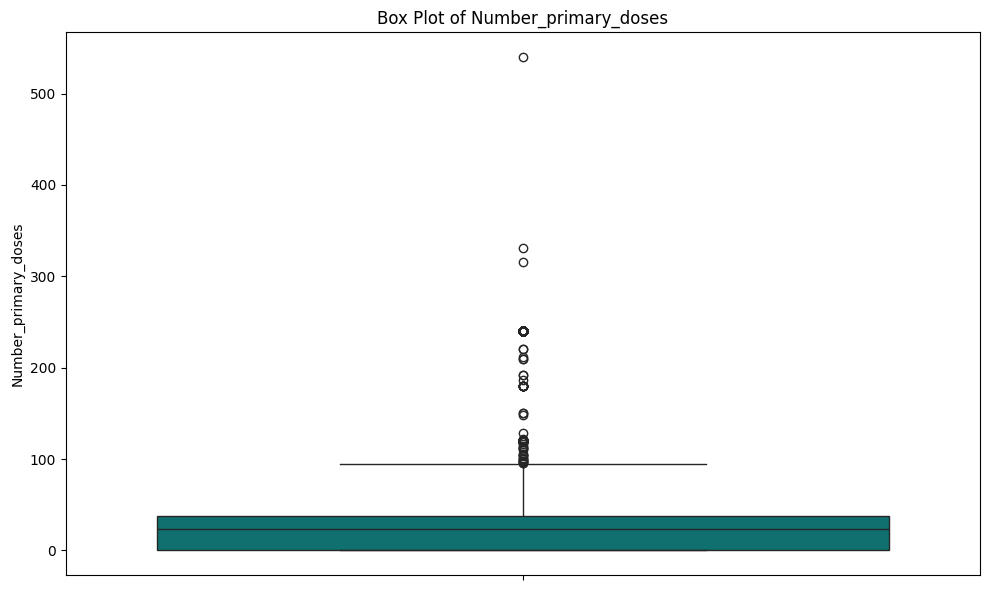

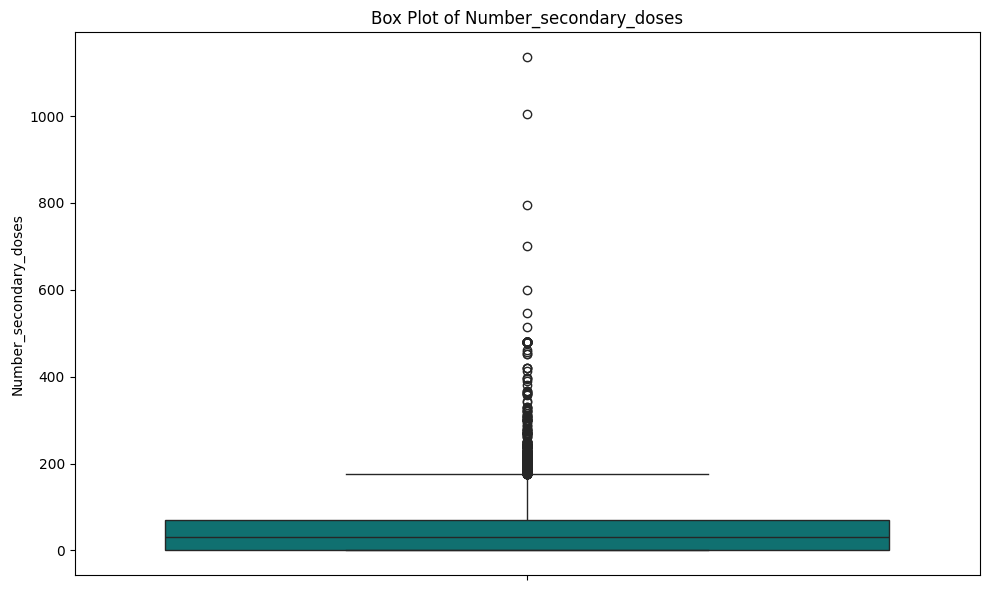

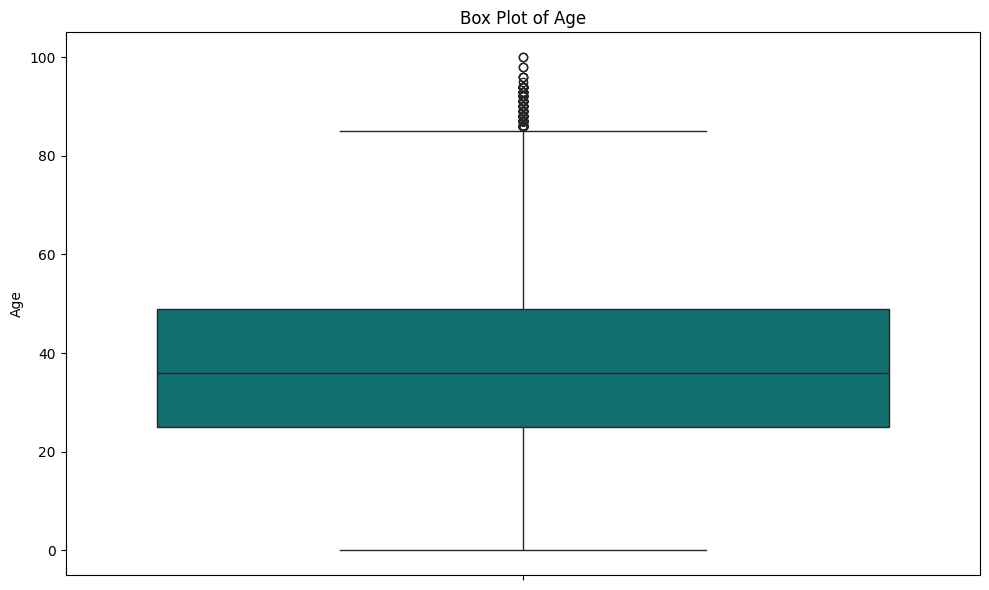

In [ ]:
# Create box plots for each numerical variable
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_loaded, y=col, color='teal')
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.ylabel(col.capitalize())
    plt.tight_layout()
    plt.show()

<ipython-input-72-61a2a1a8c9aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_loaded, x='current_status', palette='Set2')


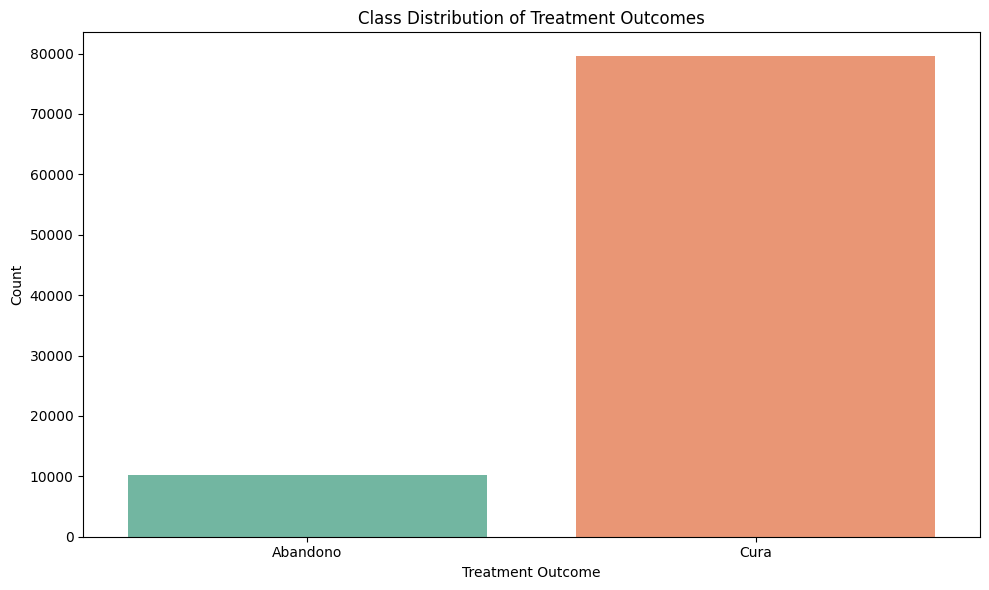

Class distribution:
 current_status
Cura        79531
Abandono    10280
Name: count, dtype: int64


In [ ]:
# Plot the class distribution of the target variable (e.g., 'current_status')
plt.figure(figsize=(10, 6))
sns.countplot(data=data_loaded, x='current_status', palette='Set2')
plt.title('Class Distribution of Treatment Outcomes')
plt.xlabel('Treatment Outcome')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Display the count of each class
class_distribution = data_loaded['current_status'].value_counts()
print("Class distribution:\n", class_distribution)


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89811 entries, 0 to 103845
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race_color                89811 non-null  object 
 1   age_group                 89811 non-null  object 
 2   gender                    89811 non-null  object 
 3   pregnant                  89811 non-null  object 
 4   education_level           89811 non-null  object 
 5   occupation_type           89811 non-null  object 
 6   treated_previously        89811 non-null  float64
 7   current_status            89811 non-null  object 
 8   case_type                 89811 non-null  object 
 9   clinical_form1            89808 non-null  object 
 10  classification            89811 non-null  object 
 11  discovery_method          88533 non-null  object 
 12  bacilloscopy              89811 non-null  object 
 13  other_bacilloscopy        89811 non-null  object 
 14  culture_ex

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Function to perform Chi-square test on two categorical variables
def chi_squared_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Run the Chi-square test between pairs of categorical variables
categorical_columns = data_loaded.select_dtypes(include=['object']).columns

# Iterate through pairs of columns to perform the test
for i, col1 in enumerate(categorical_columns):
    for col2 in categorical_columns[i+1:]:
        chi2, p = chi_squared_test(data_loaded, col1, col2)
        print(f"Chi-squared test between {col1} and {col2}: chi2={chi2:.2f}, p-value={p:.4f}")

Chi-squared test between race_color and age_group: chi2=2126.78, p-value=0.0000
Chi-squared test between race_color and gender: chi2=73.30, p-value=0.0000
Chi-squared test between race_color and pregnant: chi2=11.57, p-value=0.0208
Chi-squared test between race_color and education_level: chi2=1674.10, p-value=0.0000
Chi-squared test between race_color and occupation_type: chi2=1503.64, p-value=0.0000
Chi-squared test between race_color and current_status: chi2=327.32, p-value=0.0000
Chi-squared test between race_color and case_type: chi2=101.15, p-value=0.0000
Chi-squared test between race_color and clinical_form1: chi2=504.81, p-value=0.0000
Chi-squared test between race_color and classification: chi2=365.37, p-value=0.0000
Chi-squared test between race_color and discovery_method: chi2=712.44, p-value=0.0000
Chi-squared test between race_color and bacilloscopy: chi2=448.45, p-value=0.0000
Chi-squared test between race_color and other_bacilloscopy: chi2=423.94, p-value=0.0000
Chi-squar

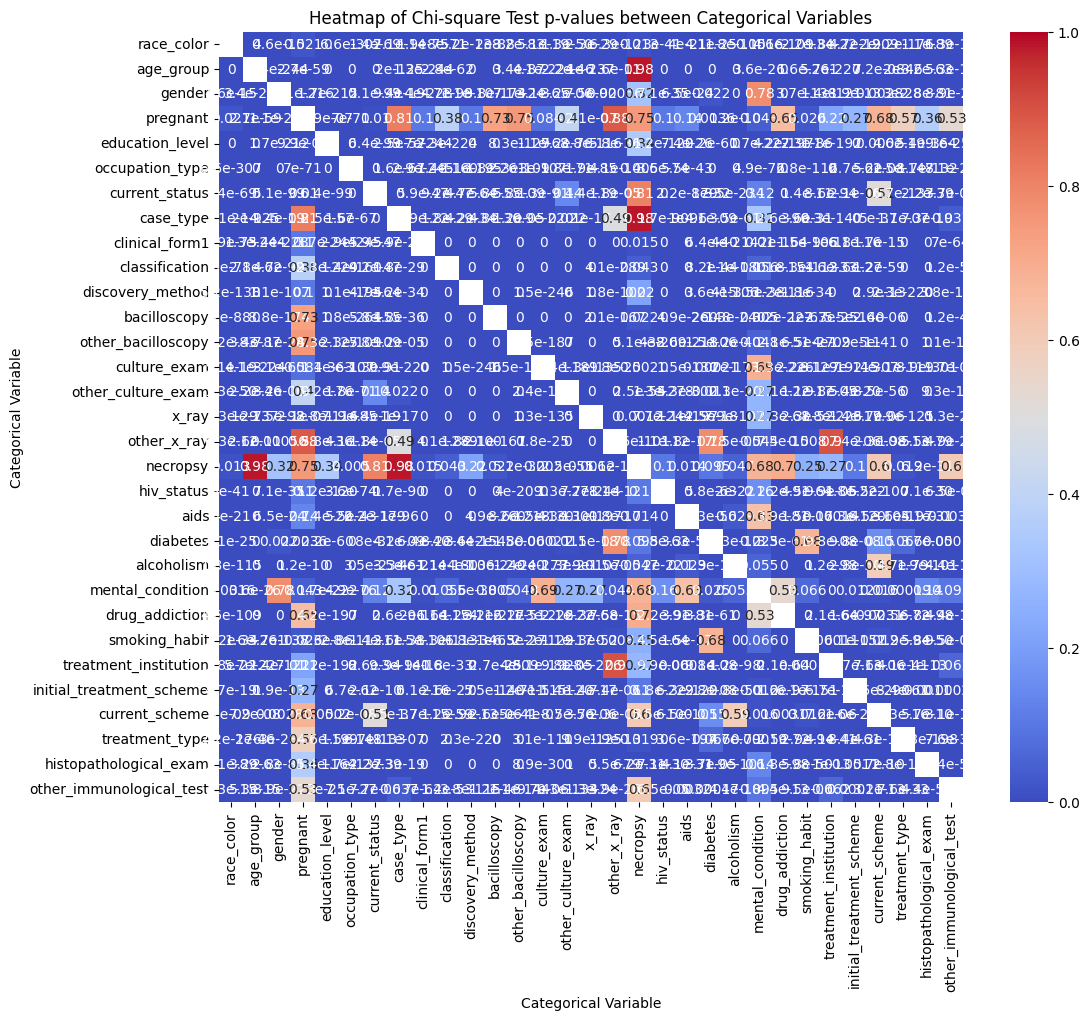

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame to store p-values
p_value_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

# Fill the matrix with p-values
for i, col1 in enumerate(categorical_columns):
    for j, col2 in enumerate(categorical_columns):
        if i != j:
            _, p = chi_squared_test(data_loaded, col1, col2)
            p_value_matrix.loc[col1, col2] = p
        else:
            p_value_matrix.loc[col1, col2] = np.nan

# Convert p-values to numeric for visualization
p_value_matrix = p_value_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(p_value_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, mask=np.triu(p_value_matrix.isnull()))
plt.title('Heatmap of Chi-square Test p-values between Categorical Variables')
plt.xlabel('Categorical Variable')
plt.ylabel('Categorical Variable')
plt.show()

In [ ]:
import pandas as pd
import scipy.stats as ss

# Define the target variable
target_variable = 'current_status'

# Initialize a list to store the results
correlation_results = []

# Iterate through all categorical variables and compute the Chi-squared test against the target variable
for col in categorical_columns:
    if col != target_variable:
        chi2, p, _, _ = ss.chi2_contingency(pd.crosstab(data_cleaned[col], data_cleaned[target_variable]))
        correlation_results.append((col, chi2, p))

# Create a DataFrame from the results
correlation_df = pd.DataFrame(correlation_results, columns=['Variable', 'Chi2', 'p_value'])

# Sort the DataFrame by the Chi2 value to show the most related variables at the top
correlation_df.sort_values(by='Chi2', ascending=False, inplace=True)

# Display the results
print("Correlation between categorical variables and the target variable:")
print(correlation_df)

# Highlight variables with p-values ≤ 0.05 (indicating significant correlation)
significant_vars = correlation_df[correlation_df['p_value'] <= 0.05]
print("\nSignificantly correlated variables (p-value ≤ 0.05):")
print(significant_vars)

Correlation between categorical variables and the target variable:
                    Variable         Chi2        p_value
22            drug_addiction  3924.125744   0.000000e+00
17                hiv_status  2839.189740   0.000000e+00
5            occupation_type  1775.130443   0.000000e+00
6                  case_type  1495.481316   0.000000e+00
1                  age_group  1495.273121   0.000000e+00
20                alcoholism  1067.690173  3.478055e-234
18                      aids   815.577423  2.214570e-179
27            treatment_type   601.828064  6.701649e-133
4            education_level   472.680384   6.433970e-99
24     treatment_institution   448.875198   8.570784e-94
2                     gender   446.085582   5.128725e-99
12              culture_exam   424.194775   1.270627e-91
0                 race_color   327.317363   1.382045e-69
9           discovery_method   306.198851   4.654109e-64
7             clinical_form1   254.973702   5.929239e-47
10              bacil

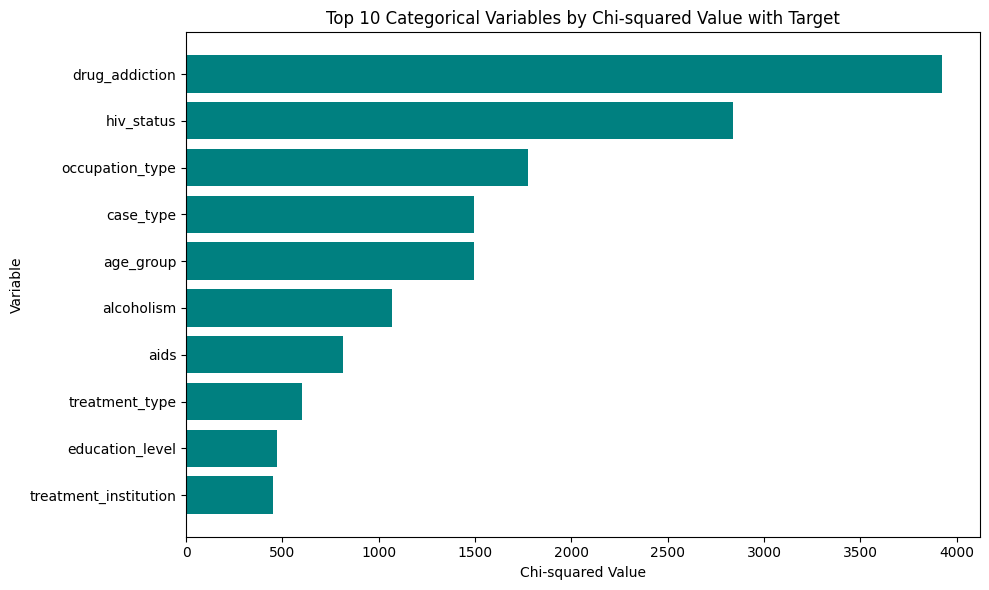

In [ ]:
top_10_vars = correlation_df.head(10)

# Plotting the top 10 variables by Chi-squared value
plt.figure(figsize=(10, 6))
plt.barh(top_10_vars['Variable'], top_10_vars['Chi2'], color='teal')
plt.xlabel('Chi-squared Value')
plt.ylabel('Variable')
plt.title('Top 10 Categorical Variables by Chi-squared Value with Target')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

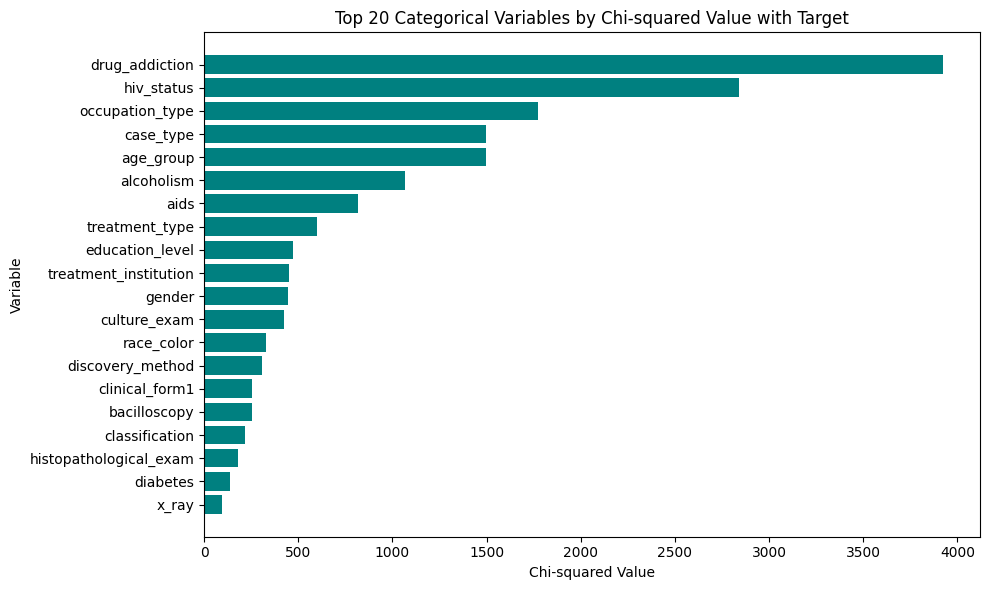

In [ ]:
top_20_vars = correlation_df.head(20)

# Plotting the top 20 variables by Chi-squared value
plt.figure(figsize=(10, 6))
plt.barh(top_20_vars['Variable'], top_20_vars['Chi2'], color='teal')
plt.xlabel('Chi-squared Value')
plt.ylabel('Variable')
plt.title('Top 20 Categorical Variables by Chi-squared Value with Target')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Save the cleaned dataset to a CSV file
data_cleaned.to_csv("cleaned_dataset.csv", index=False)

## Under sampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Define target and key variables
target_column = 'current_status'
key_variables = [
    'drug_addiction', 'hiv_status', 'occupation_type', 'case_type',
    'age_group', 'alcoholism', 'aids', 'treatment_type',
    'education_level', 'treatment_institution', 'gender'
]

# Prepare the dataset for undersampling
X = data_cleaned.drop(columns=[target_column])
y = data_cleaned[target_column]

# Use RandomUnderSampler with stratification on the target and key variables
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Combine X_resampled and y_resampled into one DataFrame
undersampled_data = X_resampled.copy()
undersampled_data[target_column] = y_resampled

# Verify the balance in the undersampled dataset
print("Class distribution in the undersampled data:\n", undersampled_data[target_column].value_counts())
print("Distribution of key variables after undersampling:\n", undersampled_data[key_variables].value_counts())

# Save the undersampled dataset if needed
undersampled_data.to_csv("undersampled_data.csv", index=False)

Class distribution in the undersampled data:
 current_status
Abandono    10280
Cura        10280
Name: count, dtype: int64
Distribution of key variables after undersampling:
 drug_addiction  hiv_status  occupation_type  case_type                         age_group  alcoholism  aids  treatment_type     education_level  treatment_institution  gender
N               Neg         Outra            Novo                              20_29      N           N     Supervisionado     De 8 a 11 anos   N                      M         405
                                                                                                                                                                       F         235
                                                                               30_39      N           N     Supervisionado     De 8 a 11 anos   N                      M         227
                                                                               20_29      N           N     

<ipython-input-82-2dca843321a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=undersampled_data, x=target_column, palette="viridis")


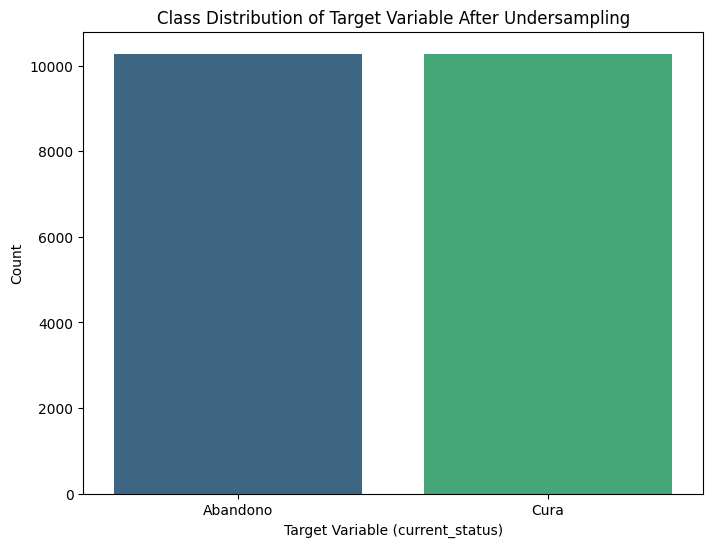

<ipython-input-82-2dca843321a8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=undersampled_data, x=variable, palette="viridis")
<ipython-input-82-2dca843321a8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=undersampled_data, x=variable, palette="viridis")
<ipython-input-82-2dca843321a8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=undersampled_data, x=variable, palette="viridis")
<ipython-input-82-2dca843321a8>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

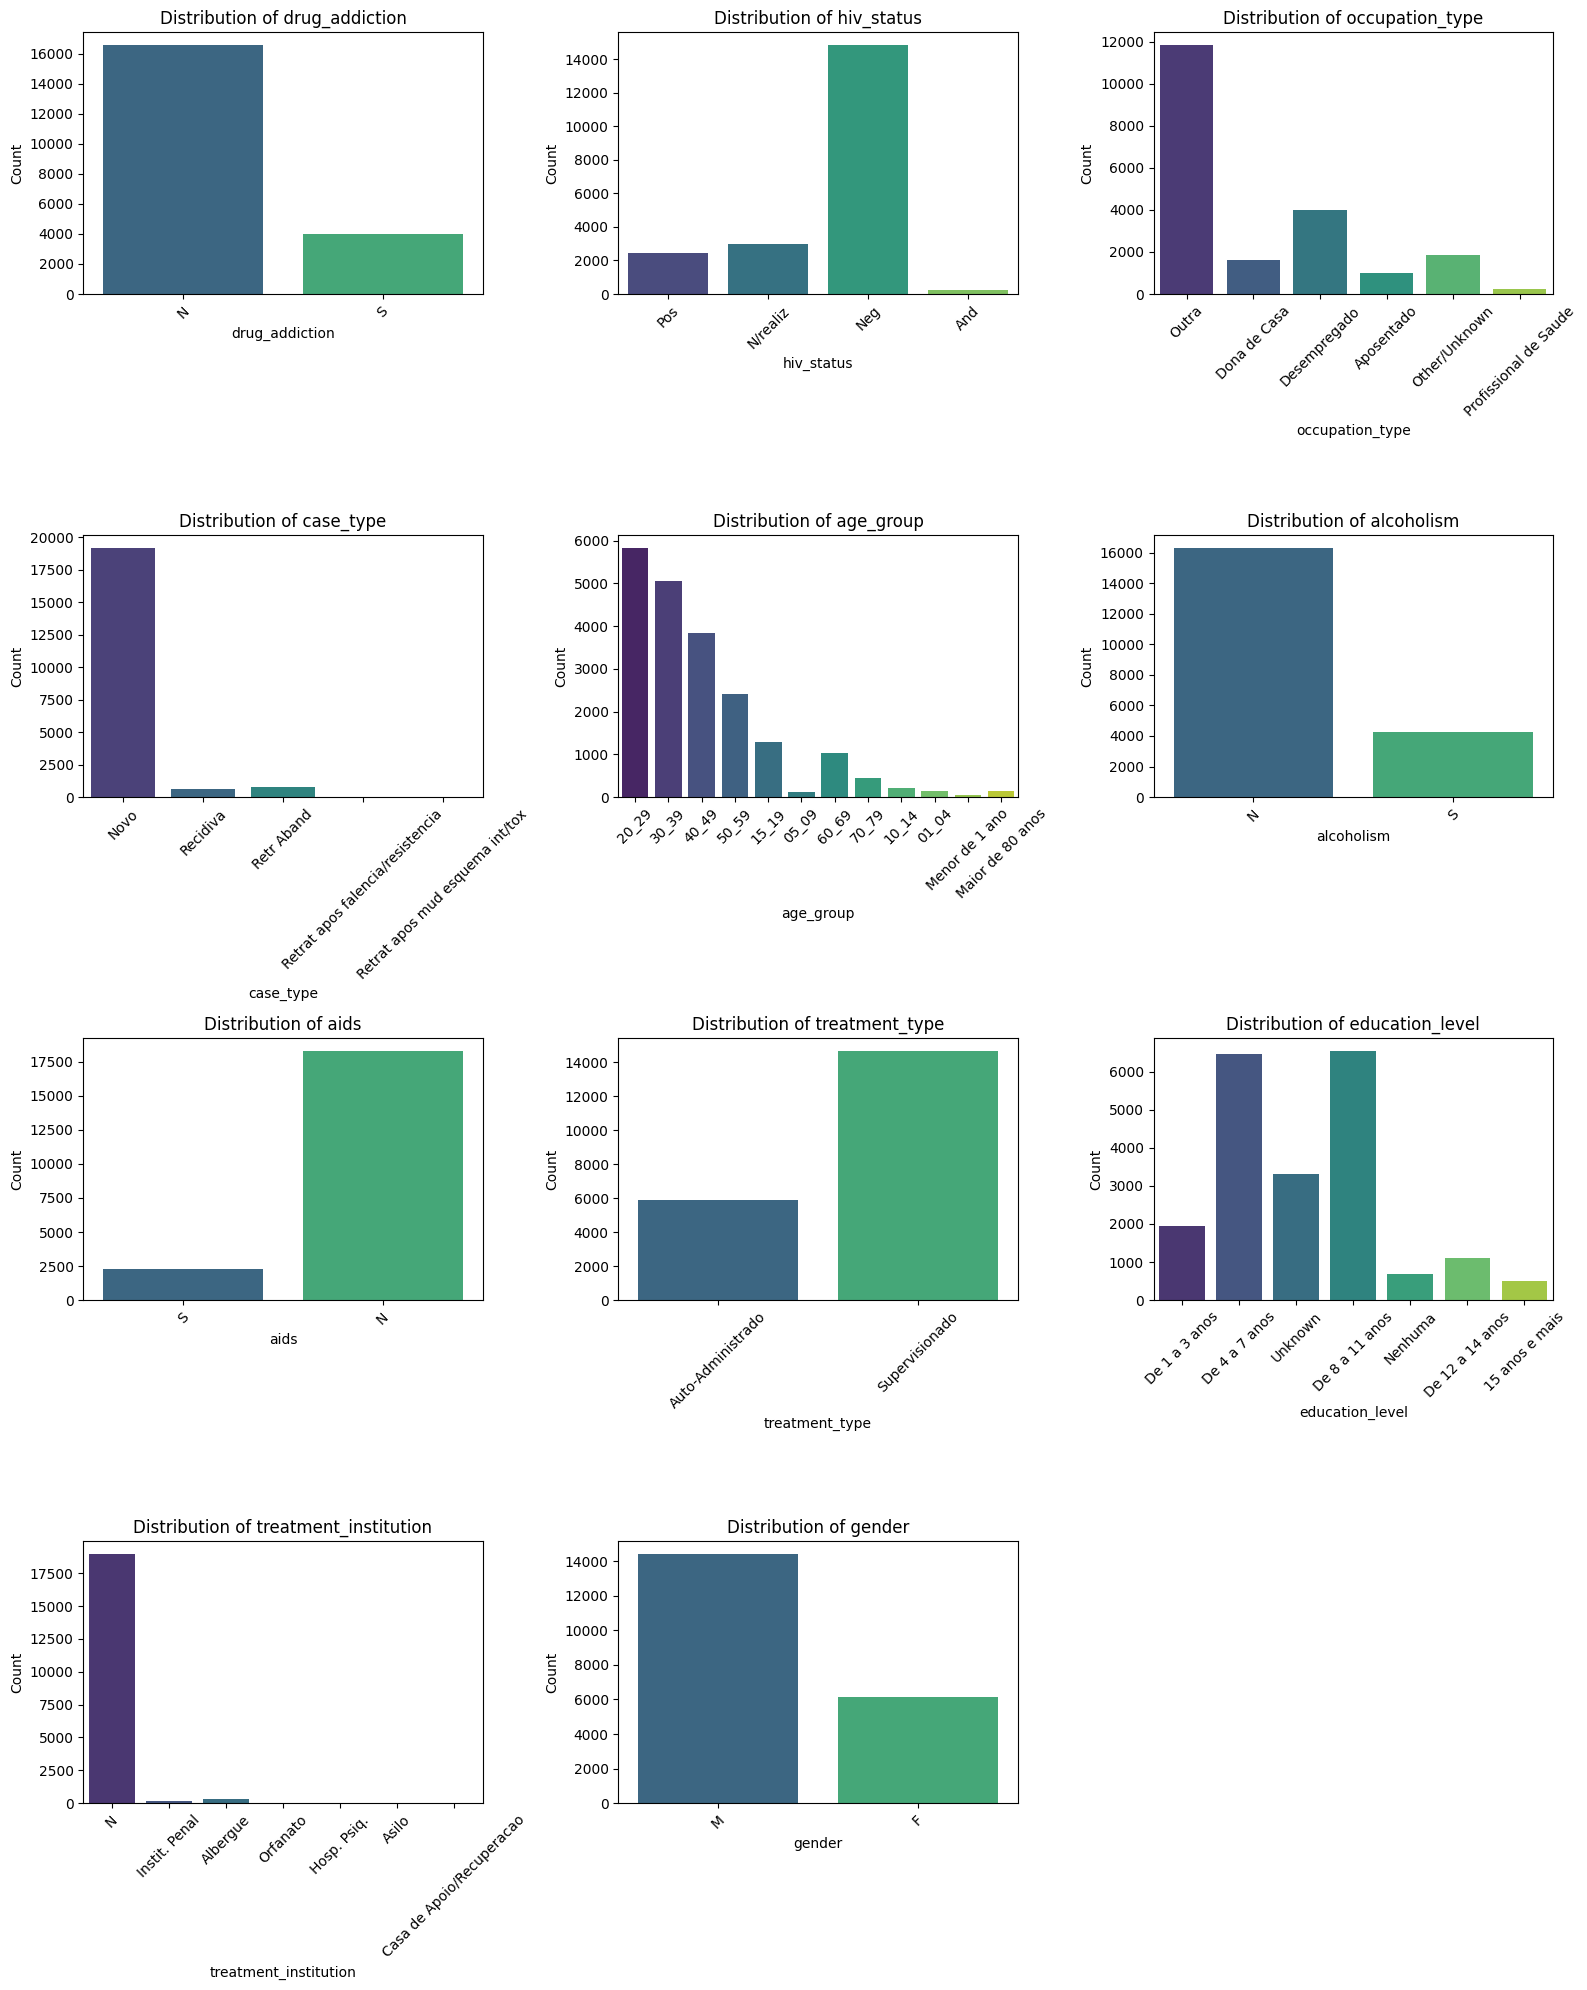

In [ ]:
# Plot the class distribution for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=undersampled_data, x=target_column, palette="viridis")
plt.title("Class Distribution of Target Variable After Undersampling")
plt.xlabel("Target Variable (current_status)")
plt.ylabel("Count")
plt.show()

# Plot the distribution for each key variable
key_variables = [
    'drug_addiction', 'hiv_status', 'occupation_type', 'case_type',
    'age_group', 'alcoholism', 'aids', 'treatment_type',
    'education_level', 'treatment_institution', 'gender'
]

# Generate subplots for each key variable
plt.figure(figsize=(16, 20))
for i, variable in enumerate(key_variables, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=undersampled_data, x=variable, palette="viridis")
    plt.title(f"Distribution of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


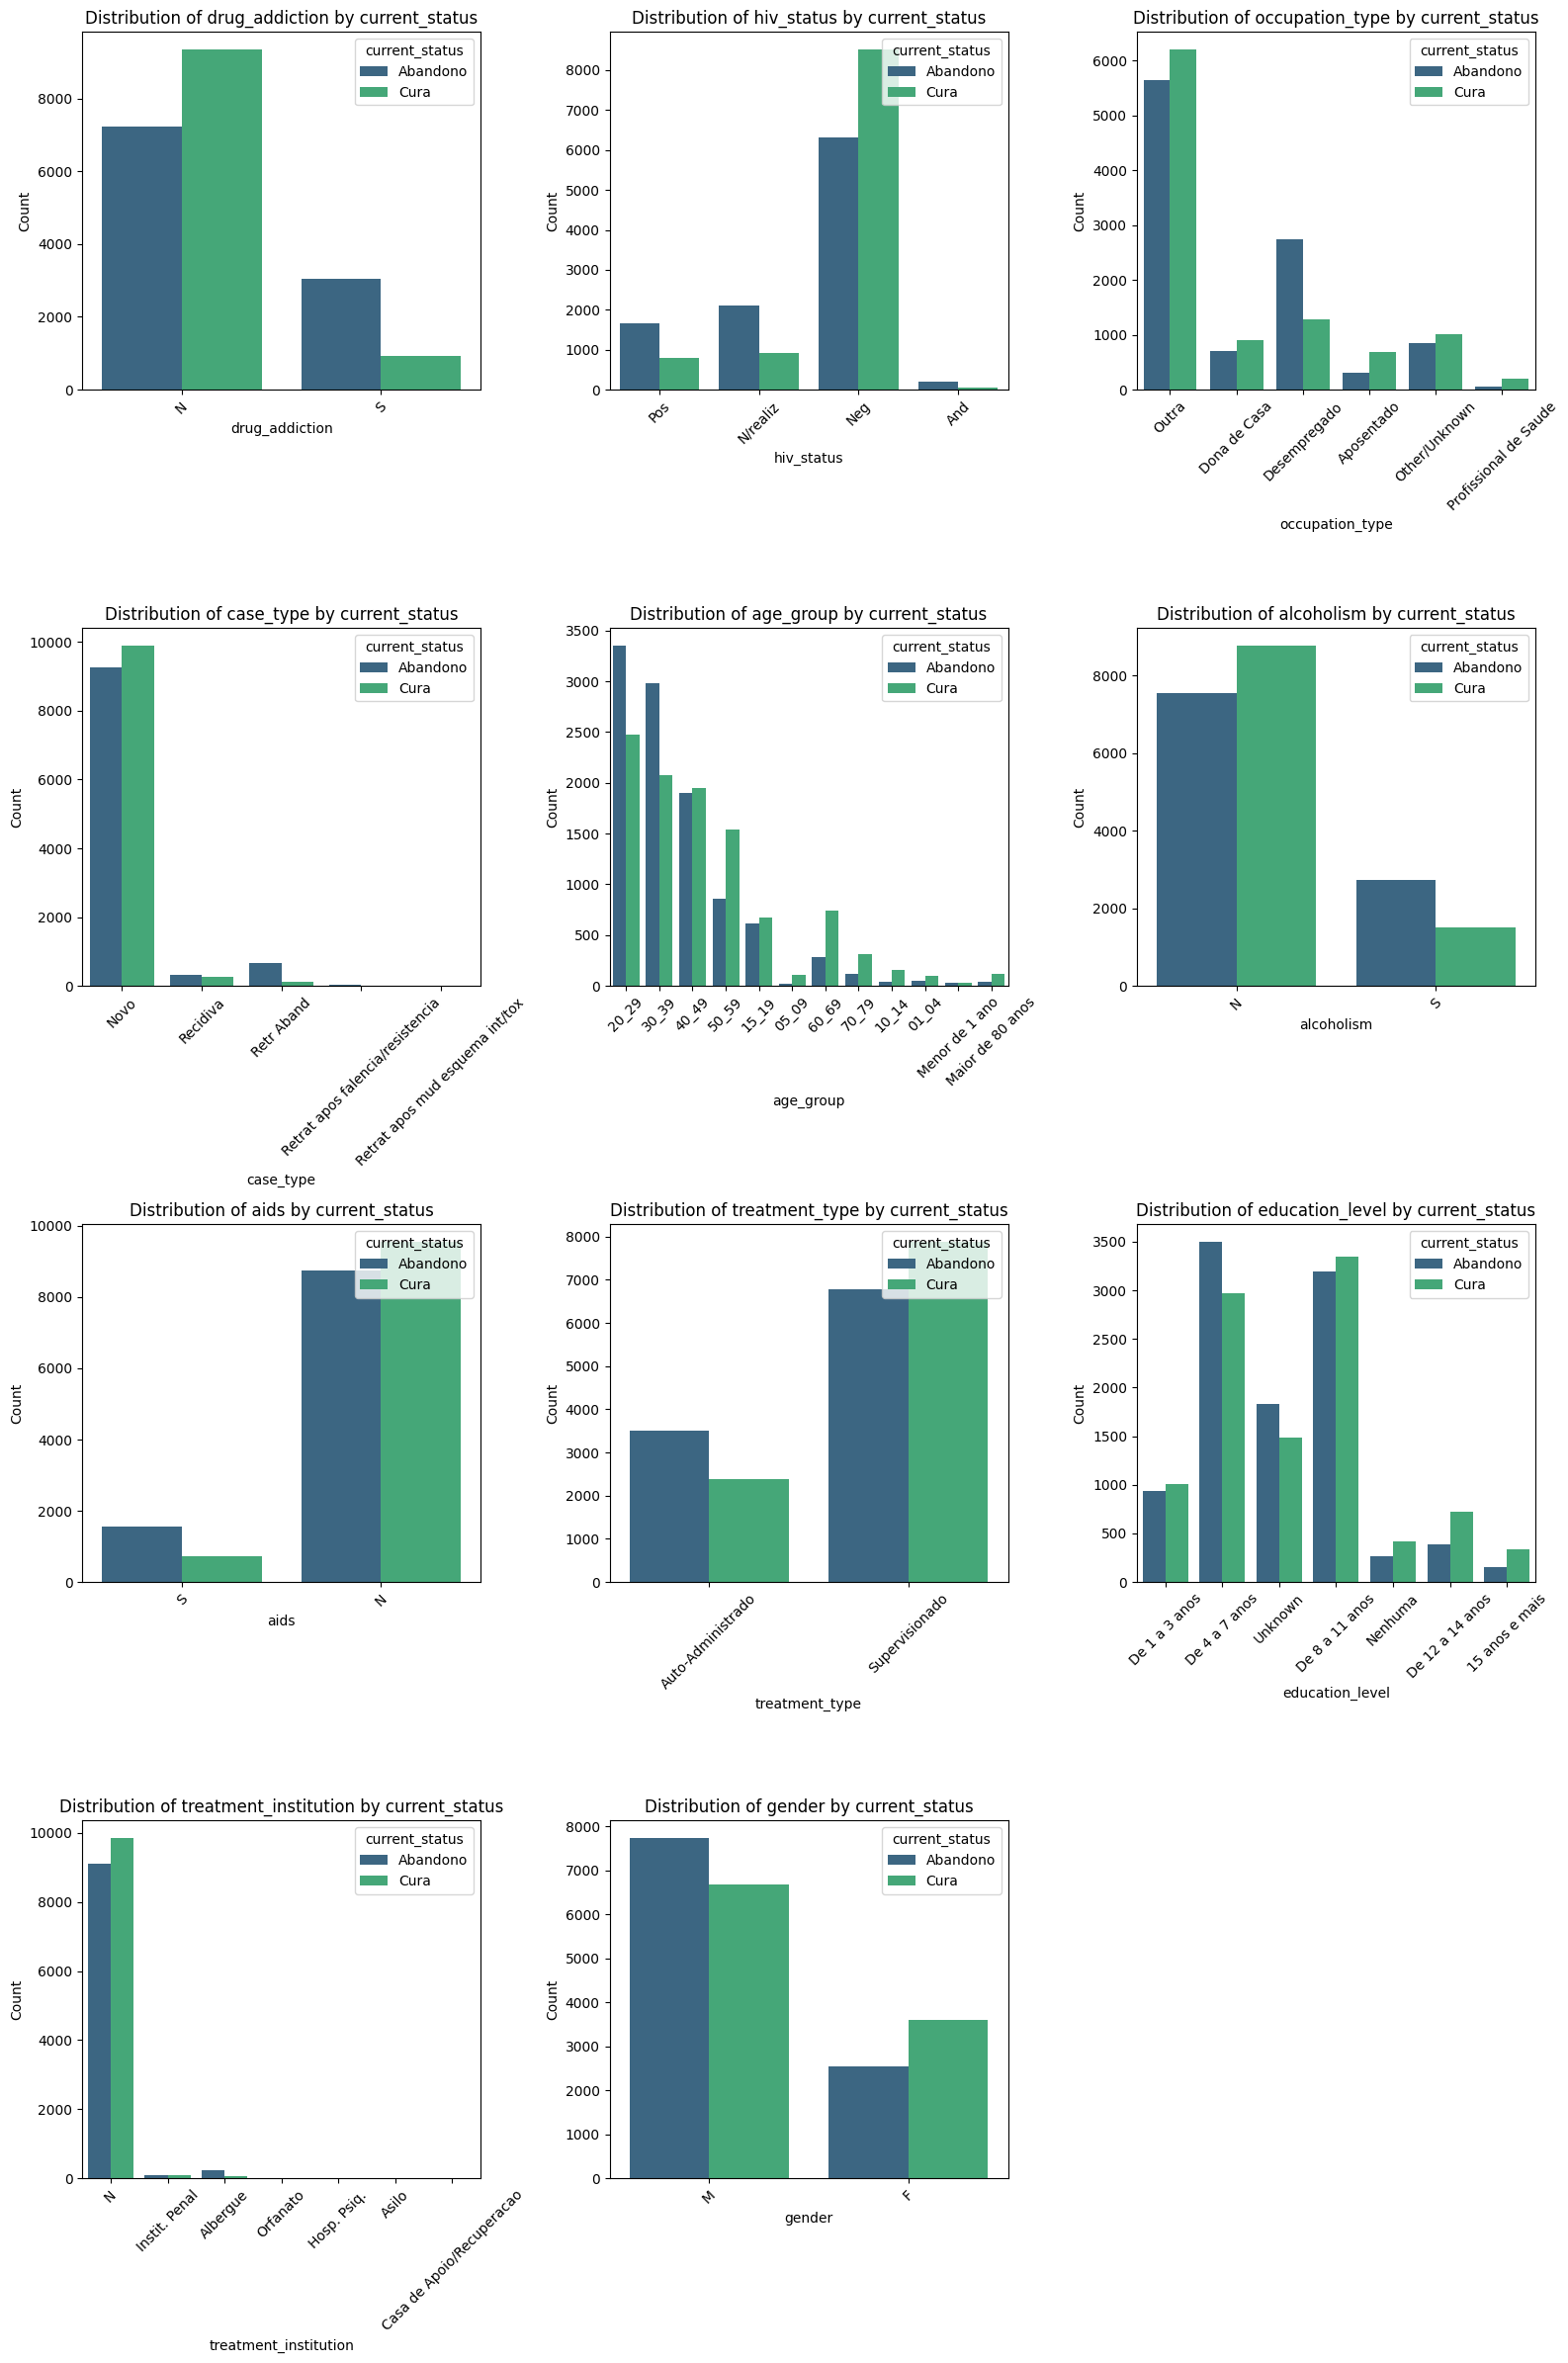

In [ ]:
plt.figure(figsize=(16, 24))

# Define the target and key variables
target_column = 'current_status'
key_variables = [
    'drug_addiction', 'hiv_status', 'occupation_type', 'case_type',
    'age_group', 'alcoholism', 'aids', 'treatment_type',
    'education_level', 'treatment_institution', 'gender'
]

# Loop through each key variable and plot its distribution by target outcome
for i, variable in enumerate(key_variables, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=undersampled_data, x=variable, hue=target_column, palette="viridis")
    plt.title(f"Distribution of {variable} by {target_column}")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title=target_column, loc="upper right")

plt.tight_layout()
plt.show()

In [ ]:
# Define the target variable
target_variable = 'current_status'

# Initialize a list to store the results
correlation_results = []

# Iterate through all categorical variables and compute the Chi-squared test against the target variable
for col in categorical_columns:
    if col != target_variable:
        chi2, p, _, _ = ss.chi2_contingency(pd.crosstab(undersampled_data[col], undersampled_data[target_variable]))
        correlation_results.append((col, chi2, p))

# Create a DataFrame from the results
correlation_df = pd.DataFrame(correlation_results, columns=['Variable', 'Chi2', 'p_value'])

# Sort the DataFrame by the Chi2 value to show the most related variables at the top
correlation_df.sort_values(by='Chi2', ascending=False, inplace=True)

# Display the results
print("Correlation between categorical variables and the target variable:")
print(correlation_df)

# Highlight variables with p-values ≤ 0.05 (indicating significant correlation)
significant_vars = correlation_df[correlation_df['p_value'] <= 0.05]
print("\nSignificantly correlated variables (p-value ≤ 0.05):")
print(significant_vars)

Correlation between categorical variables and the target variable:
                    Variable         Chi2        p_value
22            drug_addiction  1418.087836  2.465596e-310
17                hiv_status  1211.254545  2.650534e-262
1                  age_group   980.891787  2.482292e-203
5            occupation_type   849.986740  1.770898e-181
20                alcoholism   452.367728  2.202092e-100
6                  case_type   434.564422   9.430900e-93
18                      aids   339.733134   7.294396e-76
4            education_level   292.792704   2.863094e-60
27            treatment_type   291.093222   2.873126e-65
2                     gender   262.542696   4.789381e-59
12              culture_exam   213.170750   6.010171e-46
0                 race_color   192.118779   1.857696e-40
9           discovery_method   151.249157   7.237797e-31
7             clinical_form1   140.378481   1.767481e-23
8             classification   124.484550   8.345819e-27
10              bacil